In [1]:
import pyforest

Look at each model’s uncertainty for the exact same molecule in the test set


1. find all UQ metric values for test set compounds 
2. get all molecules that are used in the test set
3. make comparions across all models in the same test set (separate GP/RF)
4. maybe try comparing same models but different NEKs


The dfs were obtained from the notebook where I got all the compound names and compared their classification type (tn/fp/fn/fp)  

In [2]:
def get_tree_probabilities(model, x_data): 
    test_proba0_df = pd.DataFrame()
    test_proba1_df = pd.DataFrame()
    for tree_num in np.arange(len(model.estimators_)):
        test_proba_temp = model.estimators_[tree_num].predict_proba(x_data)
        test_proba0_df[tree_num] = test_proba_temp[:,0]
        test_proba1_df[tree_num] = test_proba_temp[:,1]
    std0 = test_proba0_df.std(axis=1)
    std1 = test_proba1_df.std(axis=1)
    return std0, std1

# RF model uncertainty: tree probability agreement

In [93]:
df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
model_types = ['GP', 'RF']
feat_types=['MOE','MFP']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
samplings = ['none_scaled','UNDER','SMOTE']
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
gp_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
cmpd_df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/'
col_order = ['NEK', 'feat_type', 'strategy','modeling_type', 'compound_id', 'active', 'prediction' , 'RF_type']


for nek in neks:
    for feat in feat_types: 
        for samp in samplings: 
            full_df = pd.read_csv(f'{df_path}{nek}_{feat}_{samp}.csv')
            test=full_df[full_df['subset']=='test'] 
            drop_cols=['NEK'	,'compound_id',	'base_rdkit_smiles',	'subset'	,'active']
            x_data=test.drop(columns=drop_cols).to_numpy()
     
            for rf in RF_types:
                with open(f'{rf_path}{nek}_{feat}_{samp}_{rf}_prod.pkl', 'rb') as f: 
                    model = pickle.load(f) 
                std0, std1=get_tree_probabilities(model, x_data)
                print(f'{nek} {feat} {samp} {rf}')
                model_name=rf
                df = pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model_name}_cmpd_class.csv')
                
                df['uq_0']=std0 # use if 
                df['uq_1']=std1
             
                df['UQ_metric_value'] = df.apply(lambda x:x['uq_0'] if x['prediction_type'] in ['TN','FN'] else x['uq_1'], axis=1)
                df['model_version']=f'{samp}_{rf}'
                display(df)
                df.to_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model_name}_cmpd_class.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE RF


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE RF_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE BRFC


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1',
       'UQ_metric_value', 'model_version'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE BRFC_BCW


<IPython.core.display.Javascript object>

Index(['NEK', 'feat_type', 'strategy', 'modeling_type', 'compound_id',
       'active', 'prediction', 'RF_type', 'prediction_type', 'uq_0', 'uq_1'],
      dtype='object')

In [6]:
def calc_pred_type(y_true, y_pred): 
    pred_type = 'err'
    if y_true == 0: 
        if y_pred == 1:
            pred_type='FP'
        else: 
            pred_type='TN'
    else: # if y_true==1
        if y_pred==0:
            pred_type='FN'
        else: 
            pred_type='TP'
    return pred_type

def len_lst(cmpd_lst):
    return len(cmpd_lst) 
    

# GP uncertainty: predictive variance

In [46]:
for nek in neks:
    for feat in feat_types: 
        for samp in samplings: 
            results_df = pd.read_csv(f'{gp_path}{nek}_{feat}_{samp}_matern_prod_test.csv')
            results_df=results_df.rename(columns={'y_pred': 'prediction'})
            results_df=results_df.rename(columns={'y': 'active'})
            results_df['prediction_type'] = results_df.apply(lambda x:calc_pred_type(x['active'] ,x['prediction']), axis=1)
      
            print(f'{nek} {feat} {samp} GP_matern')
            df = pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_GP_matern_cmpd_class.csv')
            
            df['prediction_type'] = df.apply(lambda x:calc_pred_type(x['active'] ,x['prediction']), axis=1)
            df['uq_0']=results_df['var_pred_class0']
            df['uq_1']=results_df['var_pred_class1']
         
         
            print(f'results df: {results_df.shape}, compound_df: {df.shape}')


            # df['UQ_metric_value'] = df.apply(lambda x:x['uq_0'] if x['prediction_type'] in ['TN','FN'] else x['uq_1'], axis=1)
            df['UQ_metric_value'] = df['uq_0']  # Default to uq_0
            df.loc[df['prediction_type'].isin(['TP', 'FP']), 'UQ_metric_value'] = df['uq_1']
            df['model_version']=f'{samp}_GP_matern'
            
            # df=df[col_order]
            display(df)
        
            df.to_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_GP_matern_cmpd_class.csv', index=False)


<IPython.core.display.Javascript object>

NEK2_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK2_binding       MOE  none_scaled     GP_matern    kdb_2562       0   
1    NEK2_binding       MOE  none_scaled     GP_matern    kdb_2854       0   
2    NEK2_binding       MOE  none_scaled     GP_matern    kdb_2631       0   
3    NEK2_binding       MOE  none_scaled     GP_matern    kdb_2754       0   
4    NEK2_binding       MOE  none_scaled     GP_matern    kdb_3508       0   
..            ...       ...          ...           ...         ...     ...   
278  NEK2_binding       MOE  none_scaled     GP_matern    kdb_2800       0   
279  NEK2_binding       MOE  none_scaled     GP_matern    kdb_2110       0   
280  NEK2_binding       MOE  none_scaled     GP_matern    kdb_2993       0   
281  NEK2_binding       MOE  none_scaled     GP_matern    kdb_2219       0   
282  NEK2_binding       MOE  none_scaled     GP_matern    kdb_2275       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003433  2.596477   
1             0  GP_matern              TN  0.003433  2.341104   
2             0  GP_matern              TN  0.003433  2.252286   
3             0  GP_matern              TN  0.003433  2.249938   
4             0  GP_matern              TN  0.003433  2.513501   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              TN  0.003433  2.391440   
279           0  GP_matern              TN  0.003433  2.397524   
280           0  GP_matern              TN  0.003433  2.226584   
281           0  GP_matern              TN  0.003433  2.089691   
282           0  GP_matern              TN  0.003433  2.341634   

     UQ_metric_value          model_version  
0           0.003433  none_scaled_GP_matern  
1           0.003433  none_scaled_GP_matern  
2           0.003433  none_scaled_GP_matern  
3           0.003433  none_scaled_GP_matern  
4           0.003433  none_scaled_GP_matern  
..               ...                    ...  
278         0.003433  none_scaled_GP_matern  
279         0.003433  none_scaled_GP_matern  
280         0.003433  none_scaled_GP_matern  
281         0.003433  none_scaled_GP_matern  
282         0.003433  none_scaled_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_binding       MOE    UNDER     GP_matern    kdb_2562       0   
1    NEK2_binding       MOE    UNDER     GP_matern    kdb_2854       0   
2    NEK2_binding       MOE    UNDER     GP_matern    kdb_2631       0   
3    NEK2_binding       MOE    UNDER     GP_matern    kdb_2754       0   
4    NEK2_binding       MOE    UNDER     GP_matern    kdb_3508       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK2_binding       MOE    UNDER     GP_matern    kdb_2800       0   
279  NEK2_binding       MOE    UNDER     GP_matern    kdb_2110       0   
280  NEK2_binding       MOE    UNDER     GP_matern    kdb_2993       0   
281  NEK2_binding       MOE    UNDER     GP_matern    kdb_2219       0   
282  NEK2_binding       MOE    UNDER     GP_matern    kdb_2275       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  8.098592  8.342371   
1             0  GP_matern              TN  6.686061  6.740863   
2             1  GP_matern              FP  6.726097  6.719210   
3             0  GP_matern              TN  6.815008  6.850909   
4             0  GP_matern              TN  7.596873  7.675554   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              TN  6.996218  7.053740   
279           1  GP_matern              FP  7.136707  7.162715   
280           1  GP_matern              FP  6.115880  6.048697   
281           1  GP_matern              FP  5.735392  5.653219   
282           0  GP_matern              TN  6.683991  6.702881   

     UQ_metric_value    model_version  
0           8.098592  UNDER_GP_matern  
1           6.686061  UNDER_GP_matern  
2           6.719210  UNDER_GP_matern  
3           6.815008  UNDER_GP_matern  
4           7.596873  UNDER_GP_matern  
..               ...              ...  
278         6.996218  UNDER_GP_matern  
279         7.162715  UNDER_GP_matern  
280         6.048697  UNDER_GP_matern  
281         5.653219  UNDER_GP_matern  
282         6.683991  UNDER_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_binding       MOE    SMOTE     GP_matern    kdb_2562       0   
1    NEK2_binding       MOE    SMOTE     GP_matern    kdb_2854       0   
2    NEK2_binding       MOE    SMOTE     GP_matern    kdb_2631       0   
3    NEK2_binding       MOE    SMOTE     GP_matern    kdb_2754       0   
4    NEK2_binding       MOE    SMOTE     GP_matern    kdb_3508       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK2_binding       MOE    SMOTE     GP_matern    kdb_2800       0   
279  NEK2_binding       MOE    SMOTE     GP_matern    kdb_2110       0   
280  NEK2_binding       MOE    SMOTE     GP_matern    kdb_2993       0   
281  NEK2_binding       MOE    SMOTE     GP_matern    kdb_2219       0   
282  NEK2_binding       MOE    SMOTE     GP_matern    kdb_2275       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  1.795832  2.652049   
1             0  GP_matern              TN  1.629721  2.083638   
2             0  GP_matern              TN  1.610684  1.971866   
3             0  GP_matern              TN  1.591305  1.967272   
4             0  GP_matern              TN  1.748560  2.398782   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              TN  1.680043  2.193633   
279           0  GP_matern              TN  1.683406  2.181737   
280           0  GP_matern              TN  1.535572  1.868784   
281           0  GP_matern              TN  1.451993  1.695938   
282           0  GP_matern              TN  1.637875  2.090634   

     UQ_metric_value    model_version  
0           1.795832  SMOTE_GP_matern  
1           1.629721  SMOTE_GP_matern  
2           1.610684  SMOTE_GP_matern  
3           1.591305  SMOTE_GP_matern  
4           1.748560  SMOTE_GP_matern  
..               ...              ...  
278         1.680043  SMOTE_GP_matern  
279         1.683406  SMOTE_GP_matern  
280         1.535572  SMOTE_GP_matern  
281         1.451993  SMOTE_GP_matern  
282         1.637875  SMOTE_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK2_binding       MFP  none_scaled     GP_matern     kdb_115       0   
1    NEK2_binding       MFP  none_scaled     GP_matern     kdb_120       0   
2    NEK2_binding       MFP  none_scaled     GP_matern    kdb_1219       0   
3    NEK2_binding       MFP  none_scaled     GP_matern     kdb_122       0   
4    NEK2_binding       MFP  none_scaled     GP_matern     kdb_130       0   
..            ...       ...          ...           ...         ...     ...   
278  NEK2_binding       MFP  none_scaled     GP_matern    kdb_2667       1   
279  NEK2_binding       MFP  none_scaled     GP_matern    kdb_2696       1   
280  NEK2_binding       MFP  none_scaled     GP_matern    kdb_2840       1   
281  NEK2_binding       MFP  none_scaled     GP_matern    kdb_2863       1   
282  NEK2_binding       MFP  none_scaled     GP_matern     kdb_980       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003498  2.316240   
1             0  GP_matern              TN  0.003490  2.294323   
2             0  GP_matern              TN  0.003460  2.199173   
3             0  GP_matern              TN  0.003463  2.170324   
4             0  GP_matern              TN  0.003505  2.320542   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              FN  0.003512  2.164462   
279           0  GP_matern              FN  0.003437  1.944264   
280           0  GP_matern              FN  0.003489  2.029201   
281           0  GP_matern              FN  0.003477  2.218320   
282           0  GP_matern              FN  0.003492  2.303974   

     UQ_metric_value          model_version  
0           0.003498  none_scaled_GP_matern  
1           0.003490  none_scaled_GP_matern  
2           0.003460  none_scaled_GP_matern  
3           0.003463  none_scaled_GP_matern  
4           0.003505  none_scaled_GP_matern  
..               ...                    ...  
278         0.003512  none_scaled_GP_matern  
279         0.003437  none_scaled_GP_matern  
280         0.003489  none_scaled_GP_matern  
281         0.003477  none_scaled_GP_matern  
282         0.003492  none_scaled_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_binding       MFP    UNDER     GP_matern     kdb_115       0   
1    NEK2_binding       MFP    UNDER     GP_matern     kdb_120       0   
2    NEK2_binding       MFP    UNDER     GP_matern    kdb_1219       0   
3    NEK2_binding       MFP    UNDER     GP_matern     kdb_122       0   
4    NEK2_binding       MFP    UNDER     GP_matern     kdb_130       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK2_binding       MFP    UNDER     GP_matern    kdb_2667       1   
279  NEK2_binding       MFP    UNDER     GP_matern    kdb_2696       1   
280  NEK2_binding       MFP    UNDER     GP_matern    kdb_2840       1   
281  NEK2_binding       MFP    UNDER     GP_matern    kdb_2863       1   
282  NEK2_binding       MFP    UNDER     GP_matern     kdb_980       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  6.094263  6.462686   
1             0  GP_matern              TN  5.963104  6.316804   
2             0  GP_matern              TN  5.603622  5.914193   
3             1  GP_matern              FP  5.429116  5.696453   
4             1  GP_matern              FP  6.126916  6.456748   
..          ...        ...             ...       ...       ...   
278           1  GP_matern              TP  5.282145  5.338951   
279           0  GP_matern              FN  5.033489  5.394893   
280           1  GP_matern              TP  5.259268  5.144605   
281           1  GP_matern              TP  5.445585  5.586480   
282           0  GP_matern              FN  5.955448  6.322650   

     UQ_metric_value    model_version  
0           6.094263  UNDER_GP_matern  
1           5.963104  UNDER_GP_matern  
2           5.603622  UNDER_GP_matern  
3           5.696453  UNDER_GP_matern  
4           6.456748  UNDER_GP_matern  
..               ...              ...  
278         5.338951  UNDER_GP_matern  
279         5.033489  UNDER_GP_matern  
280         5.144605  UNDER_GP_matern  
281         5.586480  UNDER_GP_matern  
282         5.955448  UNDER_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_binding       MFP    SMOTE     GP_matern     kdb_115       0   
1    NEK2_binding       MFP    SMOTE     GP_matern     kdb_120       0   
2    NEK2_binding       MFP    SMOTE     GP_matern    kdb_1219       0   
3    NEK2_binding       MFP    SMOTE     GP_matern     kdb_122       0   
4    NEK2_binding       MFP    SMOTE     GP_matern     kdb_130       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK2_binding       MFP    SMOTE     GP_matern    kdb_2667       1   
279  NEK2_binding       MFP    SMOTE     GP_matern    kdb_2696       1   
280  NEK2_binding       MFP    SMOTE     GP_matern    kdb_2840       1   
281  NEK2_binding       MFP    SMOTE     GP_matern    kdb_2863       1   
282  NEK2_binding       MFP    SMOTE     GP_matern     kdb_980       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.998863  2.566148   
1             0  GP_matern              TN  0.990385  2.543385   
2             0  GP_matern              TN  0.942902  2.384656   
3             0  GP_matern              TN  0.914161  2.293955   
4             0  GP_matern              TN  0.998948  2.563244   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              FN  0.910543  2.268522   
279           0  GP_matern              FN  0.875412  2.048600   
280           0  GP_matern              FN  0.934119  2.280196   
281           0  GP_matern              FN  0.940454  2.373727   
282           0  GP_matern              FN  0.991893  2.547221   

     UQ_metric_value    model_version  
0           0.998863  SMOTE_GP_matern  
1           0.990385  SMOTE_GP_matern  
2           0.942902  SMOTE_GP_matern  
3           0.914161  SMOTE_GP_matern  
4           0.998948  SMOTE_GP_matern  
..               ...              ...  
278         0.910543  SMOTE_GP_matern  
279         0.875412  SMOTE_GP_matern  
280         0.934119  SMOTE_GP_matern  
281         0.940454  SMOTE_GP_matern  
282         0.991893  SMOTE_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_inhibition MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (407, 30), compound_df: (407, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK2_inhibition       MOE  none_scaled     GP_matern     kdb_819       1   
1    NEK2_inhibition       MOE  none_scaled     GP_matern     kdb_952       0   
2    NEK2_inhibition       MOE  none_scaled     GP_matern     kdb_682       0   
3    NEK2_inhibition       MOE  none_scaled     GP_matern    kdb_1216       0   
4    NEK2_inhibition       MOE  none_scaled     GP_matern     kdb_481       0   
..               ...       ...          ...           ...         ...     ...   
402  NEK2_inhibition       MOE  none_scaled     GP_matern    kdb_1458       0   
403  NEK2_inhibition       MOE  none_scaled     GP_matern    kdb_3179       0   
404  NEK2_inhibition       MOE  none_scaled     GP_matern     kdb_794       0   
405  NEK2_inhibition       MOE  none_scaled     GP_matern     kdb_687       0   
406  NEK2_inhibition       MOE  none_scaled     GP_matern     kdb_875       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              FN  0.004059  2.429407   
1             0  GP_matern              TN  0.004144  2.512741   
2             0  GP_matern              TN  0.004101  2.160717   
3             0  GP_matern              TN  0.004065  2.346272   
4             0  GP_matern              TN  0.003908  1.951185   
..          ...        ...             ...       ...       ...   
402           0  GP_matern              TN  0.004101  2.517400   
403           0  GP_matern              TN  0.004175  2.464147   
404           0  GP_matern              TN  0.004216  2.722339   
405           0  GP_matern              TN  0.003975  2.195020   
406           0  GP_matern              TN  0.004001  2.318372   

     UQ_metric_value          model_version  
0           0.004059  none_scaled_GP_matern  
1           0.004144  none_scaled_GP_matern  
2           0.004101  none_scaled_GP_matern  
3           0.004065  none_scaled_GP_matern  
4           0.003908  none_scaled_GP_matern  
..               ...                    ...  
402         0.004101  none_scaled_GP_matern  
403         0.004175  none_scaled_GP_matern  
404         0.004216  none_scaled_GP_matern  
405         0.003975  none_scaled_GP_matern  
406         0.004001  none_scaled_GP_matern  

[407 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_inhibition MOE UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (407, 30), compound_df: (407, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_inhibition       MOE    UNDER     GP_matern     kdb_819       1   
1    NEK2_inhibition       MOE    UNDER     GP_matern     kdb_952       0   
2    NEK2_inhibition       MOE    UNDER     GP_matern     kdb_682       0   
3    NEK2_inhibition       MOE    UNDER     GP_matern    kdb_1216       0   
4    NEK2_inhibition       MOE    UNDER     GP_matern     kdb_481       0   
..               ...       ...      ...           ...         ...     ...   
402  NEK2_inhibition       MOE    UNDER     GP_matern    kdb_1458       0   
403  NEK2_inhibition       MOE    UNDER     GP_matern    kdb_3179       0   
404  NEK2_inhibition       MOE    UNDER     GP_matern     kdb_794       0   
405  NEK2_inhibition       MOE    UNDER     GP_matern     kdb_687       0   
406  NEK2_inhibition       MOE    UNDER     GP_matern     kdb_875       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              FN  4.410968  4.511440   
1             0  GP_matern              TN  4.725529  4.900086   
2             0  GP_matern              TN  3.825890  4.200973   
3             0  GP_matern              TN  4.096090  4.259102   
4             0  GP_matern              TN  3.410392  3.618027   
..          ...        ...             ...       ...       ...   
402           1  GP_matern              FP  4.403315  4.427013   
403           1  GP_matern              FP  4.660038  4.734085   
404           1  GP_matern              FP  5.198132  5.297528   
405           0  GP_matern              TN  3.925496  4.103100   
406           0  GP_matern              TN  4.209724  4.275072   

     UQ_metric_value    model_version  
0           4.410968  UNDER_GP_matern  
1           4.725529  UNDER_GP_matern  
2           3.825890  UNDER_GP_matern  
3           4.096090  UNDER_GP_matern  
4           3.410392  UNDER_GP_matern  
..               ...              ...  
402         4.427013  UNDER_GP_matern  
403         4.734085  UNDER_GP_matern  
404         5.297528  UNDER_GP_matern  
405         3.925496  UNDER_GP_matern  
406         4.209724  UNDER_GP_matern  

[407 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_inhibition MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (407, 30), compound_df: (407, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_inhibition       MOE    SMOTE     GP_matern     kdb_819       1   
1    NEK2_inhibition       MOE    SMOTE     GP_matern     kdb_952       0   
2    NEK2_inhibition       MOE    SMOTE     GP_matern     kdb_682       0   
3    NEK2_inhibition       MOE    SMOTE     GP_matern    kdb_1216       0   
4    NEK2_inhibition       MOE    SMOTE     GP_matern     kdb_481       0   
..               ...       ...      ...           ...         ...     ...   
402  NEK2_inhibition       MOE    SMOTE     GP_matern    kdb_1458       0   
403  NEK2_inhibition       MOE    SMOTE     GP_matern    kdb_3179       0   
404  NEK2_inhibition       MOE    SMOTE     GP_matern     kdb_794       0   
405  NEK2_inhibition       MOE    SMOTE     GP_matern     kdb_687       0   
406  NEK2_inhibition       MOE    SMOTE     GP_matern     kdb_875       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              FN  1.534293  1.786766   
1             0  GP_matern              TN  1.594376  1.874760   
2             0  GP_matern              TN  1.404840  1.598724   
3             0  GP_matern              TN  1.493183  1.720244   
4             0  GP_matern              TN  1.271107  1.421372   
..          ...        ...             ...       ...       ...   
402           0  GP_matern              TN  1.552089  1.835367   
403           0  GP_matern              TN  1.616884  1.888737   
404           0  GP_matern              TN  1.702613  2.100446   
405           0  GP_matern              TN  1.397576  1.611721   
406           0  GP_matern              TN  1.474151  1.680212   

     UQ_metric_value    model_version  
0           1.534293  SMOTE_GP_matern  
1           1.594376  SMOTE_GP_matern  
2           1.404840  SMOTE_GP_matern  
3           1.493183  SMOTE_GP_matern  
4           1.271107  SMOTE_GP_matern  
..               ...              ...  
402         1.552089  SMOTE_GP_matern  
403         1.616884  SMOTE_GP_matern  
404         1.702613  SMOTE_GP_matern  
405         1.397576  SMOTE_GP_matern  
406         1.474151  SMOTE_GP_matern  

[407 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_inhibition MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (407, 30), compound_df: (407, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK2_inhibition       MFP  none_scaled     GP_matern    kdb_1025       0   
1    NEK2_inhibition       MFP  none_scaled     GP_matern    kdb_1033       0   
2    NEK2_inhibition       MFP  none_scaled     GP_matern    kdb_1035       0   
3    NEK2_inhibition       MFP  none_scaled     GP_matern    kdb_1038       0   
4    NEK2_inhibition       MFP  none_scaled     GP_matern    kdb_1051       0   
..               ...       ...          ...           ...         ...     ...   
402  NEK2_inhibition       MFP  none_scaled     GP_matern     kdb_749       1   
403  NEK2_inhibition       MFP  none_scaled     GP_matern     kdb_819       1   
404  NEK2_inhibition       MFP  none_scaled     GP_matern     kdb_840       1   
405  NEK2_inhibition       MFP  none_scaled     GP_matern     kdb_872       1   
406  NEK2_inhibition       MFP  none_scaled     GP_matern     kdb_966       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.004361  1.985866   
1             0  GP_matern              TN  0.004366  2.107877   
2             0  GP_matern              TN  0.004394  2.163966   
3             0  GP_matern              TN  0.004408  2.193615   
4             0  GP_matern              TN  0.004359  1.933553   
..          ...        ...             ...       ...       ...   
402           0  GP_matern              FN  0.004426  2.188388   
403           0  GP_matern              FN  0.004391  2.206037   
404           0  GP_matern              FN  0.004467  1.940348   
405           0  GP_matern              FN  0.004457  2.247238   
406           0  GP_matern              FN  0.004510  2.051222   

     UQ_metric_value          model_version  
0           0.004361  none_scaled_GP_matern  
1           0.004366  none_scaled_GP_matern  
2           0.004394  none_scaled_GP_matern  
3           0.004408  none_scaled_GP_matern  
4           0.004359  none_scaled_GP_matern  
..               ...                    ...  
402         0.004426  none_scaled_GP_matern  
403         0.004391  none_scaled_GP_matern  
404         0.004467  none_scaled_GP_matern  
405         0.004457  none_scaled_GP_matern  
406         0.004510  none_scaled_GP_matern  

[407 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_inhibition MFP UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (407, 30), compound_df: (407, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_inhibition       MFP    UNDER     GP_matern    kdb_1025       0   
1    NEK2_inhibition       MFP    UNDER     GP_matern    kdb_1033       0   
2    NEK2_inhibition       MFP    UNDER     GP_matern    kdb_1035       0   
3    NEK2_inhibition       MFP    UNDER     GP_matern    kdb_1038       0   
4    NEK2_inhibition       MFP    UNDER     GP_matern    kdb_1051       0   
..               ...       ...      ...           ...         ...     ...   
402  NEK2_inhibition       MFP    UNDER     GP_matern     kdb_749       1   
403  NEK2_inhibition       MFP    UNDER     GP_matern     kdb_819       1   
404  NEK2_inhibition       MFP    UNDER     GP_matern     kdb_840       1   
405  NEK2_inhibition       MFP    UNDER     GP_matern     kdb_872       1   
406  NEK2_inhibition       MFP    UNDER     GP_matern     kdb_966       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  3.084826  3.588410   
1             0  GP_matern              TN  3.433812  3.745190   
2             0  GP_matern              TN  3.624437  3.987964   
3             0  GP_matern              TN  3.612981  3.959608   
4             1  GP_matern              FP  3.085664  3.255605   
..          ...        ...             ...       ...       ...   
402           0  GP_matern              FN  3.604157  3.967827   
403           0  GP_matern              FN  3.623966  3.991525   
404           1  GP_matern              TP  2.660530  2.544712   
405           1  GP_matern              TP  3.643520  3.922008   
406           1  GP_matern              TP  3.050972  2.689259   

     UQ_metric_value    model_version  
0           3.084826  UNDER_GP_matern  
1           3.433812  UNDER_GP_matern  
2           3.624437  UNDER_GP_matern  
3           3.612981  UNDER_GP_matern  
4           3.255605  UNDER_GP_matern  
..               ...              ...  
402         3.604157  UNDER_GP_matern  
403         3.623966  UNDER_GP_matern  
404         2.544712  UNDER_GP_matern  
405         3.922008  UNDER_GP_matern  
406         2.689259  UNDER_GP_matern  

[407 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK2_inhibition MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (407, 30), compound_df: (407, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK2_inhibition       MFP    SMOTE     GP_matern    kdb_1025       0   
1    NEK2_inhibition       MFP    SMOTE     GP_matern    kdb_1033       0   
2    NEK2_inhibition       MFP    SMOTE     GP_matern    kdb_1035       0   
3    NEK2_inhibition       MFP    SMOTE     GP_matern    kdb_1038       0   
4    NEK2_inhibition       MFP    SMOTE     GP_matern    kdb_1051       0   
..               ...       ...      ...           ...         ...     ...   
402  NEK2_inhibition       MFP    SMOTE     GP_matern     kdb_749       1   
403  NEK2_inhibition       MFP    SMOTE     GP_matern     kdb_819       1   
404  NEK2_inhibition       MFP    SMOTE     GP_matern     kdb_840       1   
405  NEK2_inhibition       MFP    SMOTE     GP_matern     kdb_872       1   
406  NEK2_inhibition       MFP    SMOTE     GP_matern     kdb_966       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  1.045572  2.002376   
1             0  GP_matern              TN  0.996143  1.945407   
2             0  GP_matern              TN  1.068963  2.104389   
3             0  GP_matern              TN  1.073801  2.125965   
4             0  GP_matern              TN  0.912788  1.766631   
..          ...        ...             ...       ...       ...   
402           0  GP_matern              FN  1.078379  2.121684   
403           0  GP_matern              FN  1.084540  2.138090   
404           1  GP_matern              TP  0.873428  1.680517   
405           0  GP_matern              FN  1.088797  2.136725   
406           1  GP_matern              TP  1.011478  1.918095   

     UQ_metric_value    model_version  
0           1.045572  SMOTE_GP_matern  
1           0.996143  SMOTE_GP_matern  
2           1.068963  SMOTE_GP_matern  
3           1.073801  SMOTE_GP_matern  
4           0.912788  SMOTE_GP_matern  
..               ...              ...  
402         1.078379  SMOTE_GP_matern  
403         1.084540  SMOTE_GP_matern  
404         1.680517  SMOTE_GP_matern  
405         1.088797  SMOTE_GP_matern  
406         1.918095  SMOTE_GP_matern  

[407 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK3_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (282, 30), compound_df: (282, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK3_binding       MOE  none_scaled     GP_matern    kdb_2690       0   
1    NEK3_binding       MOE  none_scaled     GP_matern      kdb_98       0   
2    NEK3_binding       MOE  none_scaled     GP_matern    kdb_2082       0   
3    NEK3_binding       MOE  none_scaled     GP_matern    kdb_2350       0   
4    NEK3_binding       MOE  none_scaled     GP_matern    kdb_2655       0   
..            ...       ...          ...           ...         ...     ...   
277  NEK3_binding       MOE  none_scaled     GP_matern      kdb_75       0   
278  NEK3_binding       MOE  none_scaled     GP_matern     kdb_132       0   
279  NEK3_binding       MOE  none_scaled     GP_matern    kdb_3049       0   
280  NEK3_binding       MOE  none_scaled     GP_matern    kdb_2518       0   
281  NEK3_binding       MOE  none_scaled     GP_matern     kdb_212       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003345  2.999337   
1             0  GP_matern              TN  0.003345  3.119935   
2             0  GP_matern              TN  0.003345  2.817740   
3             0  GP_matern              TN  0.003345  3.132774   
4             0  GP_matern              TN  0.003345  3.146052   
..          ...        ...             ...       ...       ...   
277           0  GP_matern              TN  0.003345  3.190020   
278           0  GP_matern              TN  0.003345  3.317659   
279           0  GP_matern              TN  0.003345  2.959642   
280           0  GP_matern              TN  0.003345  3.193593   
281           0  GP_matern              TN  0.003345  3.242856   

     UQ_metric_value          model_version  
0           0.003345  none_scaled_GP_matern  
1           0.003345  none_scaled_GP_matern  
2           0.003345  none_scaled_GP_matern  
3           0.003345  none_scaled_GP_matern  
4           0.003345  none_scaled_GP_matern  
..               ...                    ...  
277         0.003345  none_scaled_GP_matern  
278         0.003345  none_scaled_GP_matern  
279         0.003345  none_scaled_GP_matern  
280         0.003345  none_scaled_GP_matern  
281         0.003345  none_scaled_GP_matern  

[282 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK3_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (282, 30), compound_df: (282, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK3_binding       MOE    UNDER     GP_matern    kdb_2690       0   
1    NEK3_binding       MOE    UNDER     GP_matern      kdb_98       0   
2    NEK3_binding       MOE    UNDER     GP_matern    kdb_2082       0   
3    NEK3_binding       MOE    UNDER     GP_matern    kdb_2350       0   
4    NEK3_binding       MOE    UNDER     GP_matern    kdb_2655       0   
..            ...       ...      ...           ...         ...     ...   
277  NEK3_binding       MOE    UNDER     GP_matern      kdb_75       0   
278  NEK3_binding       MOE    UNDER     GP_matern     kdb_132       0   
279  NEK3_binding       MOE    UNDER     GP_matern    kdb_3049       0   
280  NEK3_binding       MOE    UNDER     GP_matern    kdb_2518       0   
281  NEK3_binding       MOE    UNDER     GP_matern     kdb_212       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  7.542893  7.507177   
1             1  GP_matern              FP  7.594655  7.571588   
2             1  GP_matern              FP  7.514028  7.448411   
3             0  GP_matern              TN  7.566665  7.578420   
4             1  GP_matern              FP  7.578360  7.552239   
..          ...        ...             ...       ...       ...   
277           0  GP_matern              TN  7.650352  7.644154   
278           0  GP_matern              TN  7.743826  7.737542   
279           1  GP_matern              FP  7.713882  7.693845   
280           1  GP_matern              FP  7.706217  7.695073   
281           0  GP_matern              TN  7.691969  7.692426   

     UQ_metric_value    model_version  
0           7.542893  UNDER_GP_matern  
1           7.571588  UNDER_GP_matern  
2           7.448411  UNDER_GP_matern  
3           7.566665  UNDER_GP_matern  
4           7.552239  UNDER_GP_matern  
..               ...              ...  
277         7.650352  UNDER_GP_matern  
278         7.743826  UNDER_GP_matern  
279         7.693845  UNDER_GP_matern  
280         7.695073  UNDER_GP_matern  
281         7.691969  UNDER_GP_matern  

[282 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK3_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (282, 30), compound_df: (282, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK3_binding       MOE    SMOTE     GP_matern    kdb_2690       0   
1    NEK3_binding       MOE    SMOTE     GP_matern      kdb_98       0   
2    NEK3_binding       MOE    SMOTE     GP_matern    kdb_2082       0   
3    NEK3_binding       MOE    SMOTE     GP_matern    kdb_2350       0   
4    NEK3_binding       MOE    SMOTE     GP_matern    kdb_2655       0   
..            ...       ...      ...           ...         ...     ...   
277  NEK3_binding       MOE    SMOTE     GP_matern      kdb_75       0   
278  NEK3_binding       MOE    SMOTE     GP_matern     kdb_132       0   
279  NEK3_binding       MOE    SMOTE     GP_matern    kdb_3049       0   
280  NEK3_binding       MOE    SMOTE     GP_matern    kdb_2518       0   
281  NEK3_binding       MOE    SMOTE     GP_matern     kdb_212       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  2.179686  2.291452   
1             0  GP_matern              TN  2.329528  2.489866   
2             0  GP_matern              TN  2.008295  2.014333   
3             0  GP_matern              TN  2.345106  2.511436   
4             0  GP_matern              TN  2.346293  2.528483   
..          ...        ...             ...       ...       ...   
277           0  GP_matern              TN  2.426037  2.643534   
278           0  GP_matern              TN  2.563707  2.883643   
279           0  GP_matern              TN  2.259918  2.350986   
280           0  GP_matern              TN  2.450169  2.660513   
281           0  GP_matern              TN  2.465881  2.734080   

     UQ_metric_value    model_version  
0           2.179686  SMOTE_GP_matern  
1           2.329528  SMOTE_GP_matern  
2           2.008295  SMOTE_GP_matern  
3           2.345106  SMOTE_GP_matern  
4           2.346293  SMOTE_GP_matern  
..               ...              ...  
277         2.426037  SMOTE_GP_matern  
278         2.563707  SMOTE_GP_matern  
279         2.259918  SMOTE_GP_matern  
280         2.450169  SMOTE_GP_matern  
281         2.465881  SMOTE_GP_matern  

[282 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK3_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (282, 30), compound_df: (282, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK3_binding       MFP  none_scaled     GP_matern     kdb_116       0   
1    NEK3_binding       MFP  none_scaled     GP_matern    kdb_1219       0   
2    NEK3_binding       MFP  none_scaled     GP_matern     kdb_123       0   
3    NEK3_binding       MFP  none_scaled     GP_matern    kdb_1230       0   
4    NEK3_binding       MFP  none_scaled     GP_matern     kdb_132       0   
..            ...       ...          ...           ...         ...     ...   
277  NEK3_binding       MFP  none_scaled     GP_matern    kdb_2632       1   
278  NEK3_binding       MFP  none_scaled     GP_matern    kdb_2996       1   
279  NEK3_binding       MFP  none_scaled     GP_matern    kdb_3010       1   
280  NEK3_binding       MFP  none_scaled     GP_matern    kdb_3023       1   
281  NEK3_binding       MFP  none_scaled     GP_matern    kdb_3053       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003440  3.199608   
1             0  GP_matern              TN  0.003408  3.073108   
2             0  GP_matern              TN  0.003427  3.169840   
3             0  GP_matern              TN  0.003421  3.071718   
4             0  GP_matern              TN  0.003404  3.066147   
..          ...        ...             ...       ...       ...   
277           0  GP_matern              FN  0.003443  3.126929   
278           0  GP_matern              FN  0.003428  2.916431   
279           0  GP_matern              FN  0.003428  3.164435   
280           0  GP_matern              FN  0.003370  2.708500   
281           0  GP_matern              FN  0.003424  2.904202   

     UQ_metric_value          model_version  
0           0.003440  none_scaled_GP_matern  
1           0.003408  none_scaled_GP_matern  
2           0.003427  none_scaled_GP_matern  
3           0.003421  none_scaled_GP_matern  
4           0.003404  none_scaled_GP_matern  
..               ...                    ...  
277         0.003443  none_scaled_GP_matern  
278         0.003428  none_scaled_GP_matern  
279         0.003428  none_scaled_GP_matern  
280         0.003370  none_scaled_GP_matern  
281         0.003424  none_scaled_GP_matern  

[282 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK3_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (282, 30), compound_df: (282, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK3_binding       MFP    UNDER     GP_matern     kdb_116       0   
1    NEK3_binding       MFP    UNDER     GP_matern    kdb_1219       0   
2    NEK3_binding       MFP    UNDER     GP_matern     kdb_123       0   
3    NEK3_binding       MFP    UNDER     GP_matern    kdb_1230       0   
4    NEK3_binding       MFP    UNDER     GP_matern     kdb_132       0   
..            ...       ...      ...           ...         ...     ...   
277  NEK3_binding       MFP    UNDER     GP_matern    kdb_2632       1   
278  NEK3_binding       MFP    UNDER     GP_matern    kdb_2996       1   
279  NEK3_binding       MFP    UNDER     GP_matern    kdb_3010       1   
280  NEK3_binding       MFP    UNDER     GP_matern    kdb_3023       1   
281  NEK3_binding       MFP    UNDER     GP_matern    kdb_3053       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             1  GP_matern              FP  7.097601  7.155093   
1             0  GP_matern              TN  6.819770  6.891099   
2             0  GP_matern              TN  7.022383  7.088561   
3             0  GP_matern              TN  6.982108  7.058165   
4             0  GP_matern              TN  6.765204  6.830951   
..          ...        ...             ...       ...       ...   
277           1  GP_matern              TP  6.859591  6.836513   
278           1  GP_matern              TP  6.240504  6.099698   
279           0  GP_matern              FN  7.021206  7.082560   
280           1  GP_matern              TP  6.246203  6.245897   
281           0  GP_matern              FN  5.986571  6.121860   

     UQ_metric_value    model_version  
0           7.155093  UNDER_GP_matern  
1           6.819770  UNDER_GP_matern  
2           7.022383  UNDER_GP_matern  
3           6.982108  UNDER_GP_matern  
4           6.765204  UNDER_GP_matern  
..               ...              ...  
277         6.836513  UNDER_GP_matern  
278         6.099698  UNDER_GP_matern  
279         7.021206  UNDER_GP_matern  
280         6.245897  UNDER_GP_matern  
281         5.986571  UNDER_GP_matern  

[282 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK3_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (282, 30), compound_df: (282, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK3_binding       MFP    SMOTE     GP_matern     kdb_116       0   
1    NEK3_binding       MFP    SMOTE     GP_matern    kdb_1219       0   
2    NEK3_binding       MFP    SMOTE     GP_matern     kdb_123       0   
3    NEK3_binding       MFP    SMOTE     GP_matern    kdb_1230       0   
4    NEK3_binding       MFP    SMOTE     GP_matern     kdb_132       0   
..            ...       ...      ...           ...         ...     ...   
277  NEK3_binding       MFP    SMOTE     GP_matern    kdb_2632       1   
278  NEK3_binding       MFP    SMOTE     GP_matern    kdb_2996       1   
279  NEK3_binding       MFP    SMOTE     GP_matern    kdb_3010       1   
280  NEK3_binding       MFP    SMOTE     GP_matern    kdb_3023       1   
281  NEK3_binding       MFP    SMOTE     GP_matern    kdb_3053       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  1.082243  2.948703   
1             0  GP_matern              TN  1.032234  2.744166   
2             0  GP_matern              TN  1.071875  2.907337   
3             0  GP_matern              TN  1.042698  2.814341   
4             0  GP_matern              TN  1.025887  2.739073   
..          ...        ...             ...       ...       ...   
277           0  GP_matern              FN  1.036600  2.752826   
278           1  GP_matern              TP  0.955229  2.431560   
279           0  GP_matern              FN  1.071750  2.902004   
280           0  GP_matern              FN  0.909897  2.269707   
281           0  GP_matern              FN  0.986024  2.523024   

     UQ_metric_value    model_version  
0           1.082243  SMOTE_GP_matern  
1           1.032234  SMOTE_GP_matern  
2           1.071875  SMOTE_GP_matern  
3           1.042698  SMOTE_GP_matern  
4           1.025887  SMOTE_GP_matern  
..               ...              ...  
277         1.036600  SMOTE_GP_matern  
278         2.431560  SMOTE_GP_matern  
279         1.071750  SMOTE_GP_matern  
280         0.909897  SMOTE_GP_matern  
281         0.986024  SMOTE_GP_matern  

[282 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK5_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (248, 30), compound_df: (248, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK5_binding       MOE  none_scaled     GP_matern    kdb_2328       0   
1    NEK5_binding       MOE  none_scaled     GP_matern    kdb_3496       0   
2    NEK5_binding       MOE  none_scaled     GP_matern    kdb_1040       0   
3    NEK5_binding       MOE  none_scaled     GP_matern    kdb_2388       0   
4    NEK5_binding       MOE  none_scaled     GP_matern    kdb_2069       1   
..            ...       ...          ...           ...         ...     ...   
243  NEK5_binding       MOE  none_scaled     GP_matern    kdb_2179       0   
244  NEK5_binding       MOE  none_scaled     GP_matern     kdb_117       0   
245  NEK5_binding       MOE  none_scaled     GP_matern    kdb_2862       0   
246  NEK5_binding       MOE  none_scaled     GP_matern    kdb_2415       0   
247  NEK5_binding       MOE  none_scaled     GP_matern    kdb_2072       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003657  3.692457   
1             0  GP_matern              TN  0.003573  3.322940   
2             0  GP_matern              TN  0.003502  3.011937   
3             0  GP_matern              TN  0.003568  3.237216   
4             0  GP_matern              FN  0.003685  3.796483   
..          ...        ...             ...       ...       ...   
243           0  GP_matern              TN  0.003547  3.221332   
244           0  GP_matern              TN  0.003627  3.439920   
245           0  GP_matern              TN  0.003536  3.088917   
246           0  GP_matern              TN  0.003580  3.252574   
247           0  GP_matern              TN  0.003537  2.909541   

     UQ_metric_value          model_version  
0           0.003657  none_scaled_GP_matern  
1           0.003573  none_scaled_GP_matern  
2           0.003502  none_scaled_GP_matern  
3           0.003568  none_scaled_GP_matern  
4           0.003685  none_scaled_GP_matern  
..               ...                    ...  
243         0.003547  none_scaled_GP_matern  
244         0.003627  none_scaled_GP_matern  
245         0.003536  none_scaled_GP_matern  
246         0.003580  none_scaled_GP_matern  
247         0.003537  none_scaled_GP_matern  

[248 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK5_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (248, 30), compound_df: (248, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK5_binding       MOE    UNDER     GP_matern    kdb_2328       0   
1    NEK5_binding       MOE    UNDER     GP_matern    kdb_3496       0   
2    NEK5_binding       MOE    UNDER     GP_matern    kdb_1040       0   
3    NEK5_binding       MOE    UNDER     GP_matern    kdb_2388       0   
4    NEK5_binding       MOE    UNDER     GP_matern    kdb_2069       1   
..            ...       ...      ...           ...         ...     ...   
243  NEK5_binding       MOE    UNDER     GP_matern    kdb_2179       0   
244  NEK5_binding       MOE    UNDER     GP_matern     kdb_117       0   
245  NEK5_binding       MOE    UNDER     GP_matern    kdb_2862       0   
246  NEK5_binding       MOE    UNDER     GP_matern    kdb_2415       0   
247  NEK5_binding       MOE    UNDER     GP_matern    kdb_2072       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  6.414425  6.431502   
1             0  GP_matern              TN  5.186320  5.159054   
2             1  GP_matern              FP  4.565159  4.515627   
3             0  GP_matern              TN  5.261205  5.276068   
4             0  GP_matern              FN  7.031482  7.110607   
..          ...        ...             ...       ...       ...   
243           0  GP_matern              TN  4.972251  4.888597   
244           0  GP_matern              TN  5.584209  5.588289   
245           0  GP_matern              TN  4.421138  4.487292   
246           1  GP_matern              FP  5.166521  5.048662   
247           0  GP_matern              TN  4.741882  4.843525   

     UQ_metric_value    model_version  
0           6.414425  UNDER_GP_matern  
1           5.186320  UNDER_GP_matern  
2           4.515627  UNDER_GP_matern  
3           5.261205  UNDER_GP_matern  
4           7.031482  UNDER_GP_matern  
..               ...              ...  
243         4.972251  UNDER_GP_matern  
244         5.584209  UNDER_GP_matern  
245         4.421138  UNDER_GP_matern  
246         5.048662  UNDER_GP_matern  
247         4.741882  UNDER_GP_matern  

[248 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK5_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (248, 30), compound_df: (248, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK5_binding       MOE    SMOTE     GP_matern    kdb_2328       0   
1    NEK5_binding       MOE    SMOTE     GP_matern    kdb_3496       0   
2    NEK5_binding       MOE    SMOTE     GP_matern    kdb_1040       0   
3    NEK5_binding       MOE    SMOTE     GP_matern    kdb_2388       0   
4    NEK5_binding       MOE    SMOTE     GP_matern    kdb_2069       1   
..            ...       ...      ...           ...         ...     ...   
243  NEK5_binding       MOE    SMOTE     GP_matern    kdb_2179       0   
244  NEK5_binding       MOE    SMOTE     GP_matern     kdb_117       0   
245  NEK5_binding       MOE    SMOTE     GP_matern    kdb_2862       0   
246  NEK5_binding       MOE    SMOTE     GP_matern    kdb_2415       0   
247  NEK5_binding       MOE    SMOTE     GP_matern    kdb_2072       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  2.442265  2.944530   
1             0  GP_matern              TN  2.190631  2.411516   
2             0  GP_matern              TN  1.975597  2.056846   
3             0  GP_matern              TN  2.185092  2.373194   
4             0  GP_matern              FN  2.512062  3.194014   
..          ...        ...             ...       ...       ...   
243           0  GP_matern              TN  2.119893  2.270038   
244           0  GP_matern              TN  2.291811  2.574624   
245           0  GP_matern              TN  2.024747  2.150613   
246           0  GP_matern              TN  2.146023  2.328564   
247           0  GP_matern              TN  1.977118  2.090087   

     UQ_metric_value    model_version  
0           2.442265  SMOTE_GP_matern  
1           2.190631  SMOTE_GP_matern  
2           1.975597  SMOTE_GP_matern  
3           2.185092  SMOTE_GP_matern  
4           2.512062  SMOTE_GP_matern  
..               ...              ...  
243         2.119893  SMOTE_GP_matern  
244         2.291811  SMOTE_GP_matern  
245         2.024747  SMOTE_GP_matern  
246         2.146023  SMOTE_GP_matern  
247         1.977118  SMOTE_GP_matern  

[248 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK5_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (248, 30), compound_df: (248, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK5_binding       MFP  none_scaled     GP_matern    kdb_1040       0   
1    NEK5_binding       MFP  none_scaled     GP_matern     kdb_117       0   
2    NEK5_binding       MFP  none_scaled     GP_matern    kdb_1512       0   
3    NEK5_binding       MFP  none_scaled     GP_matern    kdb_1612       0   
4    NEK5_binding       MFP  none_scaled     GP_matern    kdb_1613       0   
..            ...       ...          ...           ...         ...     ...   
243  NEK5_binding       MFP  none_scaled     GP_matern    kdb_2820       1   
244  NEK5_binding       MFP  none_scaled     GP_matern    kdb_2894       1   
245  NEK5_binding       MFP  none_scaled     GP_matern    kdb_2934       1   
246  NEK5_binding       MFP  none_scaled     GP_matern    kdb_3052       1   
247  NEK5_binding       MFP  none_scaled     GP_matern    kdb_3458       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003619  2.806838   
1             0  GP_matern              TN  0.003648  2.943012   
2             0  GP_matern              TN  0.003642  2.746980   
3             0  GP_matern              TN  0.003634  2.890330   
4             0  GP_matern              TN  0.003642  2.916702   
..          ...        ...             ...       ...       ...   
243           0  GP_matern              FN  0.003573  2.480682   
244           0  GP_matern              FN  0.003648  2.898268   
245           0  GP_matern              FN  0.003669  2.901646   
246           0  GP_matern              FN  0.003647  2.584645   
247           0  GP_matern              FN  0.003634  2.904611   

     UQ_metric_value          model_version  
0           0.003619  none_scaled_GP_matern  
1           0.003648  none_scaled_GP_matern  
2           0.003642  none_scaled_GP_matern  
3           0.003634  none_scaled_GP_matern  
4           0.003642  none_scaled_GP_matern  
..               ...                    ...  
243         0.003573  none_scaled_GP_matern  
244         0.003648  none_scaled_GP_matern  
245         0.003669  none_scaled_GP_matern  
246         0.003647  none_scaled_GP_matern  
247         0.003634  none_scaled_GP_matern  

[248 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK5_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (248, 30), compound_df: (248, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK5_binding       MFP    UNDER     GP_matern    kdb_1040       0   
1    NEK5_binding       MFP    UNDER     GP_matern     kdb_117       0   
2    NEK5_binding       MFP    UNDER     GP_matern    kdb_1512       0   
3    NEK5_binding       MFP    UNDER     GP_matern    kdb_1612       0   
4    NEK5_binding       MFP    UNDER     GP_matern    kdb_1613       0   
..            ...       ...      ...           ...         ...     ...   
243  NEK5_binding       MFP    UNDER     GP_matern    kdb_2820       1   
244  NEK5_binding       MFP    UNDER     GP_matern    kdb_2894       1   
245  NEK5_binding       MFP    UNDER     GP_matern    kdb_2934       1   
246  NEK5_binding       MFP    UNDER     GP_matern    kdb_3052       1   
247  NEK5_binding       MFP    UNDER     GP_matern    kdb_3458       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  4.307493  4.418453   
1             0  GP_matern              TN  4.717956  4.775479   
2             0  GP_matern              TN  4.501600  4.570977   
3             0  GP_matern              TN  4.558810  4.642962   
4             0  GP_matern              TN  4.739331  4.811389   
..          ...        ...             ...       ...       ...   
243           0  GP_matern              FN  3.378400  3.622553   
244           1  GP_matern              TP  4.620417  4.595470   
245           1  GP_matern              TP  4.987964  4.996368   
246           1  GP_matern              TP  3.406639  3.032025   
247           0  GP_matern              FN  4.633510  4.716253   

     UQ_metric_value    model_version  
0           4.307493  UNDER_GP_matern  
1           4.717956  UNDER_GP_matern  
2           4.501600  UNDER_GP_matern  
3           4.558810  UNDER_GP_matern  
4           4.739331  UNDER_GP_matern  
..               ...              ...  
243         3.378400  UNDER_GP_matern  
244         4.595470  UNDER_GP_matern  
245         4.996368  UNDER_GP_matern  
246         3.032025  UNDER_GP_matern  
247         4.633510  UNDER_GP_matern  

[248 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK5_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (248, 30), compound_df: (248, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK5_binding       MFP    SMOTE     GP_matern    kdb_1040       0   
1    NEK5_binding       MFP    SMOTE     GP_matern     kdb_117       0   
2    NEK5_binding       MFP    SMOTE     GP_matern    kdb_1512       0   
3    NEK5_binding       MFP    SMOTE     GP_matern    kdb_1612       0   
4    NEK5_binding       MFP    SMOTE     GP_matern    kdb_1613       0   
..            ...       ...      ...           ...         ...     ...   
243  NEK5_binding       MFP    SMOTE     GP_matern    kdb_2820       1   
244  NEK5_binding       MFP    SMOTE     GP_matern    kdb_2894       1   
245  NEK5_binding       MFP    SMOTE     GP_matern    kdb_2934       1   
246  NEK5_binding       MFP    SMOTE     GP_matern    kdb_3052       1   
247  NEK5_binding       MFP    SMOTE     GP_matern    kdb_3458       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  1.259739  2.533157   
1             0  GP_matern              TN  1.317163  2.694979   
2             0  GP_matern              TN  1.269279  2.538655   
3             0  GP_matern              TN  1.293315  2.650192   
4             0  GP_matern              TN  1.316231  2.701544   
..          ...        ...             ...       ...       ...   
243           0  GP_matern              FN  1.108299  2.163911   
244           0  GP_matern              FN  1.299691  2.642026   
245           0  GP_matern              FN  1.341009  2.744247   
246           1  GP_matern              TP  0.938571  1.721947   
247           0  GP_matern              FN  1.302019  2.678638   

     UQ_metric_value    model_version  
0           1.259739  SMOTE_GP_matern  
1           1.317163  SMOTE_GP_matern  
2           1.269279  SMOTE_GP_matern  
3           1.293315  SMOTE_GP_matern  
4           1.316231  SMOTE_GP_matern  
..               ...              ...  
243         1.108299  SMOTE_GP_matern  
244         1.299691  SMOTE_GP_matern  
245         1.341009  SMOTE_GP_matern  
246         1.721947  SMOTE_GP_matern  
247         1.302019  SMOTE_GP_matern  

[248 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_binding MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK9_binding       MOE  none_scaled     GP_matern    kdb_2122       0   
1    NEK9_binding       MOE  none_scaled     GP_matern    kdb_1612       0   
2    NEK9_binding       MOE  none_scaled     GP_matern    kdb_2155       0   
3    NEK9_binding       MOE  none_scaled     GP_matern    kdb_2425       0   
4    NEK9_binding       MOE  none_scaled     GP_matern    kdb_2397       0   
..            ...       ...          ...           ...         ...     ...   
278  NEK9_binding       MOE  none_scaled     GP_matern     kdb_232       0   
279  NEK9_binding       MOE  none_scaled     GP_matern    kdb_2482       0   
280  NEK9_binding       MOE  none_scaled     GP_matern    kdb_2427       0   
281  NEK9_binding       MOE  none_scaled     GP_matern    kdb_2693       0   
282  NEK9_binding       MOE  none_scaled     GP_matern    kdb_2660       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003345  2.193634   
1             0  GP_matern              TN  0.003369  2.421263   
2             0  GP_matern              TN  0.003352  2.315872   
3             0  GP_matern              TN  0.003366  2.319557   
4             0  GP_matern              TN  0.003423  2.503423   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              TN  0.003363  2.422312   
279           0  GP_matern              TN  0.003361  2.341553   
280           0  GP_matern              TN  0.003339  2.278037   
281           0  GP_matern              TN  0.003409  2.545821   
282           0  GP_matern              TN  0.003352  2.293876   

     UQ_metric_value          model_version  
0           0.003345  none_scaled_GP_matern  
1           0.003369  none_scaled_GP_matern  
2           0.003352  none_scaled_GP_matern  
3           0.003366  none_scaled_GP_matern  
4           0.003423  none_scaled_GP_matern  
..               ...                    ...  
278         0.003363  none_scaled_GP_matern  
279         0.003361  none_scaled_GP_matern  
280         0.003339  none_scaled_GP_matern  
281         0.003409  none_scaled_GP_matern  
282         0.003352  none_scaled_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_binding MOE UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK9_binding       MOE    UNDER     GP_matern    kdb_2122       0   
1    NEK9_binding       MOE    UNDER     GP_matern    kdb_1612       0   
2    NEK9_binding       MOE    UNDER     GP_matern    kdb_2155       0   
3    NEK9_binding       MOE    UNDER     GP_matern    kdb_2425       0   
4    NEK9_binding       MOE    UNDER     GP_matern    kdb_2397       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK9_binding       MOE    UNDER     GP_matern     kdb_232       0   
279  NEK9_binding       MOE    UNDER     GP_matern    kdb_2482       0   
280  NEK9_binding       MOE    UNDER     GP_matern    kdb_2427       0   
281  NEK9_binding       MOE    UNDER     GP_matern    kdb_2693       0   
282  NEK9_binding       MOE    UNDER     GP_matern    kdb_2660       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  6.575661  6.556742   
1             0  GP_matern              TN  7.097529  6.972327   
2             1  GP_matern              FP  6.644263  6.350541   
3             0  GP_matern              TN  6.889855  6.754452   
4             1  GP_matern              FP  7.320036  7.154550   
..          ...        ...             ...       ...       ...   
278           1  GP_matern              FP  7.054294  6.855638   
279           1  GP_matern              FP  6.904707  6.670950   
280           0  GP_matern              TN  6.780689  6.621040   
281           0  GP_matern              TN  7.266567  7.132941   
282           1  GP_matern              FP  6.820661  6.586551   

     UQ_metric_value    model_version  
0           6.575661  UNDER_GP_matern  
1           7.097529  UNDER_GP_matern  
2           6.350541  UNDER_GP_matern  
3           6.889855  UNDER_GP_matern  
4           7.154550  UNDER_GP_matern  
..               ...              ...  
278         6.855638  UNDER_GP_matern  
279         6.670950  UNDER_GP_matern  
280         6.780689  UNDER_GP_matern  
281         7.266567  UNDER_GP_matern  
282         6.586551  UNDER_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_binding MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK9_binding       MOE    SMOTE     GP_matern    kdb_2122       0   
1    NEK9_binding       MOE    SMOTE     GP_matern    kdb_1612       0   
2    NEK9_binding       MOE    SMOTE     GP_matern    kdb_2155       0   
3    NEK9_binding       MOE    SMOTE     GP_matern    kdb_2425       0   
4    NEK9_binding       MOE    SMOTE     GP_matern    kdb_2397       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK9_binding       MOE    SMOTE     GP_matern     kdb_232       0   
279  NEK9_binding       MOE    SMOTE     GP_matern    kdb_2482       0   
280  NEK9_binding       MOE    SMOTE     GP_matern    kdb_2427       0   
281  NEK9_binding       MOE    SMOTE     GP_matern    kdb_2693       0   
282  NEK9_binding       MOE    SMOTE     GP_matern    kdb_2660       0   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  1.717338  1.830062   
1             0  GP_matern              TN  1.904168  2.123364   
2             0  GP_matern              TN  1.745057  1.851282   
3             0  GP_matern              TN  1.814860  1.972424   
4             0  GP_matern              TN  2.021614  2.285329   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              TN  1.934872  2.131514   
279           0  GP_matern              TN  1.837762  1.981257   
280           0  GP_matern              TN  1.756517  1.896221   
281           0  GP_matern              TN  2.056636  2.350608   
282           0  GP_matern              TN  1.812865  1.942942   

     UQ_metric_value    model_version  
0           1.717338  SMOTE_GP_matern  
1           1.904168  SMOTE_GP_matern  
2           1.745057  SMOTE_GP_matern  
3           1.814860  SMOTE_GP_matern  
4           2.021614  SMOTE_GP_matern  
..               ...              ...  
278         1.934872  SMOTE_GP_matern  
279         1.837762  SMOTE_GP_matern  
280         1.756517  SMOTE_GP_matern  
281         2.056636  SMOTE_GP_matern  
282         1.812865  SMOTE_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_binding MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0    NEK9_binding       MFP  none_scaled     GP_matern     kdb_117       0   
1    NEK9_binding       MFP  none_scaled     GP_matern    kdb_1219       0   
2    NEK9_binding       MFP  none_scaled     GP_matern     kdb_123       0   
3    NEK9_binding       MFP  none_scaled     GP_matern    kdb_1230       0   
4    NEK9_binding       MFP  none_scaled     GP_matern    kdb_1325       0   
..            ...       ...          ...           ...         ...     ...   
278  NEK9_binding       MFP  none_scaled     GP_matern    kdb_2673       1   
279  NEK9_binding       MFP  none_scaled     GP_matern    kdb_2768       1   
280  NEK9_binding       MFP  none_scaled     GP_matern    kdb_2845       1   
281  NEK9_binding       MFP  none_scaled     GP_matern    kdb_3053       1   
282  NEK9_binding       MFP  none_scaled     GP_matern      kdb_74       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  0.003495  2.365943   
1             0  GP_matern              TN  0.003473  2.308326   
2             0  GP_matern              TN  0.003494  2.388449   
3             0  GP_matern              TN  0.003486  2.168056   
4             0  GP_matern              TN  0.003504  2.401122   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              FN  0.003455  2.039355   
279           0  GP_matern              FN  0.003468  2.237510   
280           0  GP_matern              FN  0.003500  2.335555   
281           0  GP_matern              FN  0.003492  2.097635   
282           0  GP_matern              FN  0.003519  2.463931   

     UQ_metric_value          model_version  
0           0.003495  none_scaled_GP_matern  
1           0.003473  none_scaled_GP_matern  
2           0.003494  none_scaled_GP_matern  
3           0.003486  none_scaled_GP_matern  
4           0.003504  none_scaled_GP_matern  
..               ...                    ...  
278         0.003455  none_scaled_GP_matern  
279         0.003468  none_scaled_GP_matern  
280         0.003500  none_scaled_GP_matern  
281         0.003492  none_scaled_GP_matern  
282         0.003519  none_scaled_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_binding MFP UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK9_binding       MFP    UNDER     GP_matern     kdb_117       0   
1    NEK9_binding       MFP    UNDER     GP_matern    kdb_1219       0   
2    NEK9_binding       MFP    UNDER     GP_matern     kdb_123       0   
3    NEK9_binding       MFP    UNDER     GP_matern    kdb_1230       0   
4    NEK9_binding       MFP    UNDER     GP_matern    kdb_1325       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK9_binding       MFP    UNDER     GP_matern    kdb_2673       1   
279  NEK9_binding       MFP    UNDER     GP_matern    kdb_2768       1   
280  NEK9_binding       MFP    UNDER     GP_matern    kdb_2845       1   
281  NEK9_binding       MFP    UNDER     GP_matern    kdb_3053       1   
282  NEK9_binding       MFP    UNDER     GP_matern      kdb_74       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             1  GP_matern              FP  6.009699  6.153206   
1             0  GP_matern              TN  5.853951  6.038153   
2             0  GP_matern              TN  6.103921  6.284203   
3             0  GP_matern              TN  6.077064  6.274386   
4             0  GP_matern              TN  6.234141  6.400926   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              FN  5.076227  5.319517   
279           1  GP_matern              TP  5.552879  5.654312   
280           1  GP_matern              TP  6.085446  6.255357   
281           1  GP_matern              TP  5.109514  4.813130   
282           0  GP_matern              FN  6.399570  6.579619   

     UQ_metric_value    model_version  
0           6.153206  UNDER_GP_matern  
1           5.853951  UNDER_GP_matern  
2           6.103921  UNDER_GP_matern  
3           6.077064  UNDER_GP_matern  
4           6.234141  UNDER_GP_matern  
..               ...              ...  
278         5.076227  UNDER_GP_matern  
279         5.654312  UNDER_GP_matern  
280         6.255357  UNDER_GP_matern  
281         4.813130  UNDER_GP_matern  
282         6.399570  UNDER_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_binding MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (283, 30), compound_df: (283, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0    NEK9_binding       MFP    SMOTE     GP_matern     kdb_117       0   
1    NEK9_binding       MFP    SMOTE     GP_matern    kdb_1219       0   
2    NEK9_binding       MFP    SMOTE     GP_matern     kdb_123       0   
3    NEK9_binding       MFP    SMOTE     GP_matern    kdb_1230       0   
4    NEK9_binding       MFP    SMOTE     GP_matern    kdb_1325       0   
..            ...       ...      ...           ...         ...     ...   
278  NEK9_binding       MFP    SMOTE     GP_matern    kdb_2673       1   
279  NEK9_binding       MFP    SMOTE     GP_matern    kdb_2768       1   
280  NEK9_binding       MFP    SMOTE     GP_matern    kdb_2845       1   
281  NEK9_binding       MFP    SMOTE     GP_matern    kdb_3053       1   
282  NEK9_binding       MFP    SMOTE     GP_matern      kdb_74       1   

     prediction    RF_type prediction_type      uq_0      uq_1  \
0             0  GP_matern              TN  1.093621  2.628384   
1             0  GP_matern              TN  1.065124  2.539756   
2             0  GP_matern              TN  1.106331  2.676661   
3             0  GP_matern              TN  1.039402  2.445410   
4             0  GP_matern              TN  1.117243  2.696202   
..          ...        ...             ...       ...       ...   
278           0  GP_matern              FN  0.964266  2.243766   
279           0  GP_matern              FN  1.010422  2.391963   
280           0  GP_matern              FN  1.096720  2.601760   
281           0  GP_matern              FN  1.005195  2.330819   
282           0  GP_matern              FN  1.145121  2.792767   

     UQ_metric_value    model_version  
0           1.093621  SMOTE_GP_matern  
1           1.065124  SMOTE_GP_matern  
2           1.106331  SMOTE_GP_matern  
3           1.039402  SMOTE_GP_matern  
4           1.117243  SMOTE_GP_matern  
..               ...              ...  
278         0.964266  SMOTE_GP_matern  
279         1.010422  SMOTE_GP_matern  
280         1.096720  SMOTE_GP_matern  
281         1.005195  SMOTE_GP_matern  
282         1.145121  SMOTE_GP_matern  

[283 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_inhibition MOE none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (80, 30), compound_df: (80, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0   NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3330       0   
1   NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3294       0   
2   NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3296       0   
3   NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3328       0   
4   NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3119       0   
..              ...       ...          ...           ...         ...     ...   
75  NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3232       0   
76  NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3374       0   
77  NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3284       0   
78  NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3762       1   
79  NEK9_inhibition       MOE  none_scaled     GP_matern    kdb_3126       0   

    prediction    RF_type prediction_type      uq_0      uq_1  \
0            0  GP_matern              TN  0.003899  2.705134   
1            0  GP_matern              TN  0.003913  2.923077   
2            0  GP_matern              TN  0.003917  2.969297   
3            0  GP_matern              TN  0.003906  2.836888   
4            0  GP_matern              TN  0.003939  3.318921   
..         ...        ...             ...       ...       ...   
75           0  GP_matern              TN  0.003891  2.647664   
76           0  GP_matern              TN  0.003899  2.632653   
77           0  GP_matern              TN  0.003915  2.999034   
78           0  GP_matern              FN  0.003900  2.398374   
79           0  GP_matern              TN  0.003915  2.629875   

    UQ_metric_value          model_version  
0          0.003899  none_scaled_GP_matern  
1          0.003913  none_scaled_GP_matern  
2          0.003917  none_scaled_GP_matern  
3          0.003906  none_scaled_GP_matern  
4          0.003939  none_scaled_GP_matern  
..              ...                    ...  
75         0.003891  none_scaled_GP_matern  
76         0.003899  none_scaled_GP_matern  
77         0.003915  none_scaled_GP_matern  
78         0.003900  none_scaled_GP_matern  
79         0.003915  none_scaled_GP_matern  

[80 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_inhibition MOE UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (80, 30), compound_df: (80, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0   NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3330       0   
1   NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3294       0   
2   NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3296       0   
3   NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3328       0   
4   NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3119       0   
..              ...       ...      ...           ...         ...     ...   
75  NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3232       0   
76  NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3374       0   
77  NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3284       0   
78  NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3762       1   
79  NEK9_inhibition       MOE    UNDER     GP_matern    kdb_3126       0   

    prediction    RF_type prediction_type      uq_0      uq_1  \
0            0  GP_matern              TN  5.352763  4.889912   
1            0  GP_matern              TN  5.351185  4.857726   
2            0  GP_matern              TN  5.339003  5.035092   
3            0  GP_matern              TN  5.574126  5.170521   
4            0  GP_matern              TN  6.506331  6.348572   
..         ...        ...             ...       ...       ...   
75           0  GP_matern              TN  4.859009  4.401834   
76           0  GP_matern              TN  4.774899  4.420052   
77           0  GP_matern              TN  5.625448  5.233320   
78           1  GP_matern              TP  4.187126  3.452120   
79           0  GP_matern              TN  5.374073  5.231617   

    UQ_metric_value    model_version  
0          5.352763  UNDER_GP_matern  
1          5.351185  UNDER_GP_matern  
2          5.339003  UNDER_GP_matern  
3          5.574126  UNDER_GP_matern  
4          6.506331  UNDER_GP_matern  
..              ...              ...  
75         4.859009  UNDER_GP_matern  
76         4.774899  UNDER_GP_matern  
77         5.625448  UNDER_GP_matern  
78         3.452120  UNDER_GP_matern  
79         5.374073  UNDER_GP_matern  

[80 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_inhibition MOE SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (80, 30), compound_df: (80, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0   NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3330       0   
1   NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3294       0   
2   NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3296       0   
3   NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3328       0   
4   NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3119       0   
..              ...       ...      ...           ...         ...     ...   
75  NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3232       0   
76  NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3374       0   
77  NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3284       0   
78  NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3762       1   
79  NEK9_inhibition       MOE    SMOTE     GP_matern    kdb_3126       0   

    prediction    RF_type prediction_type      uq_0      uq_1  \
0            0  GP_matern              TN  1.570286  1.760934   
1            0  GP_matern              TN  1.725958  1.906638   
2            0  GP_matern              TN  1.740879  1.961337   
3            0  GP_matern              TN  1.656617  1.861843   
4            0  GP_matern              TN  1.889835  2.266214   
..         ...        ...             ...       ...       ...   
75           0  GP_matern              TN  1.561206  1.709623   
76           0  GP_matern              TN  1.538022  1.710460   
77           0  GP_matern              TN  1.768781  1.979361   
78           1  GP_matern              TP  1.433504  1.418914   
79           0  GP_matern              TN  1.479888  1.737871   

    UQ_metric_value    model_version  
0          1.570286  SMOTE_GP_matern  
1          1.725958  SMOTE_GP_matern  
2          1.740879  SMOTE_GP_matern  
3          1.656617  SMOTE_GP_matern  
4          1.889835  SMOTE_GP_matern  
..              ...              ...  
75         1.561206  SMOTE_GP_matern  
76         1.538022  SMOTE_GP_matern  
77         1.768781  SMOTE_GP_matern  
78         1.418914  SMOTE_GP_matern  
79         1.479888  SMOTE_GP_matern  

[80 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_inhibition MFP none_scaled GP_matern


<IPython.core.display.Javascript object>

results df: (80, 30), compound_df: (80, 11)


NEK feat_type     strategy modeling_type compound_id  active  \
0   NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_2013       0   
1   NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_2205       0   
2   NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_2212       0   
3   NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_2227       0   
4   NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_2230       0   
..              ...       ...          ...           ...         ...     ...   
75  NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_3756       1   
76  NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_3757       1   
77  NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_3761       1   
78  NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_3762       1   
79  NEK9_inhibition       MFP  none_scaled     GP_matern    kdb_3772       1   

    prediction    RF_type prediction_type      uq_0      uq_1  \
0            0  GP_matern              TN  0.004031  2.557131   
1            0  GP_matern              TN  0.004059  2.702081   
2            0  GP_matern              TN  0.004046  2.700486   
3            0  GP_matern              TN  0.004010  2.174567   
4            0  GP_matern              TN  0.004005  2.249633   
..         ...        ...             ...       ...       ...   
75           0  GP_matern              FN  0.004036  2.047753   
76           0  GP_matern              FN  0.004041  1.922648   
77           0  GP_matern              FN  0.004038  2.372290   
78           0  GP_matern              FN  0.004040  1.852117   
79           0  GP_matern              FN  0.004044  2.049648   

    UQ_metric_value          model_version  
0          0.004031  none_scaled_GP_matern  
1          0.004059  none_scaled_GP_matern  
2          0.004046  none_scaled_GP_matern  
3          0.004010  none_scaled_GP_matern  
4          0.004005  none_scaled_GP_matern  
..              ...                    ...  
75         0.004036  none_scaled_GP_matern  
76         0.004041  none_scaled_GP_matern  
77         0.004038  none_scaled_GP_matern  
78         0.004040  none_scaled_GP_matern  
79         0.004044  none_scaled_GP_matern  

[80 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_inhibition MFP UNDER GP_matern


<IPython.core.display.Javascript object>

results df: (80, 30), compound_df: (80, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0   NEK9_inhibition       MFP    UNDER     GP_matern    kdb_2013       0   
1   NEK9_inhibition       MFP    UNDER     GP_matern    kdb_2205       0   
2   NEK9_inhibition       MFP    UNDER     GP_matern    kdb_2212       0   
3   NEK9_inhibition       MFP    UNDER     GP_matern    kdb_2227       0   
4   NEK9_inhibition       MFP    UNDER     GP_matern    kdb_2230       0   
..              ...       ...      ...           ...         ...     ...   
75  NEK9_inhibition       MFP    UNDER     GP_matern    kdb_3756       1   
76  NEK9_inhibition       MFP    UNDER     GP_matern    kdb_3757       1   
77  NEK9_inhibition       MFP    UNDER     GP_matern    kdb_3761       1   
78  NEK9_inhibition       MFP    UNDER     GP_matern    kdb_3762       1   
79  NEK9_inhibition       MFP    UNDER     GP_matern    kdb_3772       1   

    prediction    RF_type prediction_type      uq_0      uq_1  \
0            0  GP_matern              TN  4.659319  4.438769   
1            0  GP_matern              TN  5.379687  5.156948   
2            0  GP_matern              TN  5.097590  4.904475   
3            0  GP_matern              TN  4.451092  4.251620   
4            0  GP_matern              TN  3.877040  3.805879   
..         ...        ...             ...       ...       ...   
75           1  GP_matern              TP  3.378089  2.798802   
76           1  GP_matern              TP  3.195426  2.560358   
77           1  GP_matern              TP  3.945334  3.448399   
78           1  GP_matern              TP  3.075563  2.403806   
79           1  GP_matern              TP  3.534867  2.915179   

    UQ_metric_value    model_version  
0          4.659319  UNDER_GP_matern  
1          5.379687  UNDER_GP_matern  
2          5.097590  UNDER_GP_matern  
3          4.451092  UNDER_GP_matern  
4          3.877040  UNDER_GP_matern  
..              ...              ...  
75         2.798802  UNDER_GP_matern  
76         2.560358  UNDER_GP_matern  
77         3.448399  UNDER_GP_matern  
78         2.403806  UNDER_GP_matern  
79         2.915179  UNDER_GP_matern  

[80 rows x 13 columns]

<IPython.core.display.Javascript object>

NEK9_inhibition MFP SMOTE GP_matern


<IPython.core.display.Javascript object>

results df: (80, 30), compound_df: (80, 11)


NEK feat_type strategy modeling_type compound_id  active  \
0   NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_2013       0   
1   NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_2205       0   
2   NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_2212       0   
3   NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_2227       0   
4   NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_2230       0   
..              ...       ...      ...           ...         ...     ...   
75  NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_3756       1   
76  NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_3757       1   
77  NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_3761       1   
78  NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_3762       1   
79  NEK9_inhibition       MFP    SMOTE     GP_matern    kdb_3772       1   

    prediction    RF_type prediction_type      uq_0      uq_1  \
0            0  GP_matern              TN  1.330402  2.244783   
1            0  GP_matern              TN  1.400087  2.398173   
2            0  GP_matern              TN  1.439613  2.395098   
3            0  GP_matern              TN  1.078580  1.870674   
4            0  GP_matern              TN  1.157276  1.932692   
..         ...        ...             ...       ...       ...   
75           1  GP_matern              TP  1.067586  1.512621   
76           1  GP_matern              TP  1.036764  1.444731   
77           1  GP_matern              TP  1.305557  1.958750   
78           1  GP_matern              TP  1.064595  1.387536   
79           1  GP_matern              TP  1.138393  1.698105   

    UQ_metric_value    model_version  
0          1.330402  SMOTE_GP_matern  
1          1.400087  SMOTE_GP_matern  
2          1.439613  SMOTE_GP_matern  
3          1.078580  SMOTE_GP_matern  
4          1.157276  SMOTE_GP_matern  
..              ...              ...  
75         1.512621  SMOTE_GP_matern  
76         1.444731  SMOTE_GP_matern  
77         1.958750  SMOTE_GP_matern  
78         1.387536  SMOTE_GP_matern  
79         1.698105  SMOTE_GP_matern  

[80 rows x 13 columns]

In [75]:
# make df of all models for 1 nek 
all_uq_dfs = []
for nek in neks:
    nek_df=[]
    for feat in feat_types: 
        for samp in samplings: 
            for model in ['GP_matern']+ RF_types:
                df = pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{model}_cmpd_class.csv')
                df['NEK']=nek
                df['feat_type'] =feat
                df['strategy']=samp
                df['model']=model
                all_uq_dfs.append(df)
uq_df = pd.concat(all_uq_dfs, ignore_index=True)
uq_df.to_csv(f'{cmpd_df_path}UQ_all_mols_all_models.csv', index=False)       
    #             nek_df.append(df)
    # full_df=pd.concat(nek_df,axis=0)
    # full_df.to_csv(f'{cmpd_df_path}{nek}_all_models.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Find all common compounds in test sets for 1 nek at a time

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding


<bound method Series.unique of 283     kdb_2562
284     kdb_2854
285     kdb_2631
286     kdb_2754
287     kdb_3508
          ...   
7636    kdb_2667
7637    kdb_2696
7638    kdb_2840
7639    kdb_2863
7640     kdb_980
Name: compound_id, Length: 3396, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

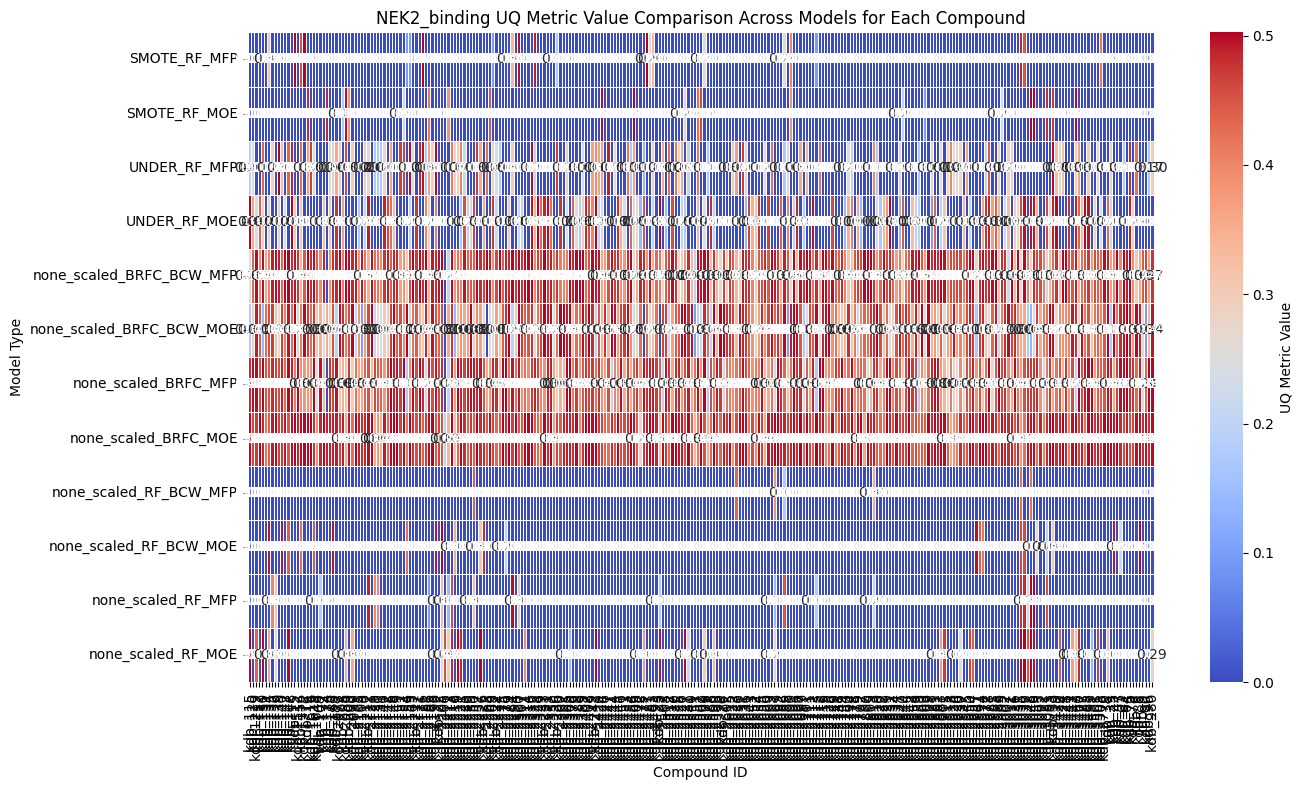

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<bound method Series.unique of 407       kdb_819
408       kdb_952
409       kdb_682
410      kdb_1216
411       kdb_481
           ...   
10984     kdb_749
10985     kdb_819
10986     kdb_840
10987     kdb_872
10988     kdb_966
Name: compound_id, Length: 4872, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

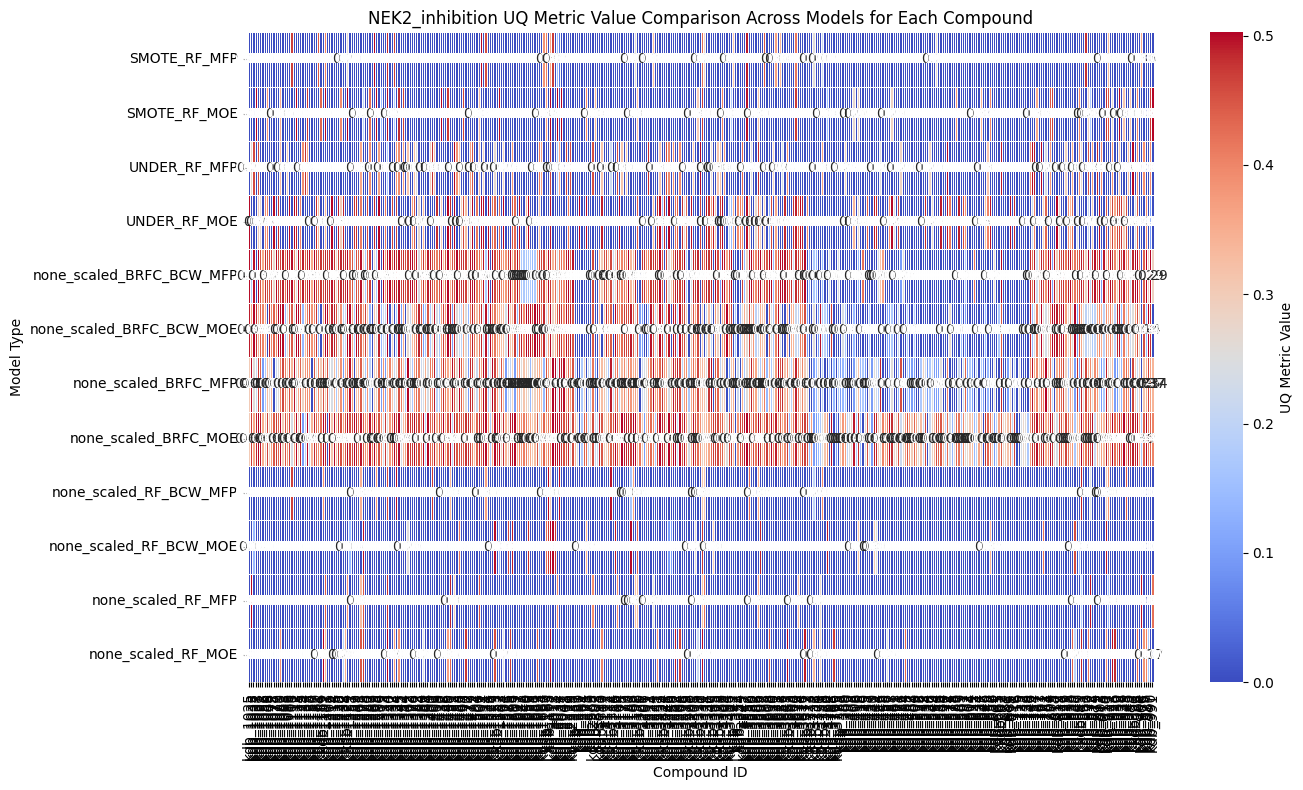

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<bound method Series.unique of 282     kdb_2690
283       kdb_98
284     kdb_2082
285     kdb_2350
286     kdb_2655
          ...   
7609    kdb_2632
7610    kdb_2996
7611    kdb_3010
7612    kdb_3023
7613    kdb_3053
Name: compound_id, Length: 3384, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

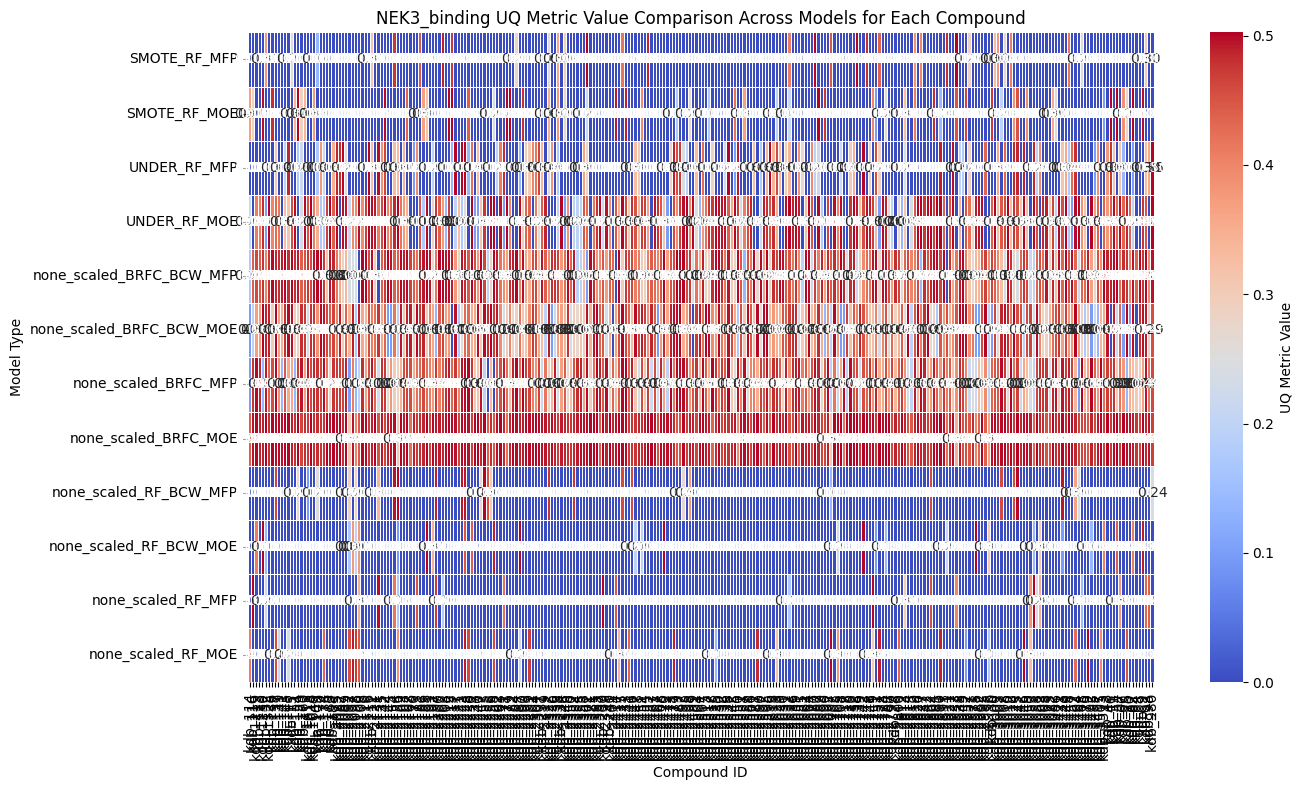

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<bound method Series.unique of 248     kdb_2328
249     kdb_3496
250     kdb_1040
251     kdb_2388
252     kdb_2069
          ...   
6691    kdb_2820
6692    kdb_2894
6693    kdb_2934
6694    kdb_3052
6695    kdb_3458
Name: compound_id, Length: 2976, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

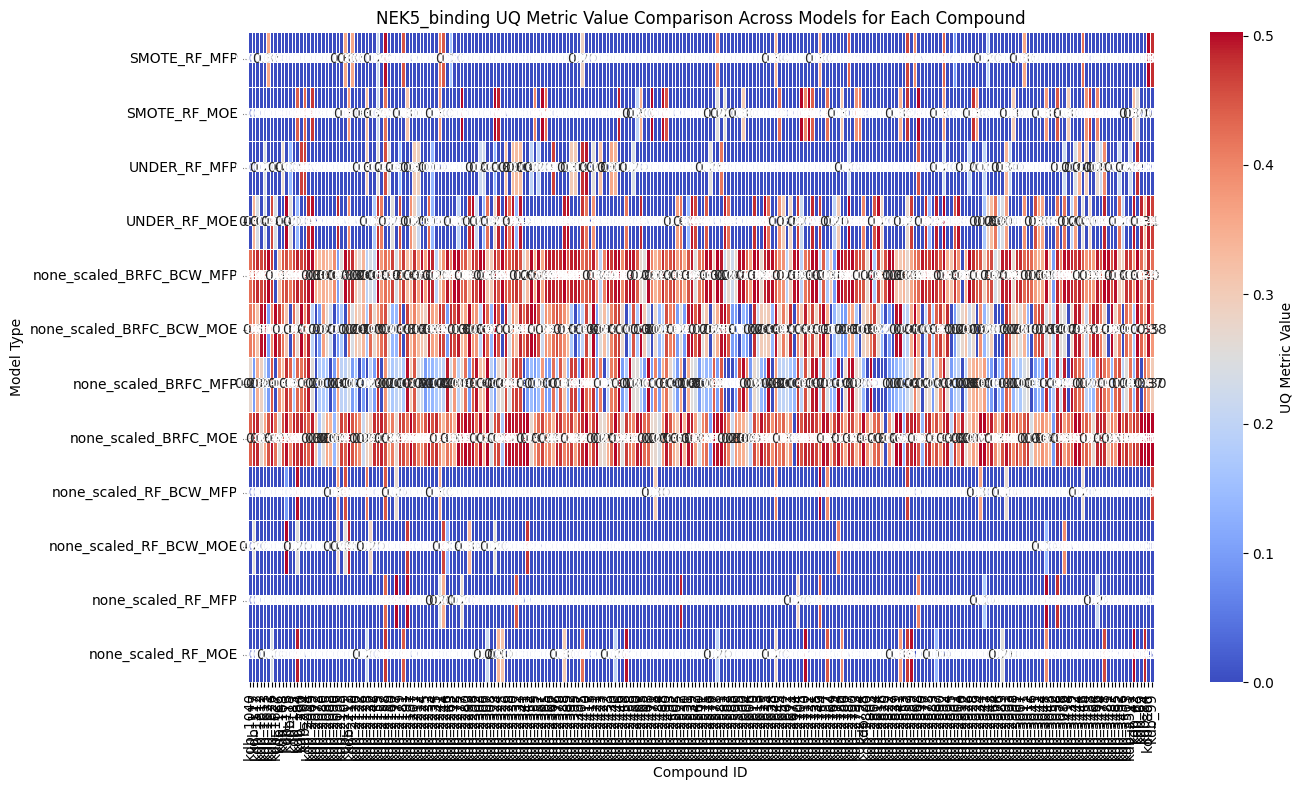

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<bound method Series.unique of 283     kdb_2122
284     kdb_1612
285     kdb_2155
286     kdb_2425
287     kdb_2397
          ...   
7636    kdb_2673
7637    kdb_2768
7638    kdb_2845
7639    kdb_3053
7640      kdb_74
Name: compound_id, Length: 3396, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

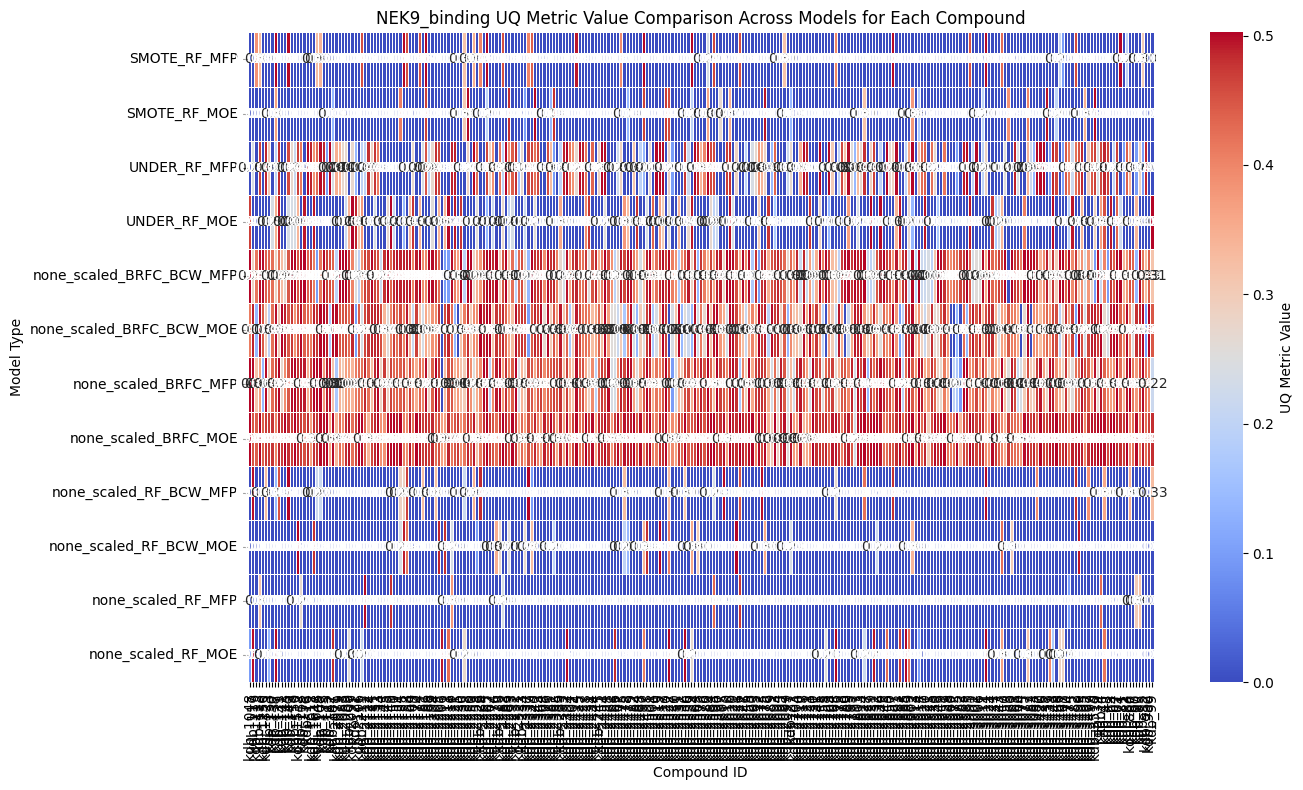

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<bound method Series.unique of 80      kdb_3330
81      kdb_3294
82      kdb_3296
83      kdb_3328
84      kdb_3119
          ...   
2155    kdb_3756
2156    kdb_3757
2157    kdb_3761
2158    kdb_3762
2159    kdb_3772
Name: compound_id, Length: 960, dtype: object>

['none_scaled_RF_MOE' 'none_scaled_RF_BCW_MOE' 'none_scaled_BRFC_MOE'
 'none_scaled_BRFC_BCW_MOE' 'UNDER_RF_MOE' 'SMOTE_RF_MOE'
 'none_scaled_RF_MFP' 'none_scaled_RF_BCW_MFP' 'none_scaled_BRFC_MFP'
 'none_scaled_BRFC_BCW_MFP' 'UNDER_RF_MFP' 'SMOTE_RF_MFP']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

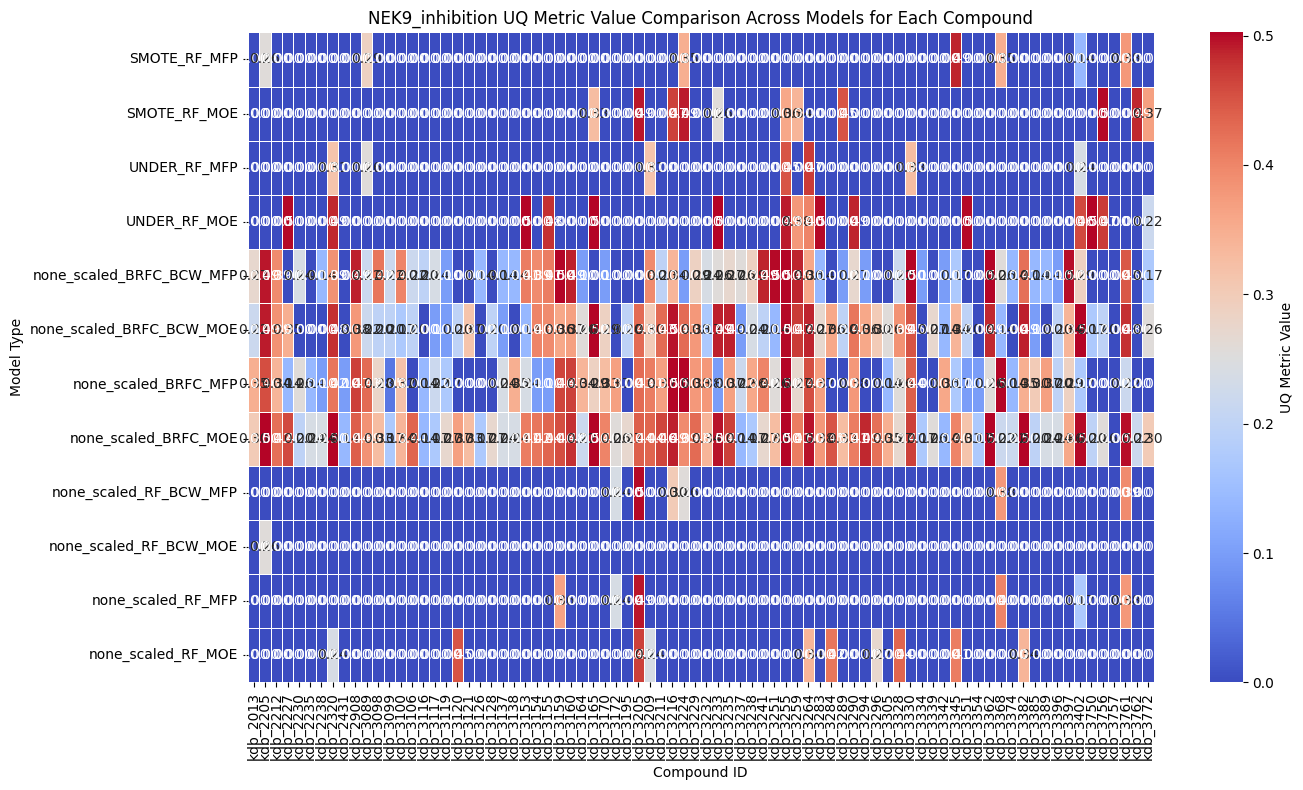

In [48]:
sampling_combos_rf = [('none_scaled','RF'),('none_scaled','RF_BCW'),('SMOTE','RF'), 
    ('none_scaled','BRFC'),('none_scaled','BRFC_BCW'),('UNDER','RF')]
samp_rf_list1 = [f'{samp}_{rf}' for samp, rf in sampling_combos_rf]
sampling_combos = [('none_scaled','RF'),('none_scaled','RF_BCW'),('SMOTE','RF'), 
    ('none_scaled','BRFC'),('none_scaled','BRFC_BCW'),('UNDER','RF'), ('SMOTE', 'GP_matern'),
                  ('none_scaled','GP_matern'), ('UNDER','GP_matern')]
samp_list = [f'{samp}_{m}' for samp,m in sampling_combos]
# rf first
for nek in neks:
    all_model_test_cmpds=[] 
    nek_df = pd.read_csv(f'{cmpd_df_path}{nek}_all_models.csv')
    for feat in feat_types: 
        for samp in samplings: 
            for m in RF_types:
                
                df=pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{m}_cmpd_class.csv')
                cmpd_set = set(df['compound_id'].values)
                all_model_test_cmpds.append(cmpd_set)
    print(nek)
    intersection_set = set.intersection(*all_model_test_cmpds)
    comparison_df = nek_df[nek_df['compound_id'].isin(intersection_set)]
    
    comparison_df = comparison_df[comparison_df['model_version'].isin(samp_list)]
    comparison_df['model name']=comparison_df['model_version'].astype(str)+ '_'+comparison_df['feat_type']
    display(comparison_df['compound_id'].unique)
    print(comparison_df['model name'].unique())
    melted_df = comparison_df.melt(
    id_vars=['compound_id', 'feat_type', 'NEK', 'strategy', 'modeling_type', 'model_version'],  
    value_vars=['UQ_metric_value'], var_name='metric',  value_name='UQ_metric')
    melted_df.to_csv(f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/{nek}_RF_models_UQ.csv', index=False)
    common_cmpds = list(intersection_set)
    wide_df = comparison_df.pivot_table(index='model name',columns='compound_id', 
                                        values='UQ_metric_value')        
    # display(wide_df)
    wide_df.to_csv(f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/{nek}_RF_models_UQ_wide.csv', index=False)
    plt.figure(figsize=(14, 8))

    sns.heatmap(wide_df, cmap='coolwarm', annot=True, fmt='.2f', 
        cbar_kws={'label': 'UQ Metric Value'}, 
        linewidths=0.5,xticklabels=True,yticklabels=True)
    
    plt.title(f'{nek} UQ Metric Value Comparison Across Models for Each Compound')
    plt.xlabel('Compound ID')
    plt.ylabel('Model Type')
    plt.xticks(rotation=90)  
    plt.tight_layout()
    # plt.savefig(f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/figs/{nek}.png')
    plt.show()
    

# plot for classifcation types (TP, FP, etc.)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_binding
(12, 270)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

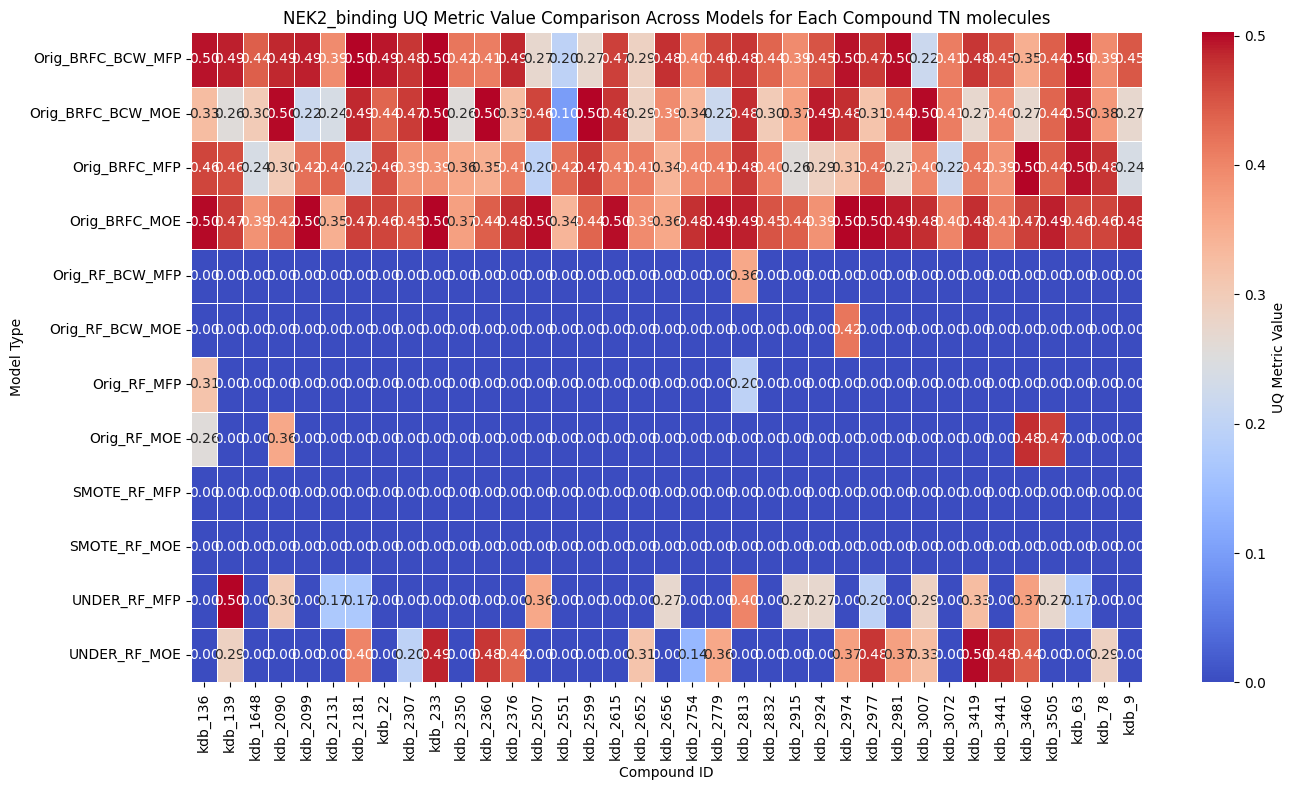

(12, 234)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

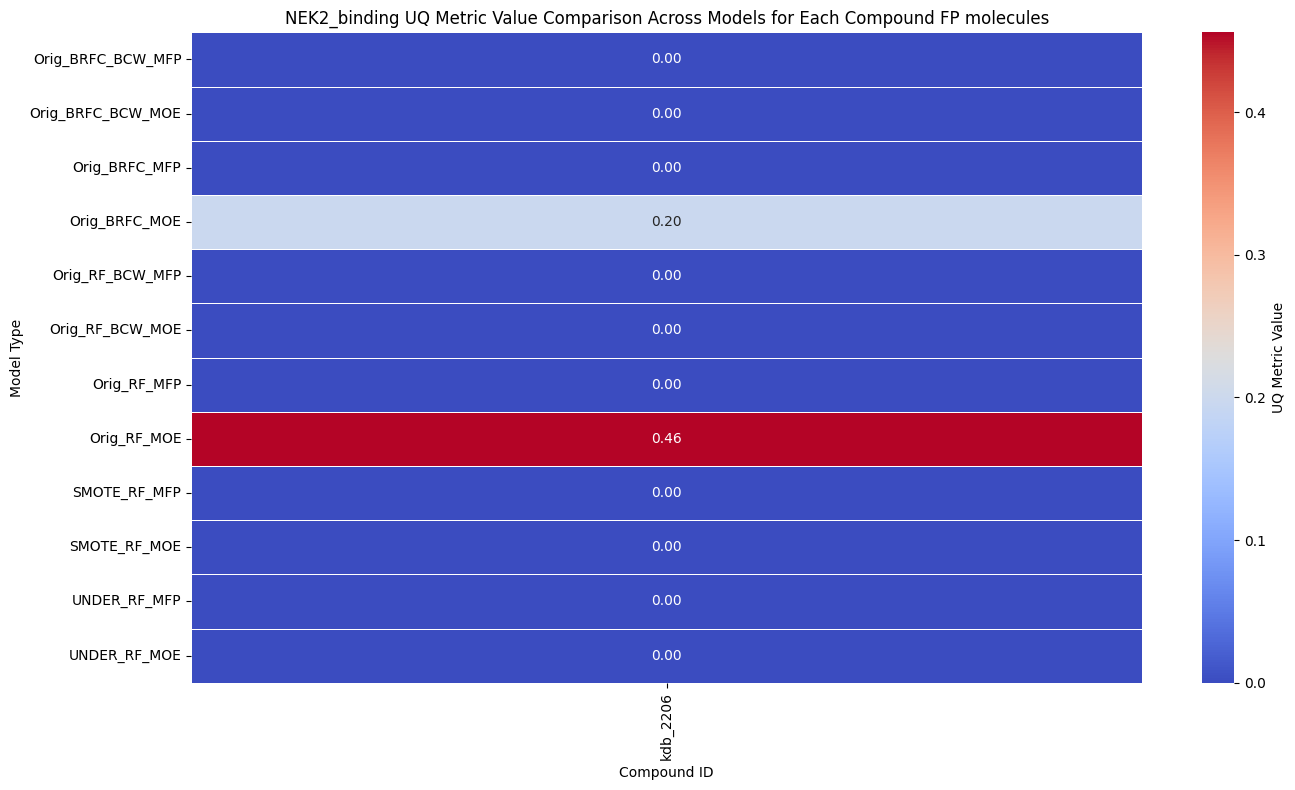

(12, 12)


<IPython.core.display.Javascript object>

NEK2_binding: no FN
(12, 12)


<IPython.core.display.Javascript object>

NEK2_binding: no TP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition
(12, 20)


<IPython.core.display.Javascript object>

NEK2_inhibition: no FN
(12, 378)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

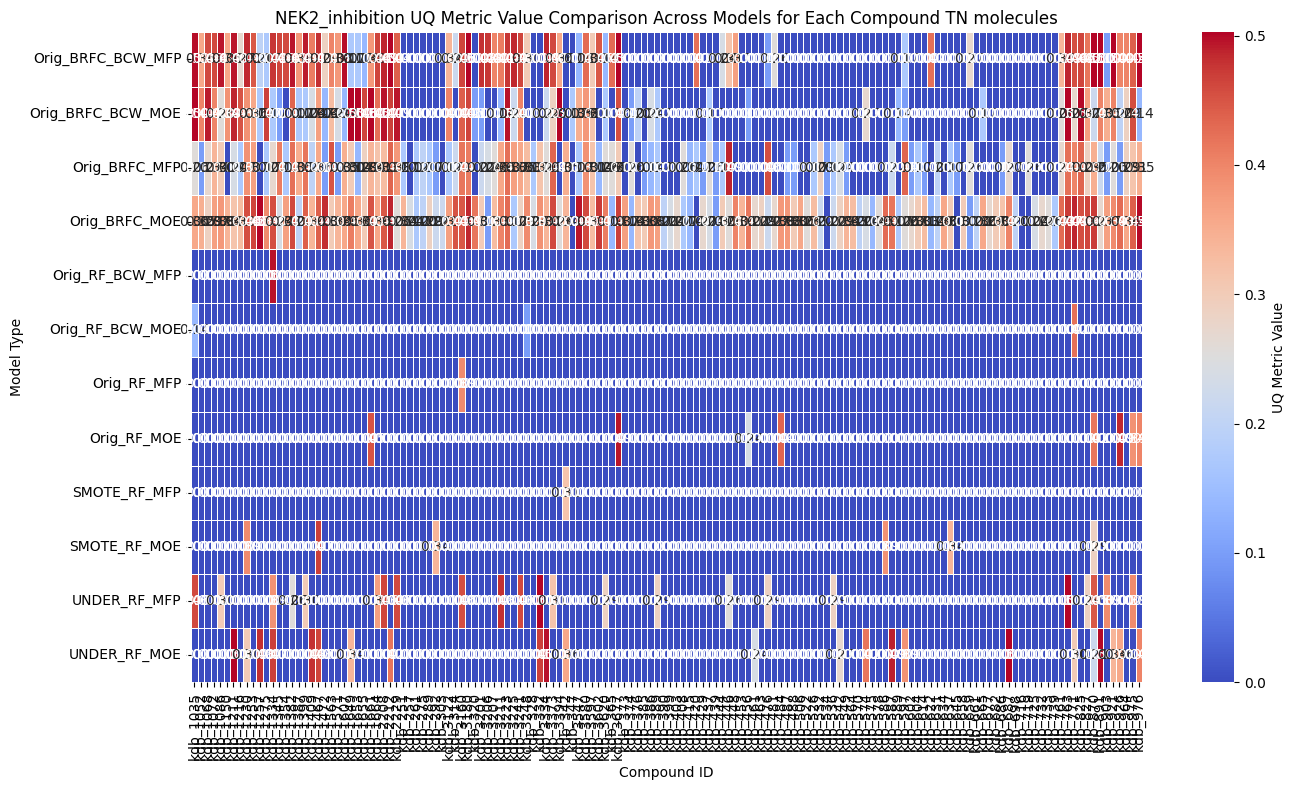

(12, 232)


<IPython.core.display.Javascript object>

NEK2_inhibition: no FP
(12, 28)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

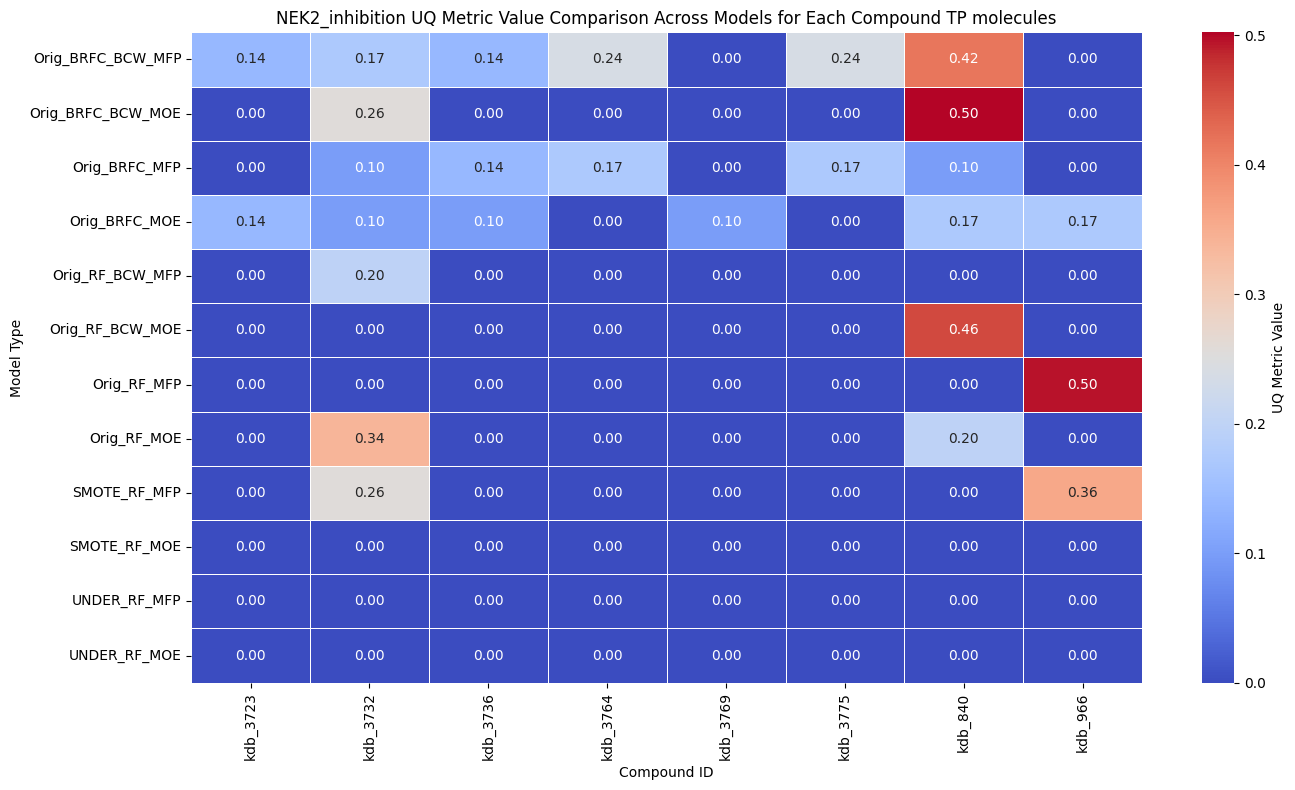

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding
(12, 265)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

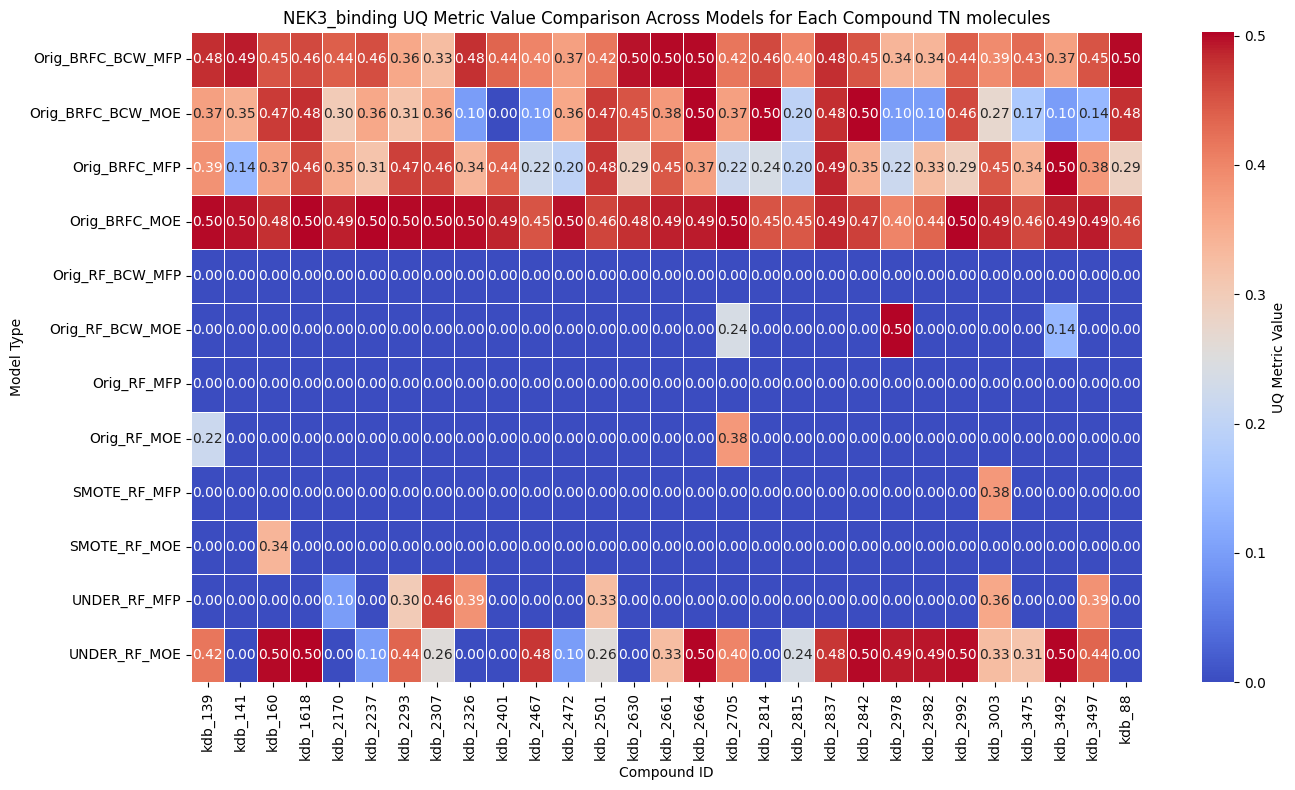

(11, 16)


<IPython.core.display.Javascript object>

NEK3_binding: no FN
(12, 17)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

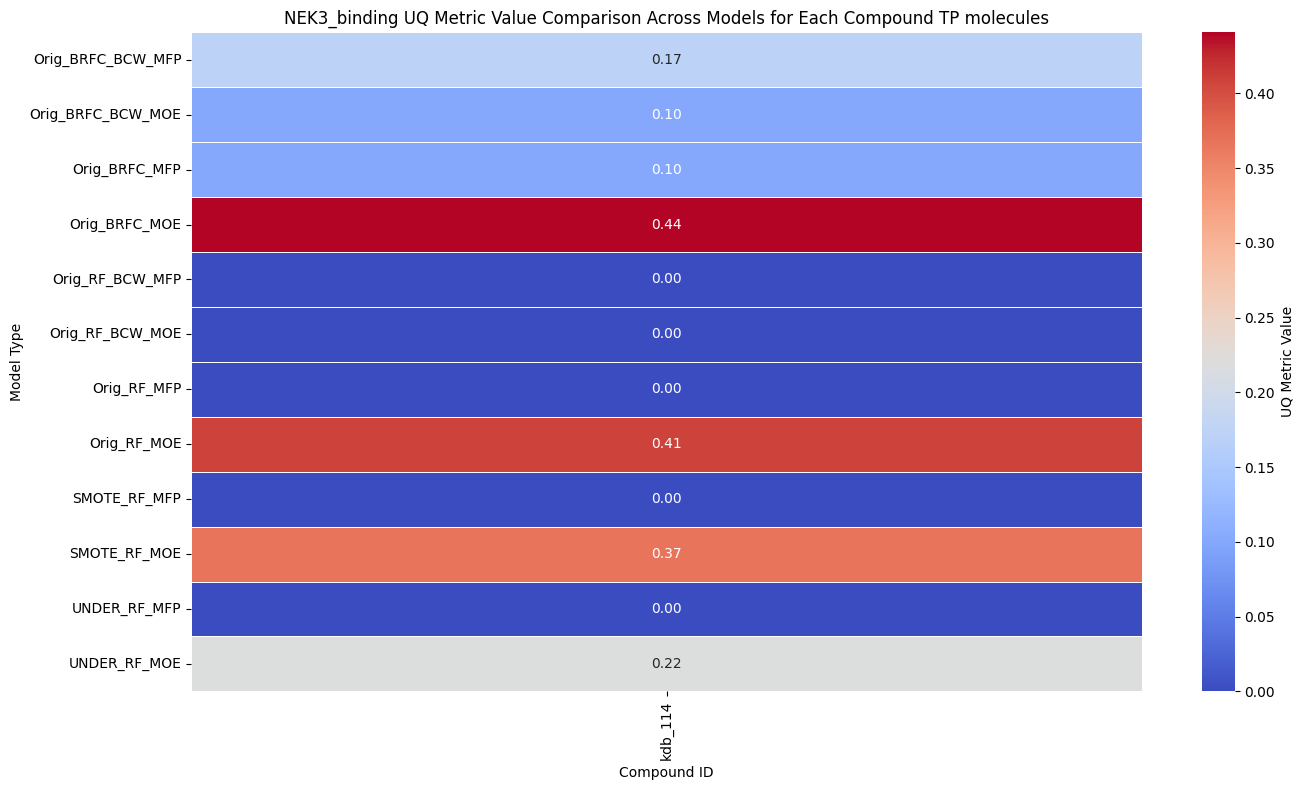

(12, 236)


<IPython.core.display.Javascript object>

NEK3_binding: no FP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding
(12, 142)


<IPython.core.display.Javascript object>

NEK5_binding: no FP
(12, 228)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

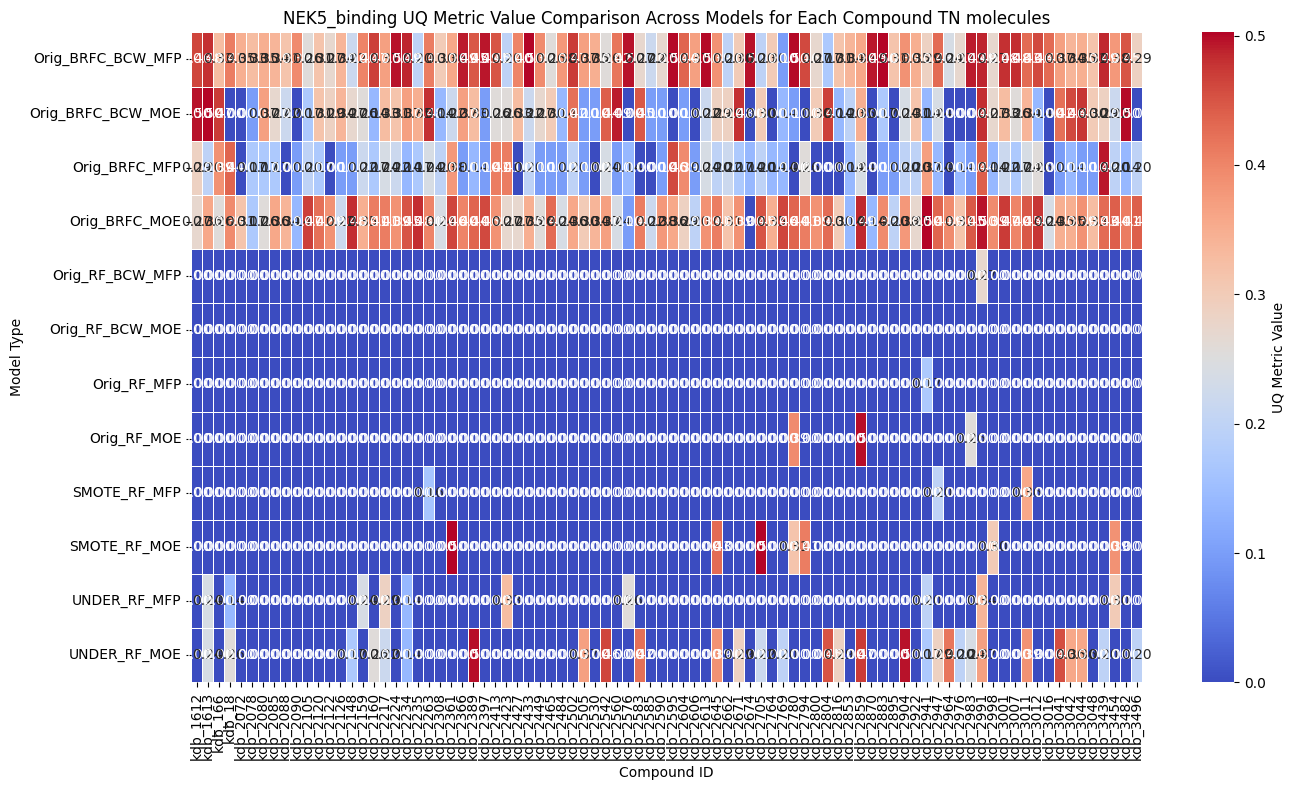

(12, 17)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

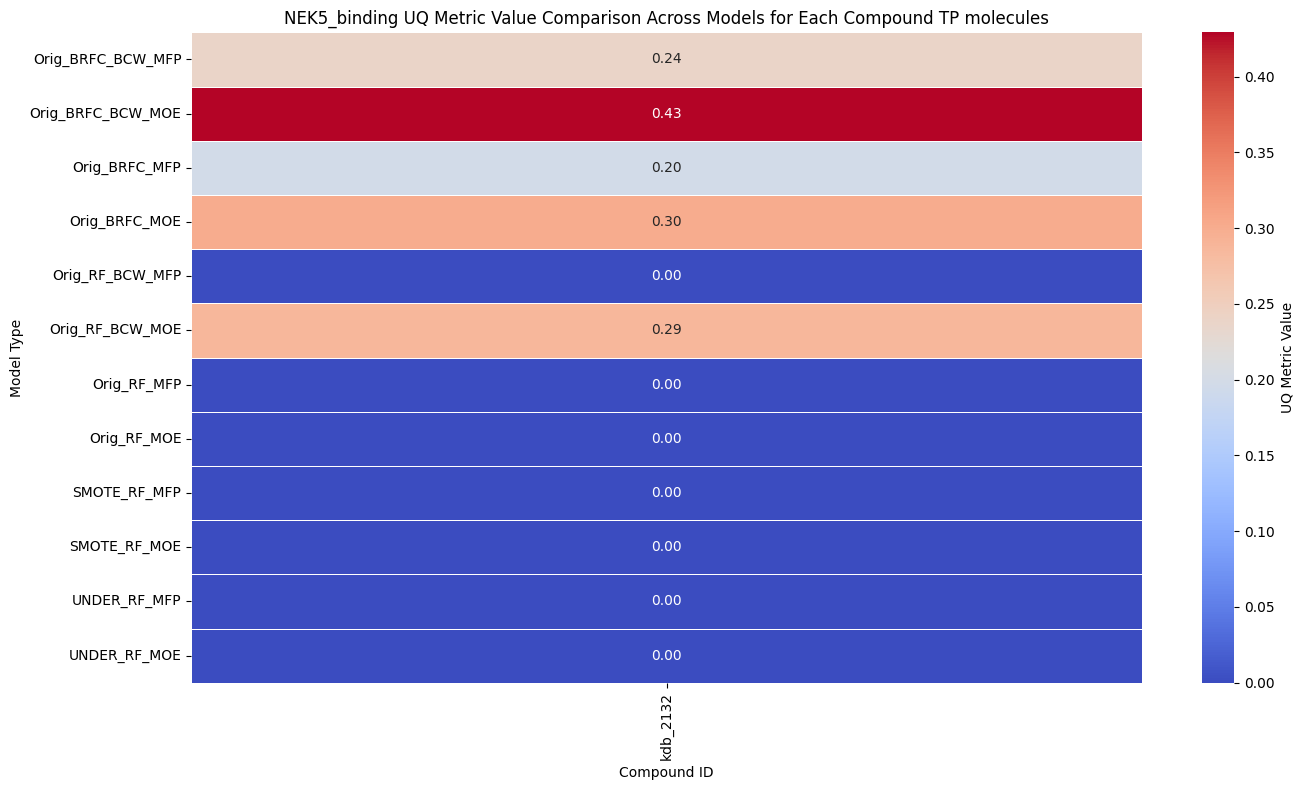

(12, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

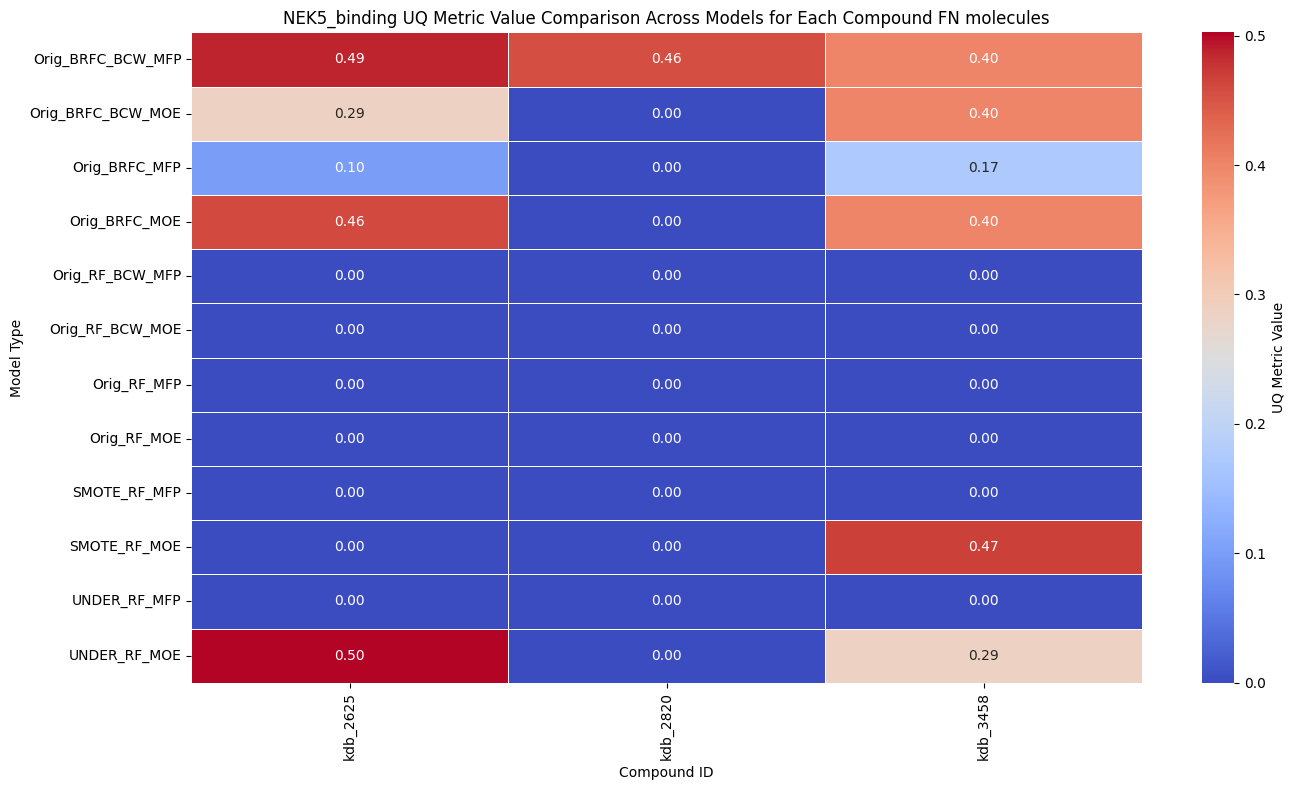

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding
(12, 270)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

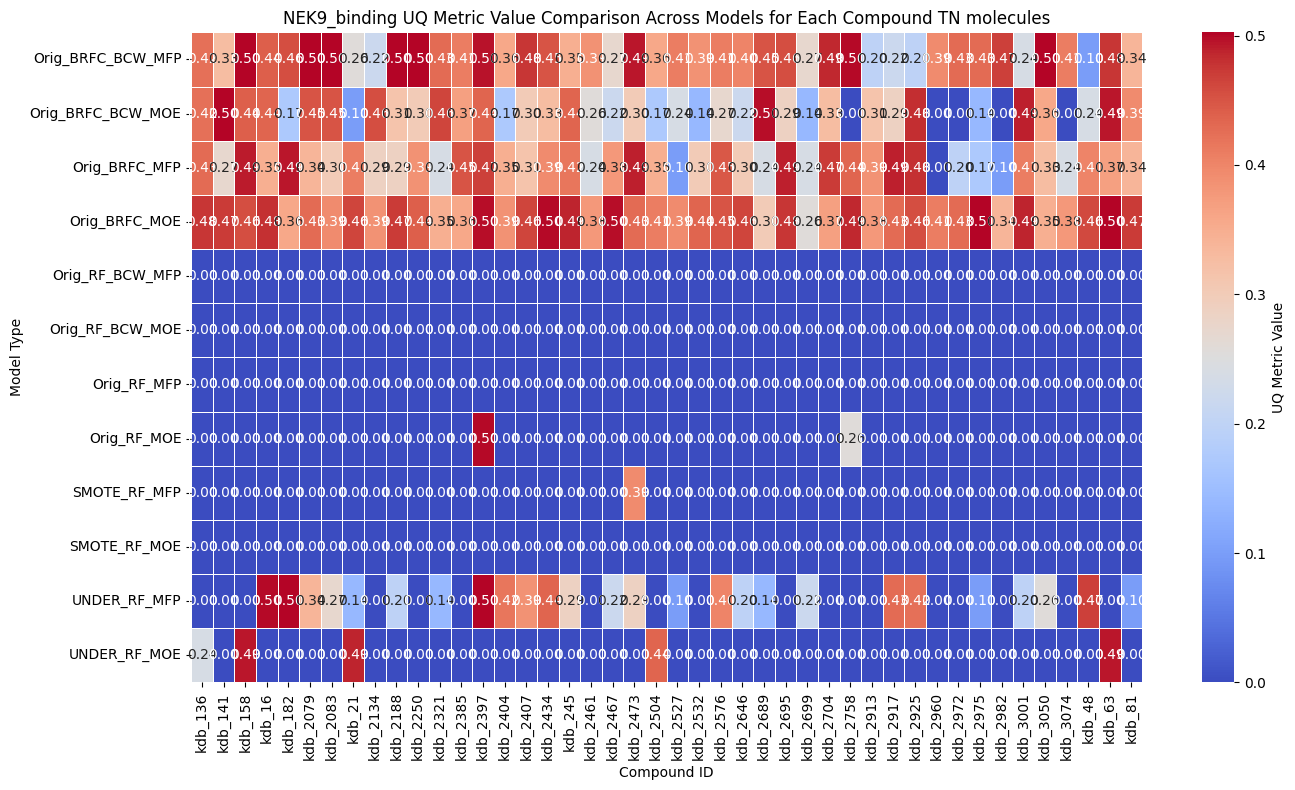

(12, 13)


<IPython.core.display.Javascript object>

NEK9_binding: no FN
(12, 226)


<IPython.core.display.Javascript object>

NEK9_binding: no FP
(12, 13)


<IPython.core.display.Javascript object>

NEK9_binding: no TP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition
(12, 71)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

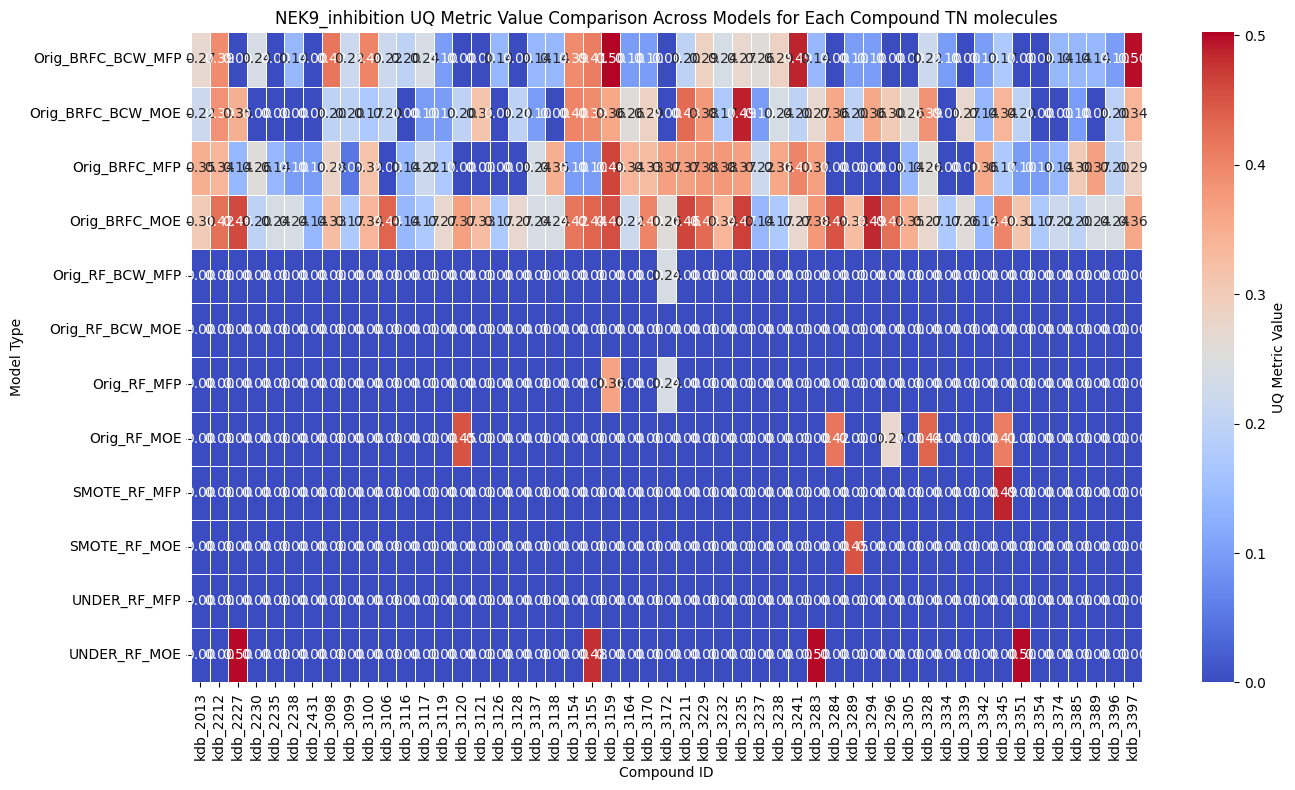

(12, 6)


<IPython.core.display.Javascript object>

NEK9_inhibition: no FN
(12, 20)


<IPython.core.display.Javascript object>

NEK9_inhibition: no FP
(12, 9)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

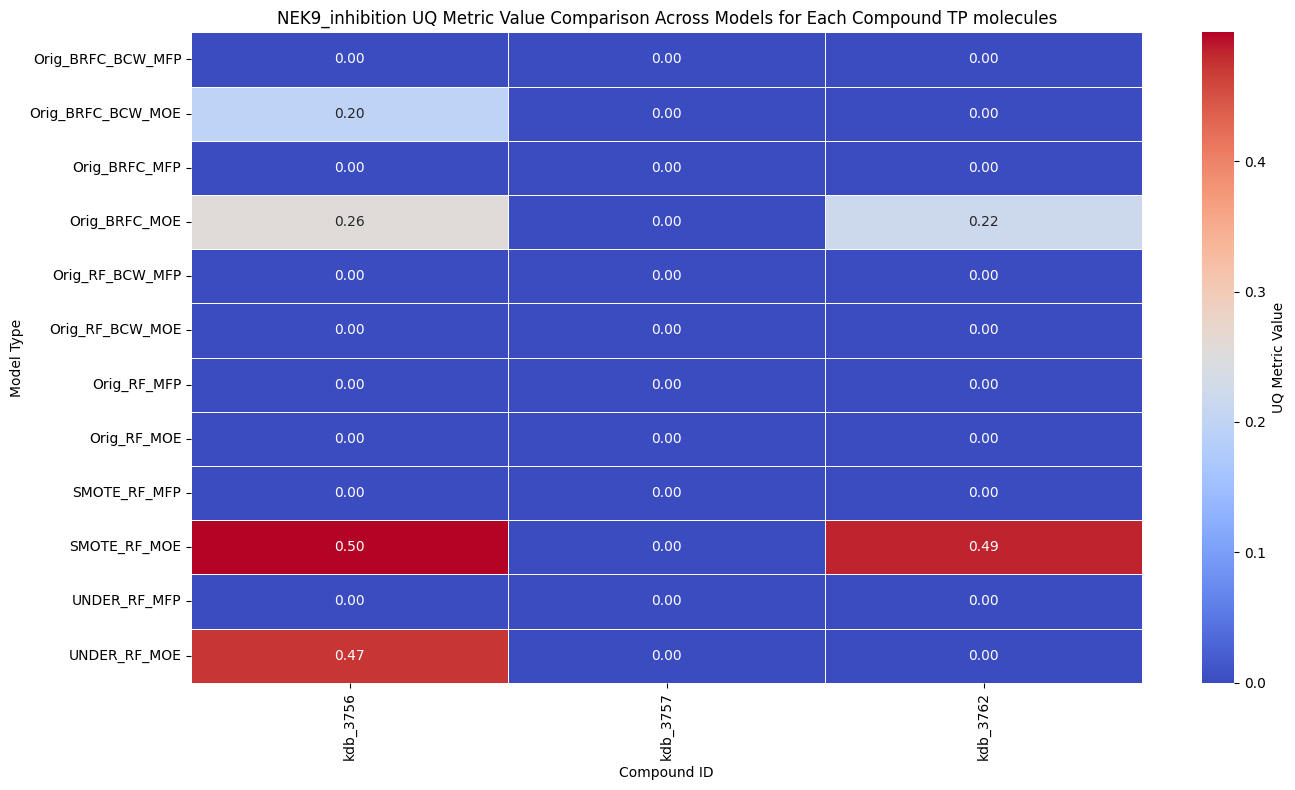

In [65]:
for nek in neks:
    all_model_test_cmpds=[] 
    nek_df = pd.read_csv(f'{cmpd_df_path}{nek}_all_models.csv')
    for feat in feat_types: 
        for samp in samplings: 
            for m in RF_types:
                df=pd.read_csv(f'{cmpd_df_path}{nek}_{feat}_{samp}_{m}_cmpd_class.csv')
                cmpd_set = set(df['compound_id'].values)
                all_model_test_cmpds.append(cmpd_set)
    print(nek)
    intersection_set = set.intersection(*all_model_test_cmpds)
    comparison_df = nek_df[nek_df['compound_id'].isin(intersection_set)]
    
    
    comparison_df = comparison_df[comparison_df['model_version'].isin(samp_list)]
    comparison_df['model_version']=comparison_df['model_version'].str.replace('none_scaled','Orig')
    comparison_df['model name']=comparison_df['model_version'].astype(str)+ '_'+comparison_df['feat_type']

    melted_df = comparison_df.melt(
    id_vars=['compound_id', 'feat_type', 'NEK', 'strategy', 'modeling_type', 'model_version', 'prediction_type'],  
    value_vars=['UQ_metric_value'], var_name='metric',  value_name='UQ_metric')
    common_cmpds = list(intersection_set)
    for pred_type in melted_df['prediction_type'].unique(): 
        prediction_type_df = comparison_df[comparison_df['prediction_type']==pred_type] 
        wide_df = prediction_type_df.pivot_table(index='model name',columns='compound_id', 
                                            values='UQ_metric_value')  
        
        print(wide_df.shape)
        # display(melted_df)
        plt.figure(figsize=(14, 8))
        wide_df =wide_df.dropna(axis=1) 
        if wide_df.empty or wide_df.isna().all().all():
            print(f'{nek}: no {pred_type}')
            continue
        else: 
            sns.heatmap(wide_df, cmap='coolwarm', annot=True, fmt='.2f', 
                cbar_kws={'label': 'UQ Metric Value'}, 
                linewidths=0.5,xticklabels=True,yticklabels=True)
            
            plt.title(f'{nek} UQ Metric Value Comparison Across Models for Each Compound {pred_type} molecules')
            plt.xlabel('Compound ID')
            plt.ylabel('Model Type')
            plt.xticks(rotation=90)  
            plt.tight_layout()
            plt.show()
        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC


<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC
NEK2_binding
(1, 225)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

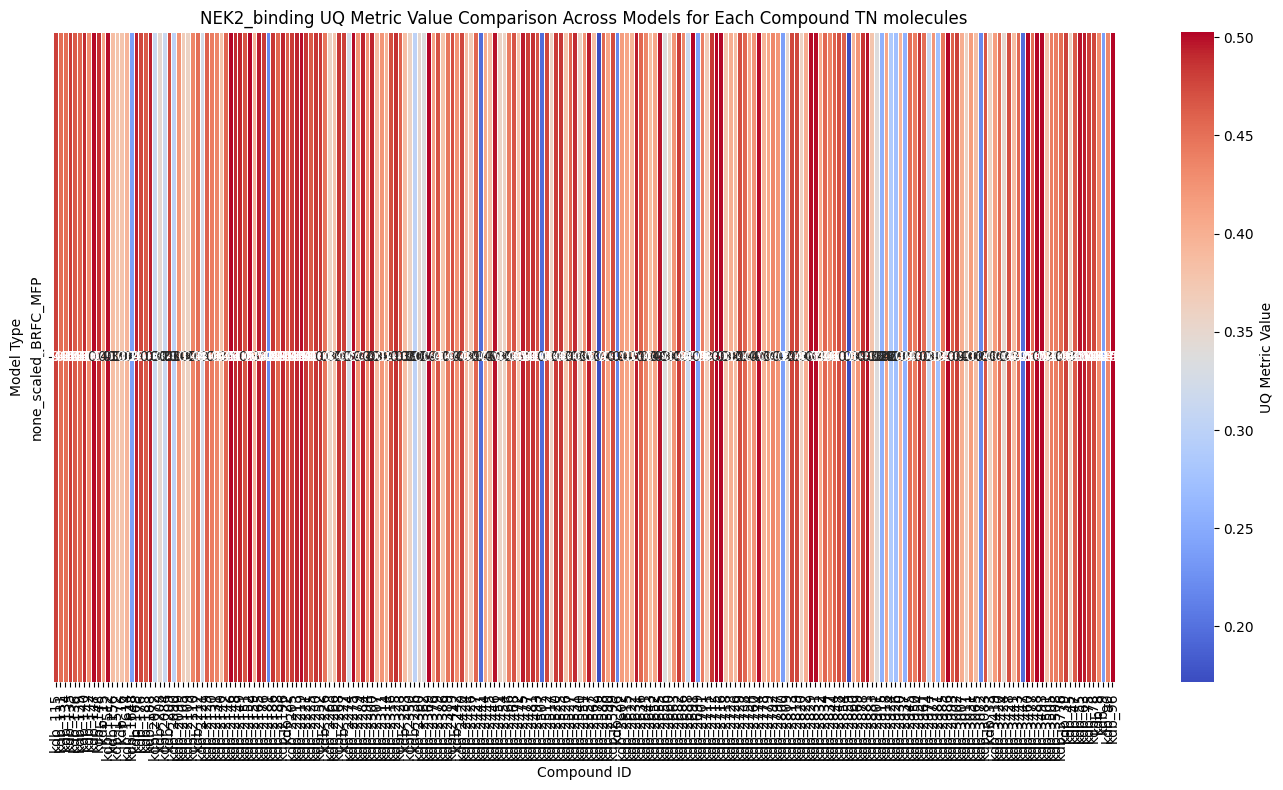

(1, 46)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

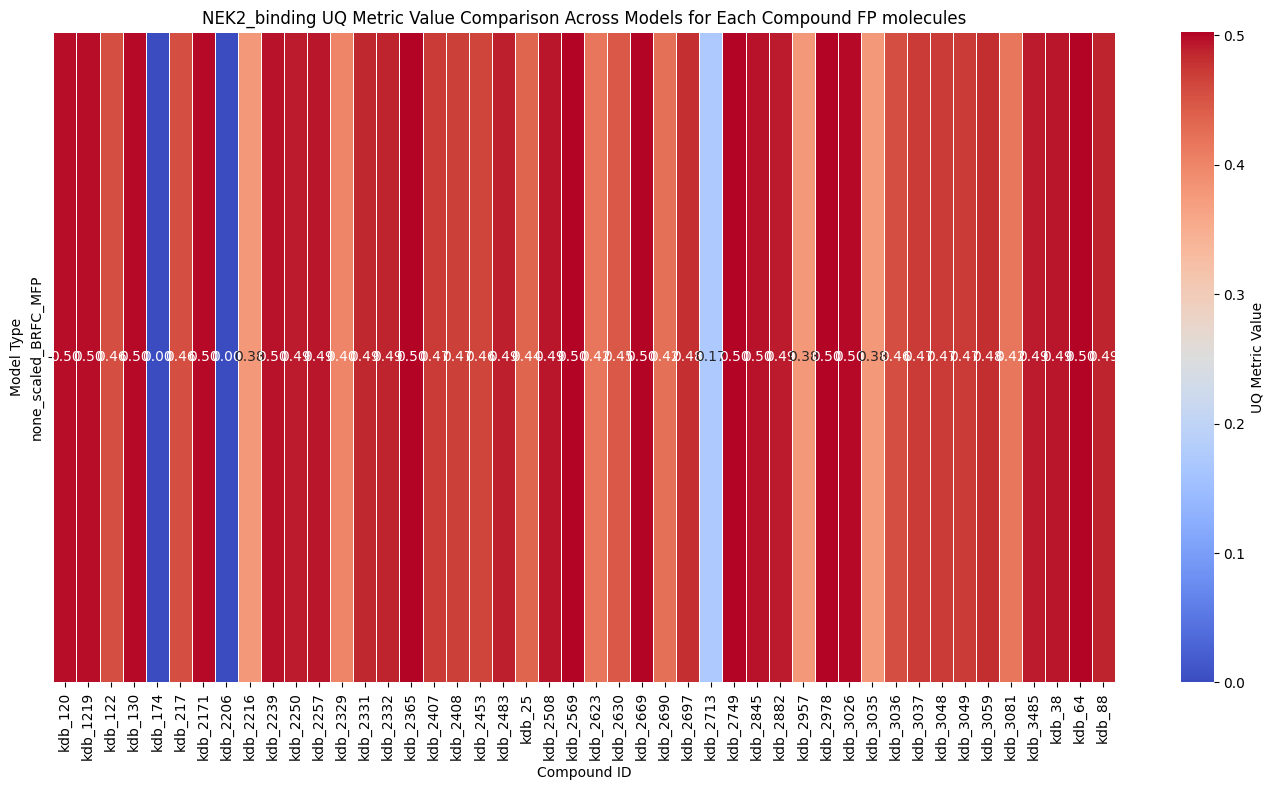

(1, 8)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

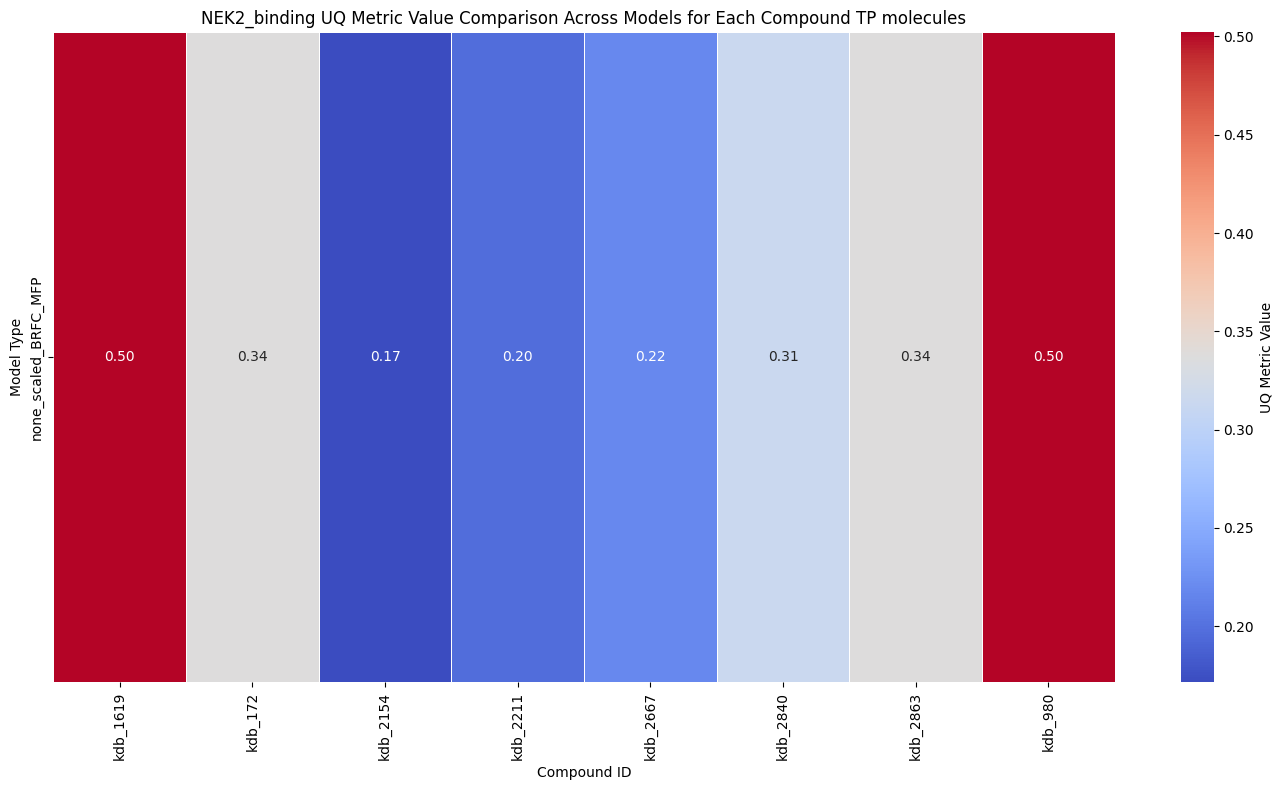

(1, 4)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

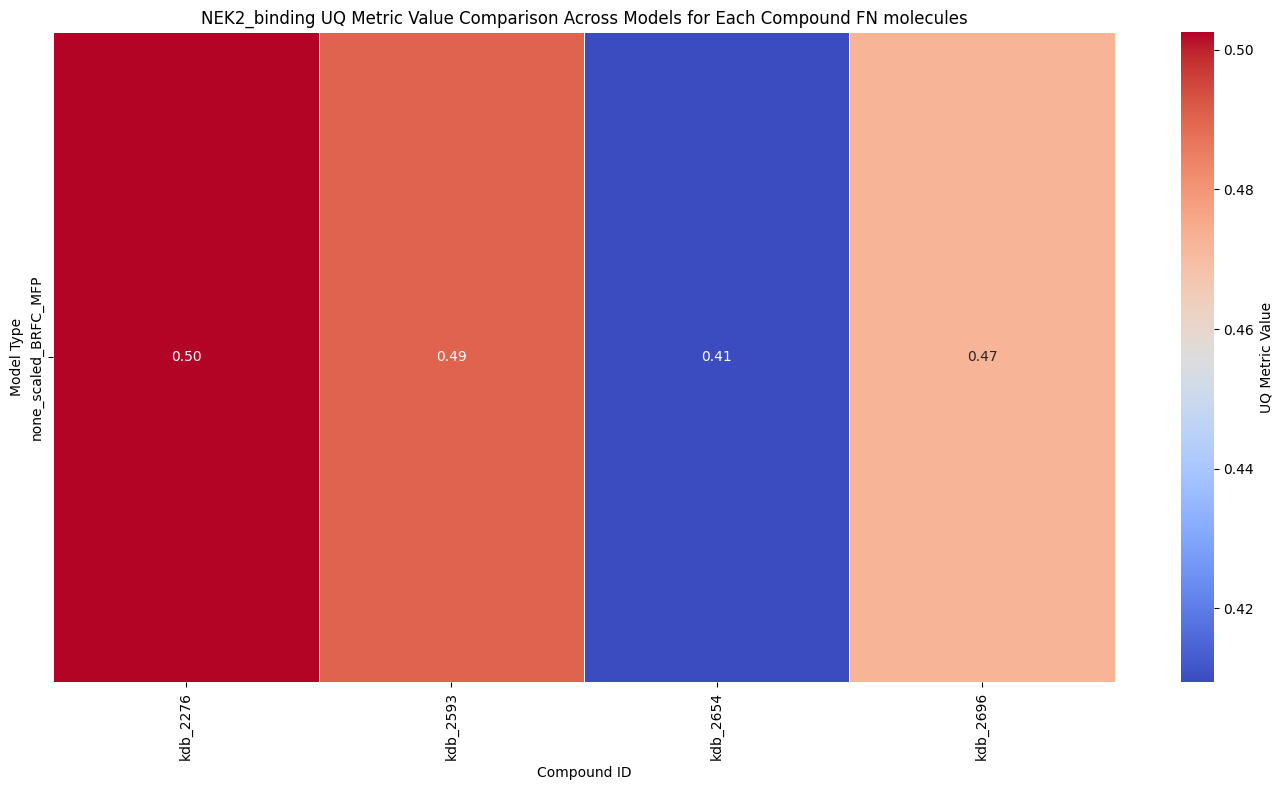

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC


<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC
NEK2_inhibition
(1, 344)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

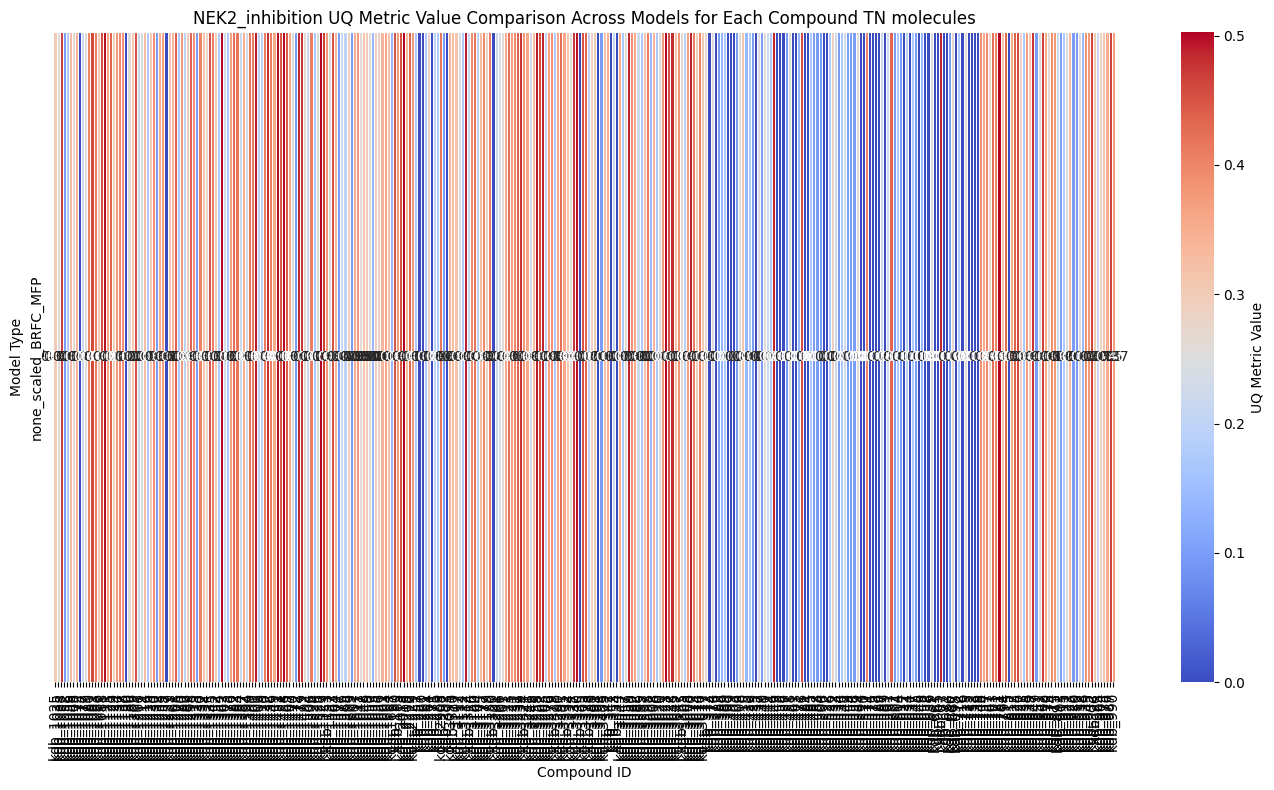

(1, 35)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

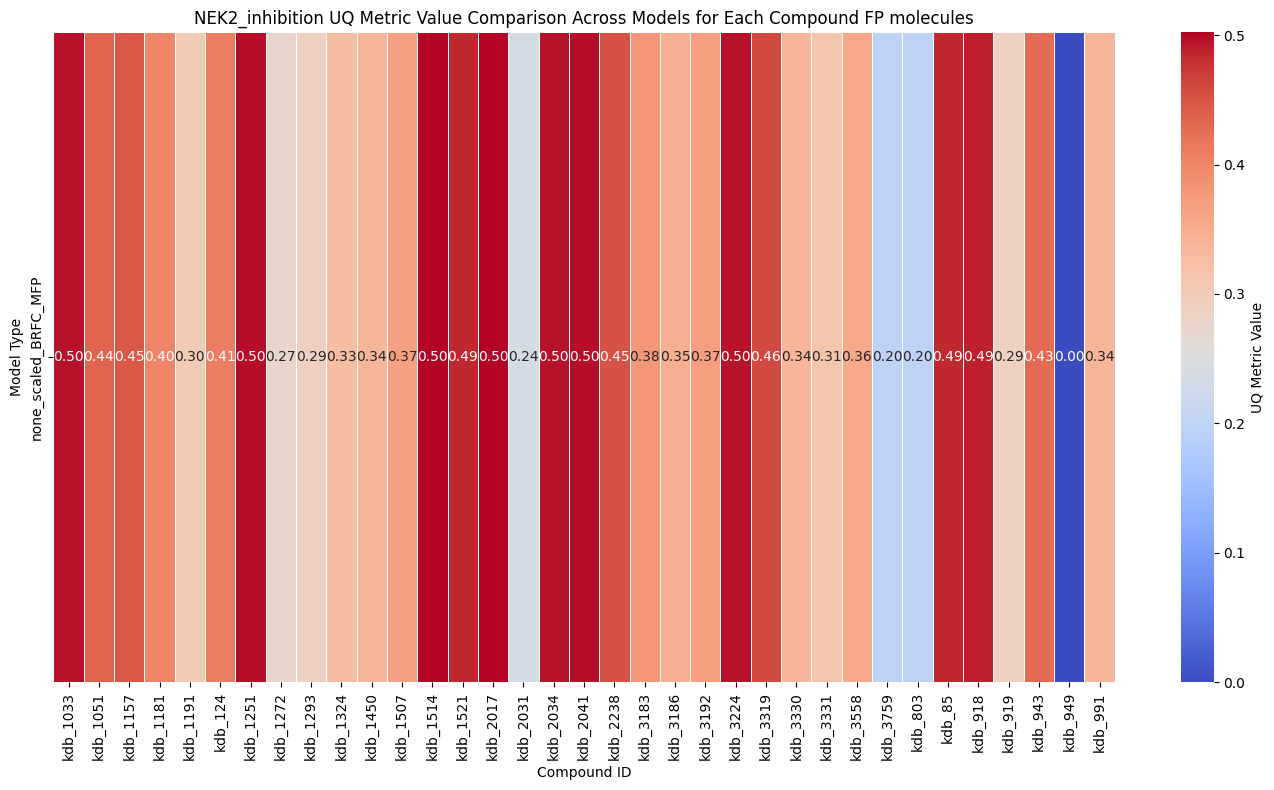

(1, 22)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

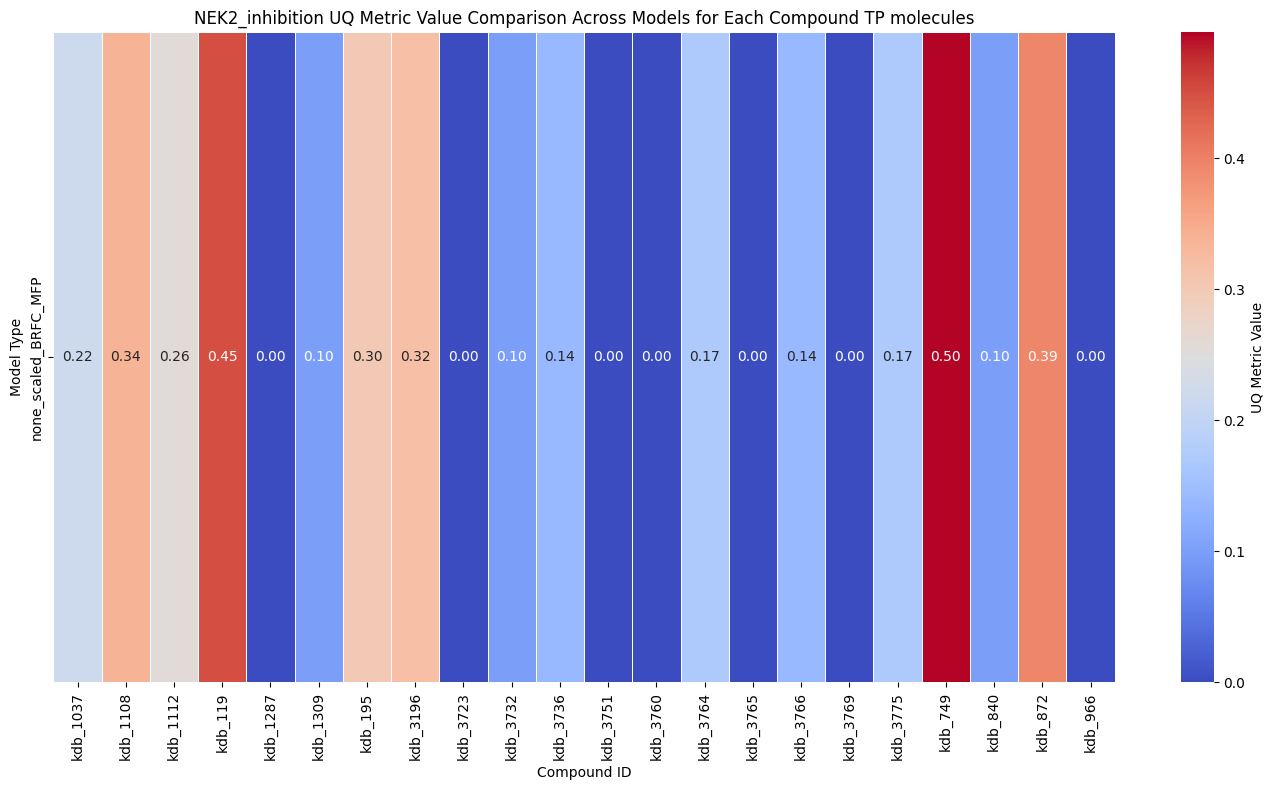

(1, 6)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

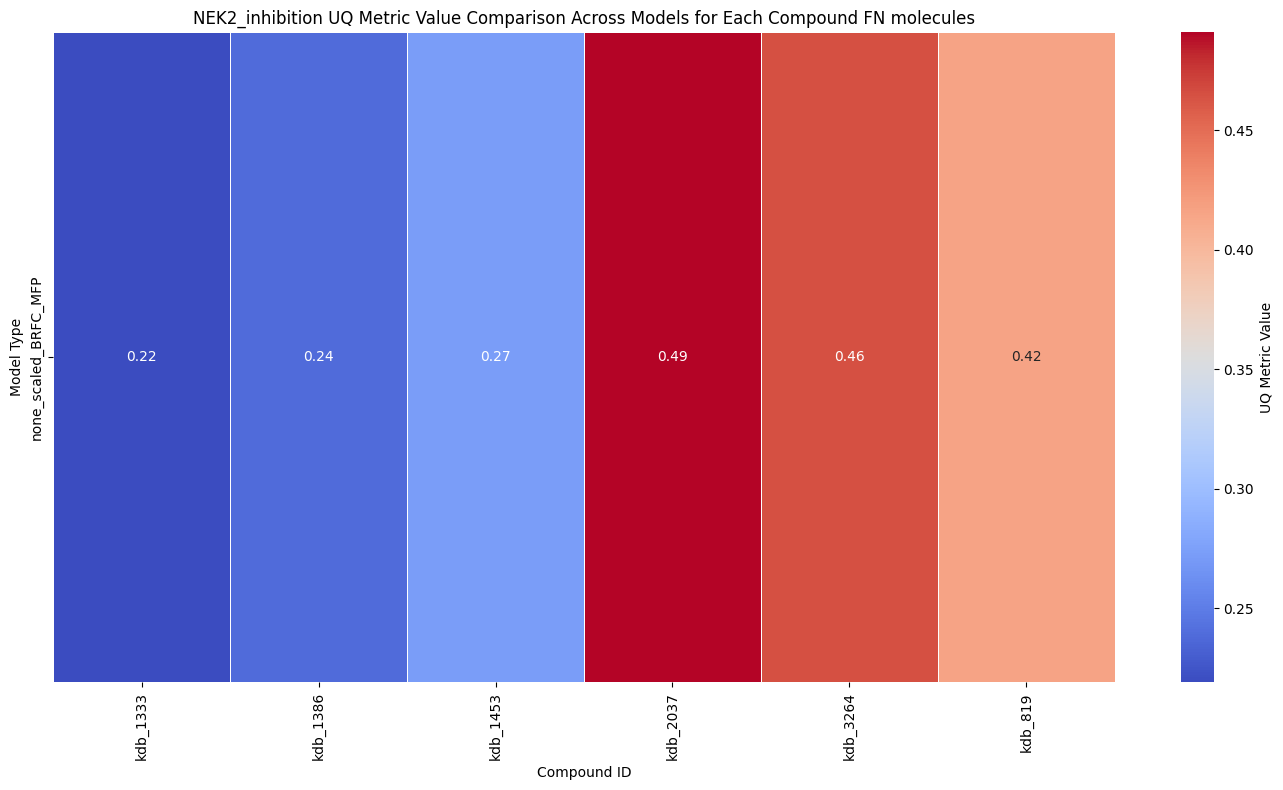

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC


<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC
NEK3_binding
(1, 193)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

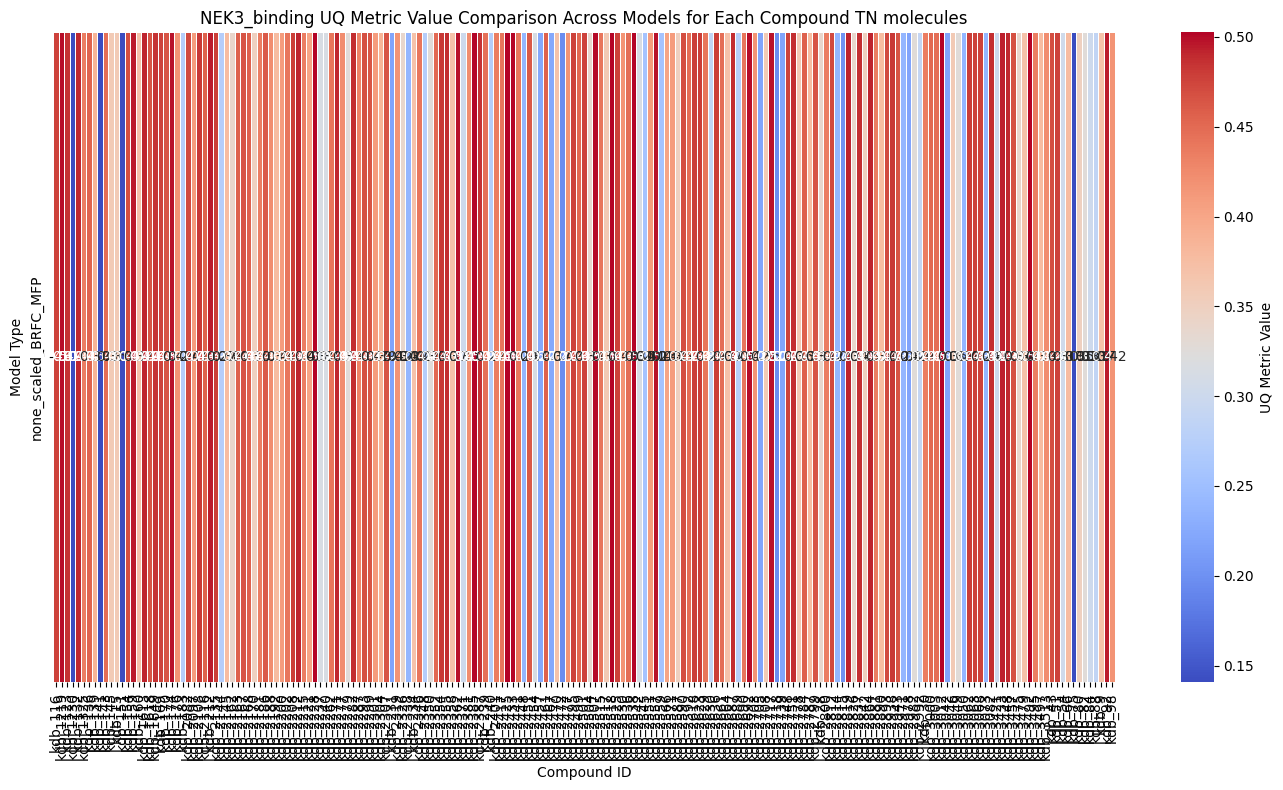

(1, 72)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

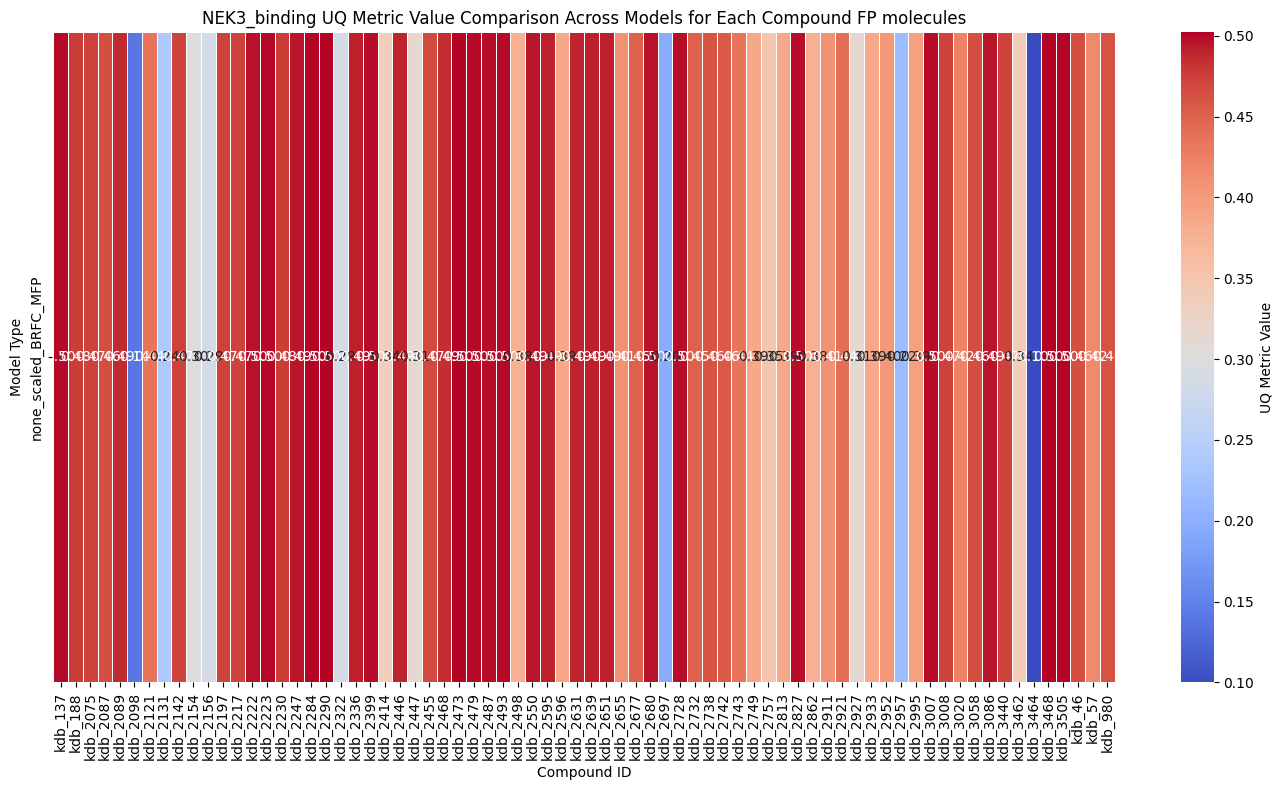

(1, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

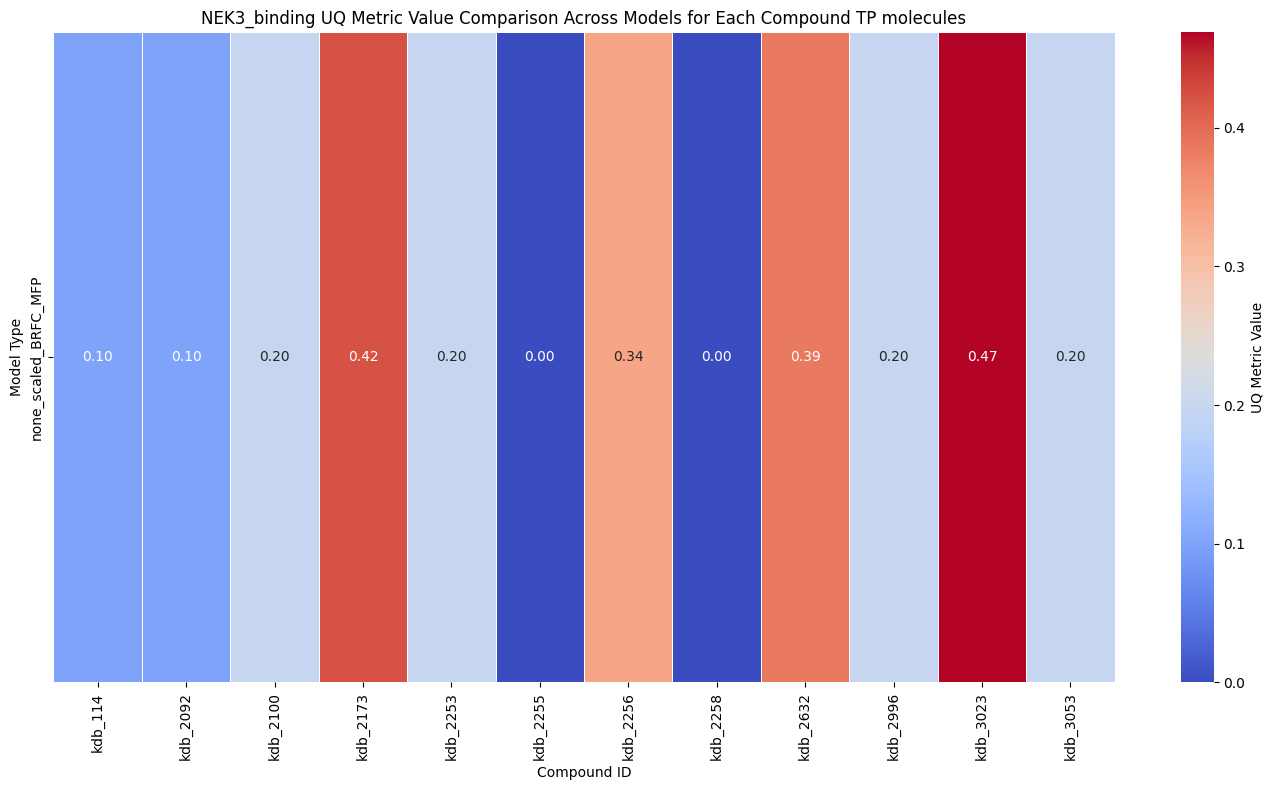

(1, 5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

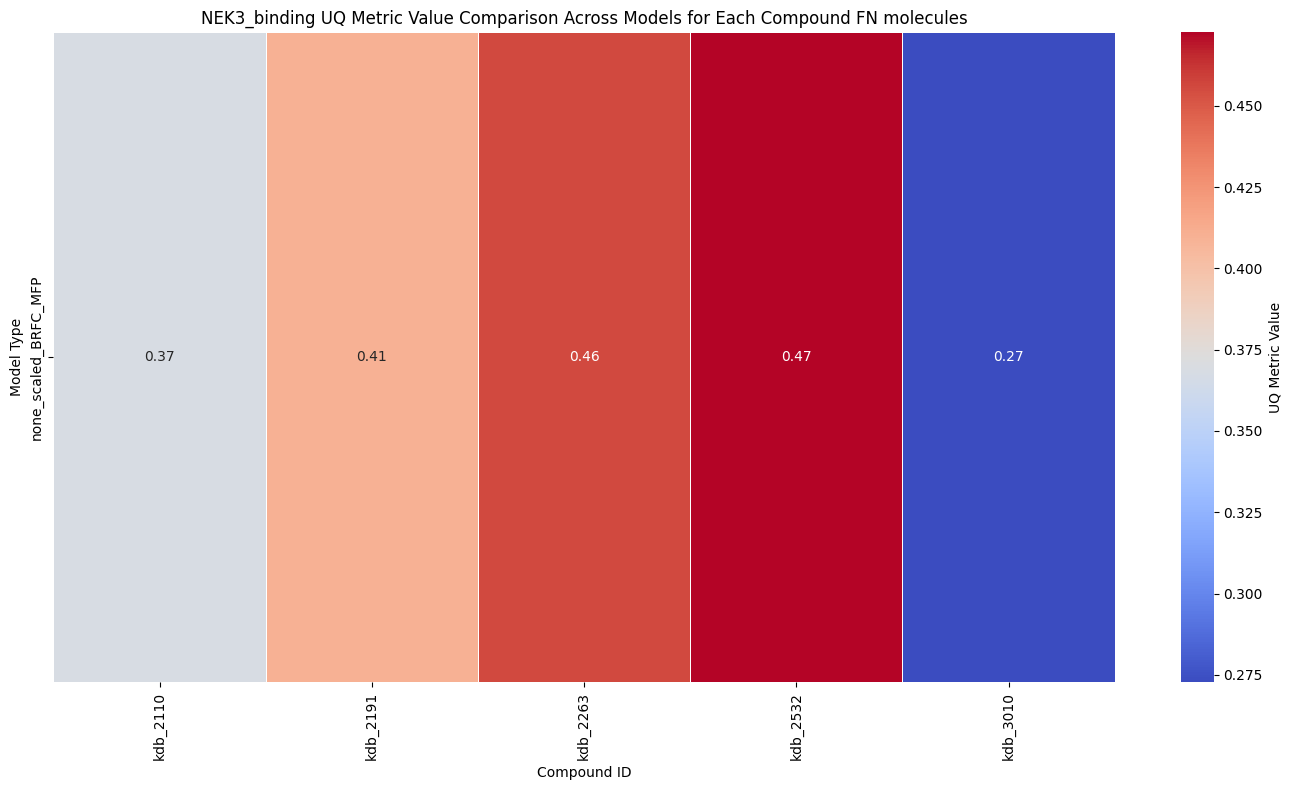

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC


<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC
NEK5_binding
(1, 194)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

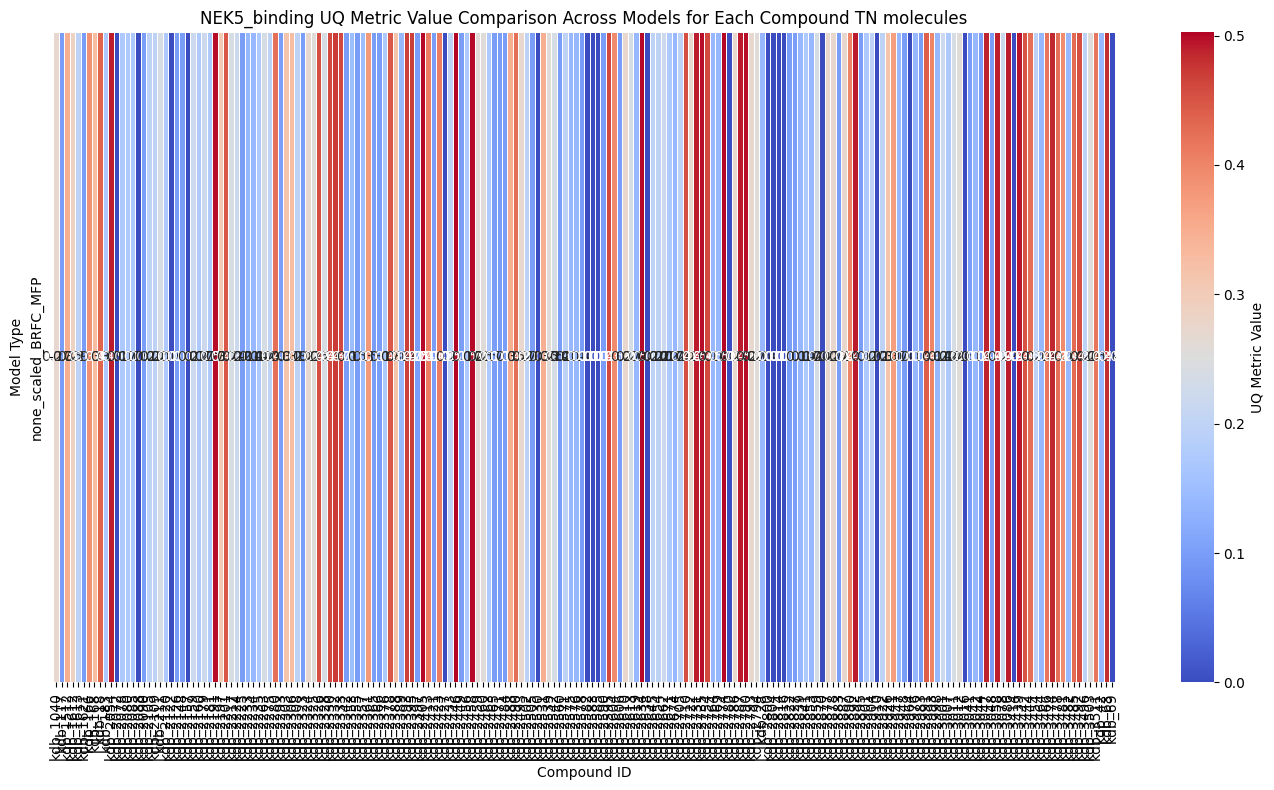

(1, 34)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

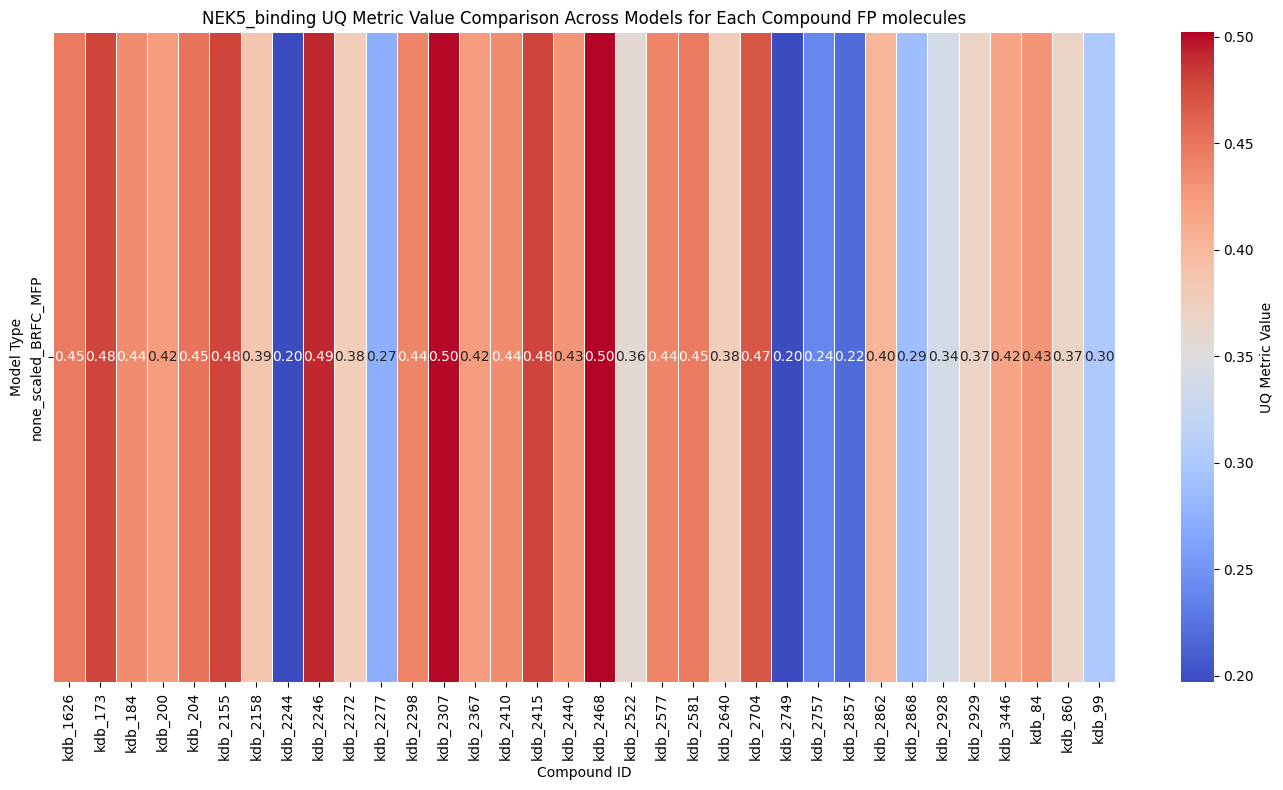

(1, 10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

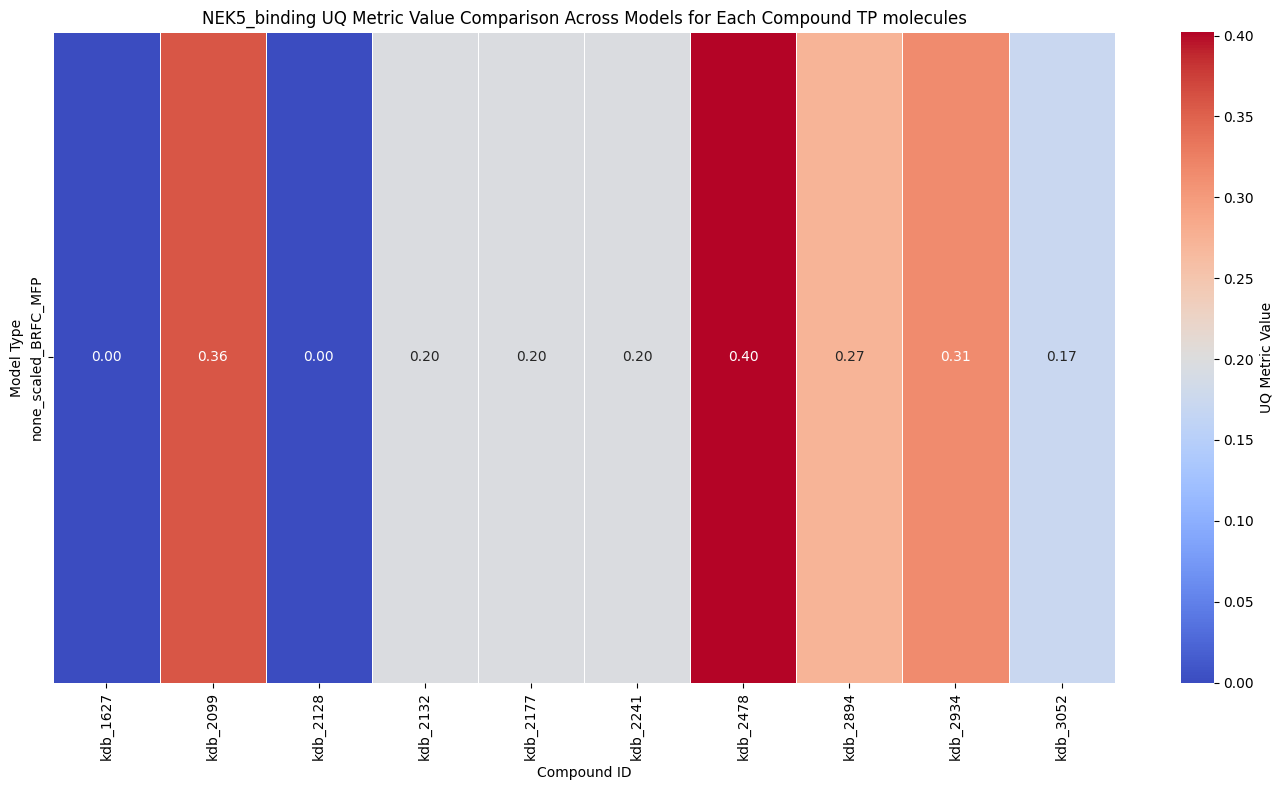

(1, 10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

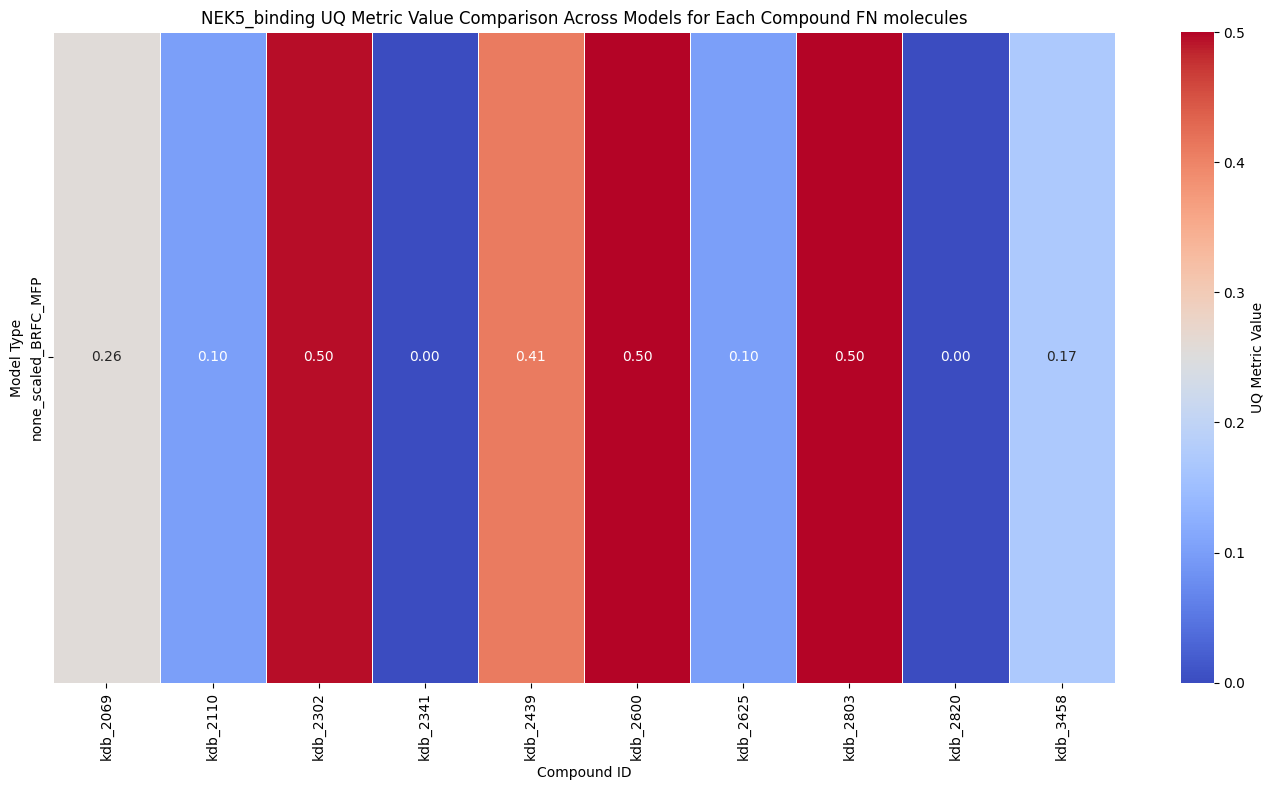

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC


<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC
NEK9_binding
(1, 229)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

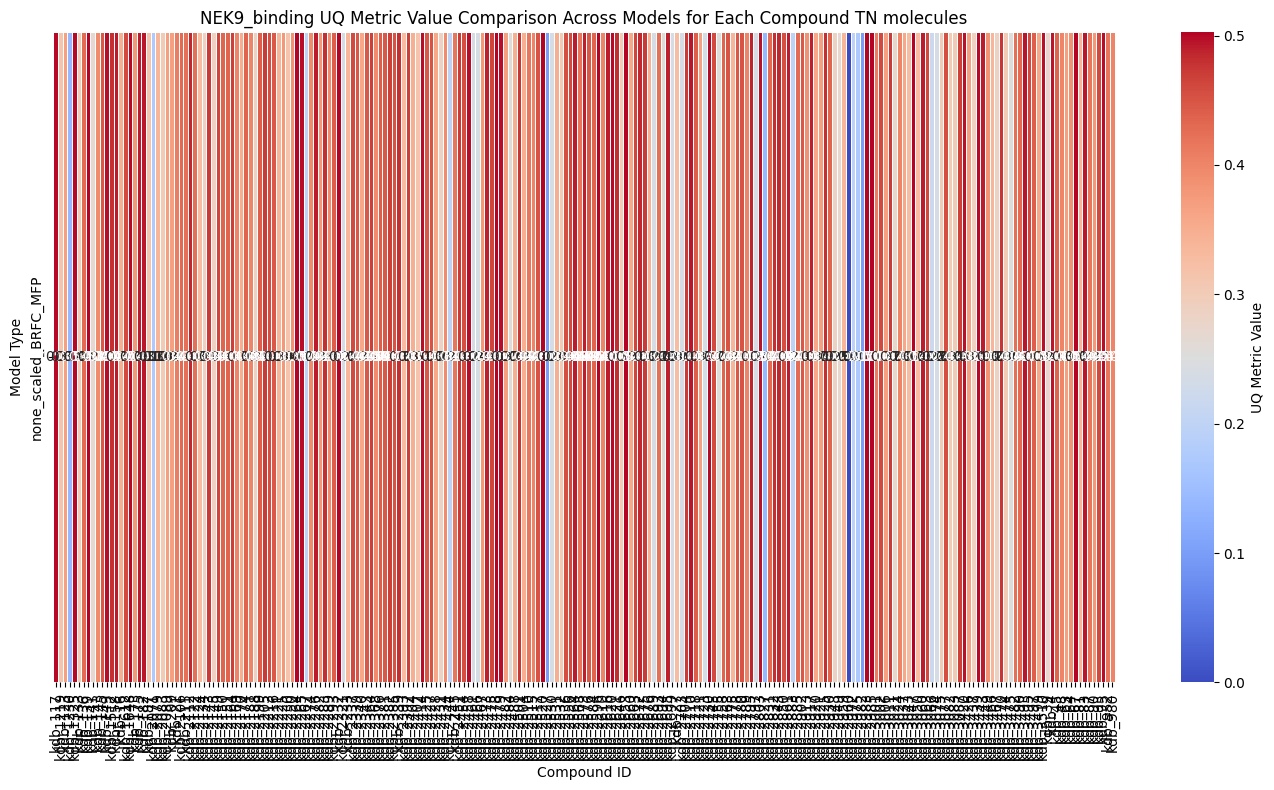

(1, 41)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

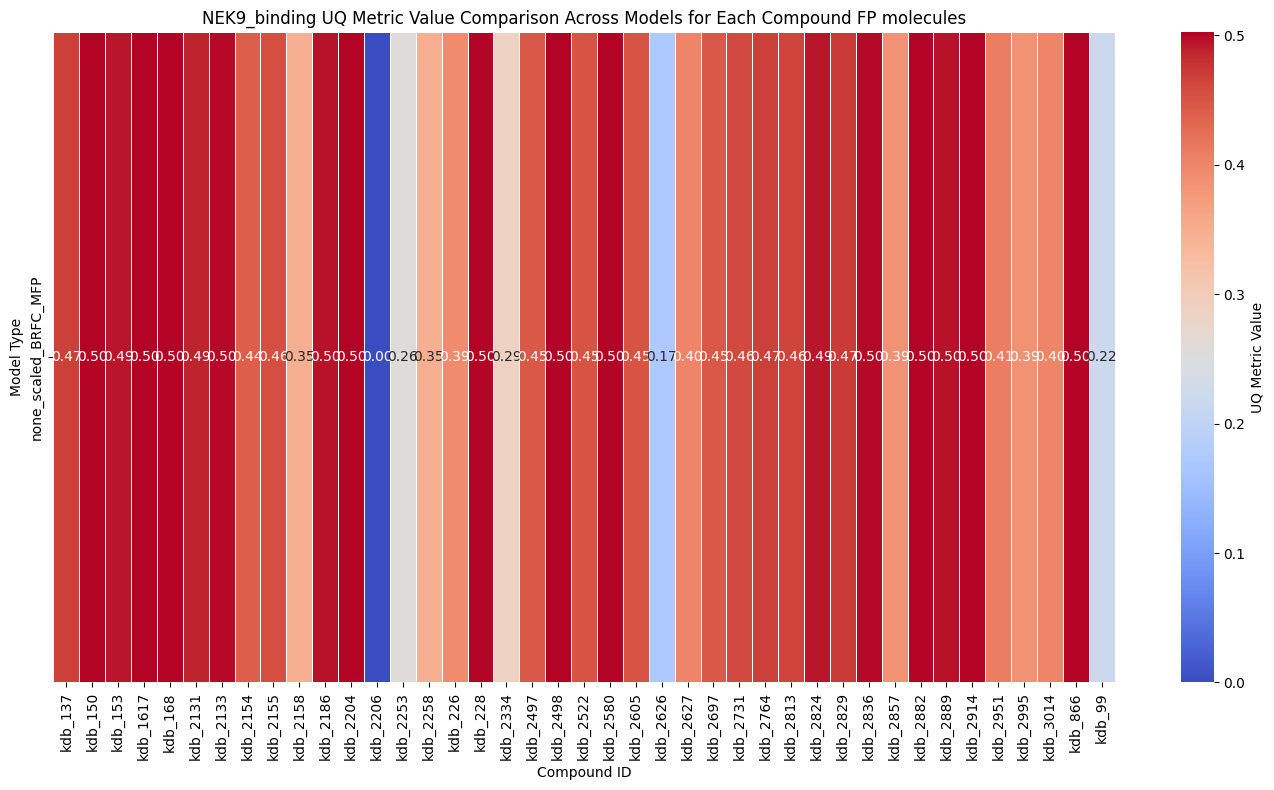

(1, 4)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

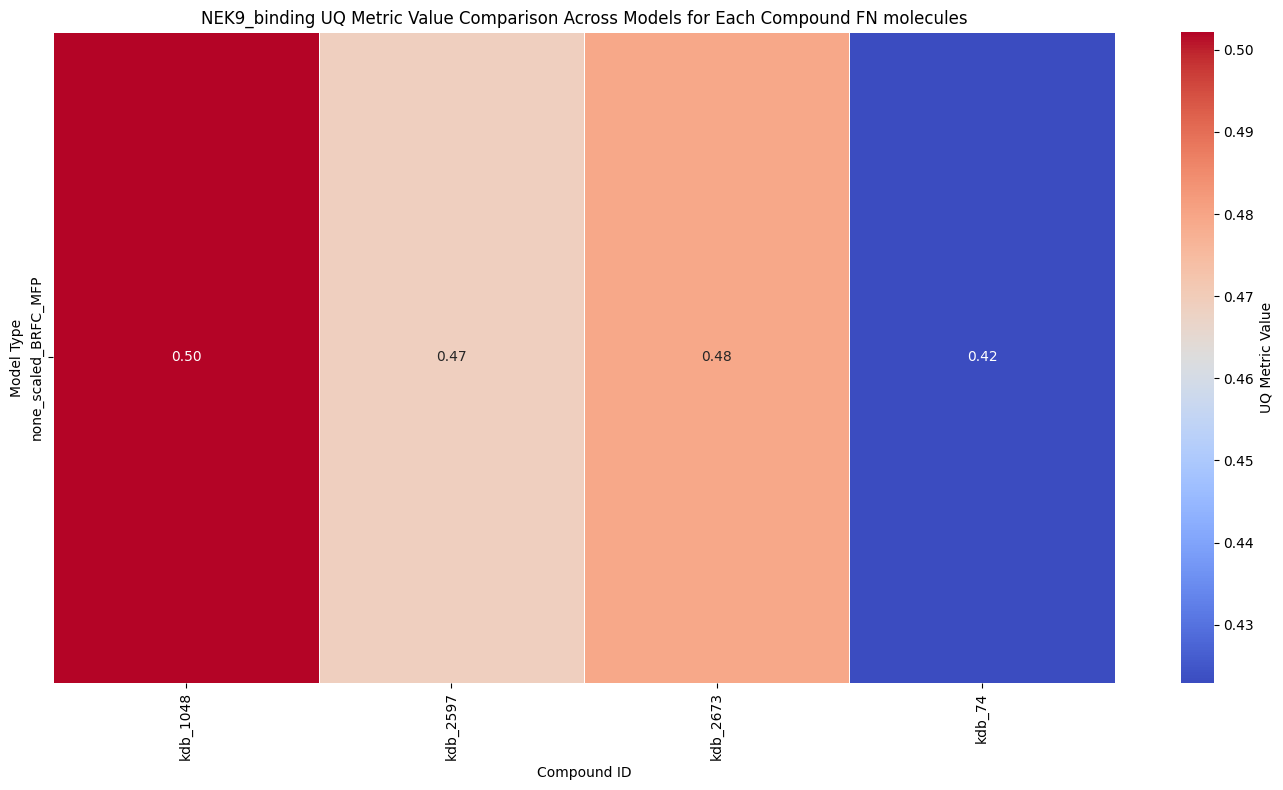

(1, 9)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

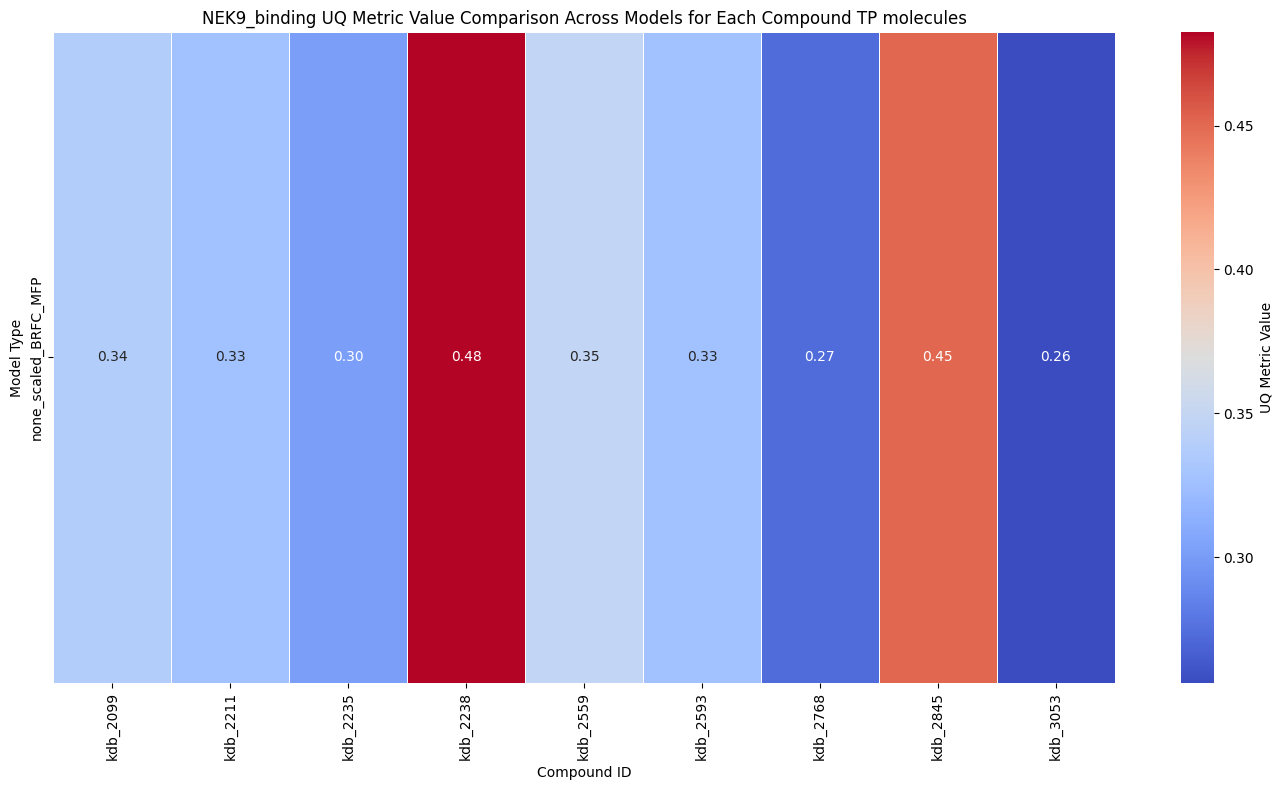

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC


<IPython.core.display.Javascript object>

UNDER_GP_matern


<IPython.core.display.Javascript object>

none_scaled_BRFC
NEK9_inhibition
(1, 67)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

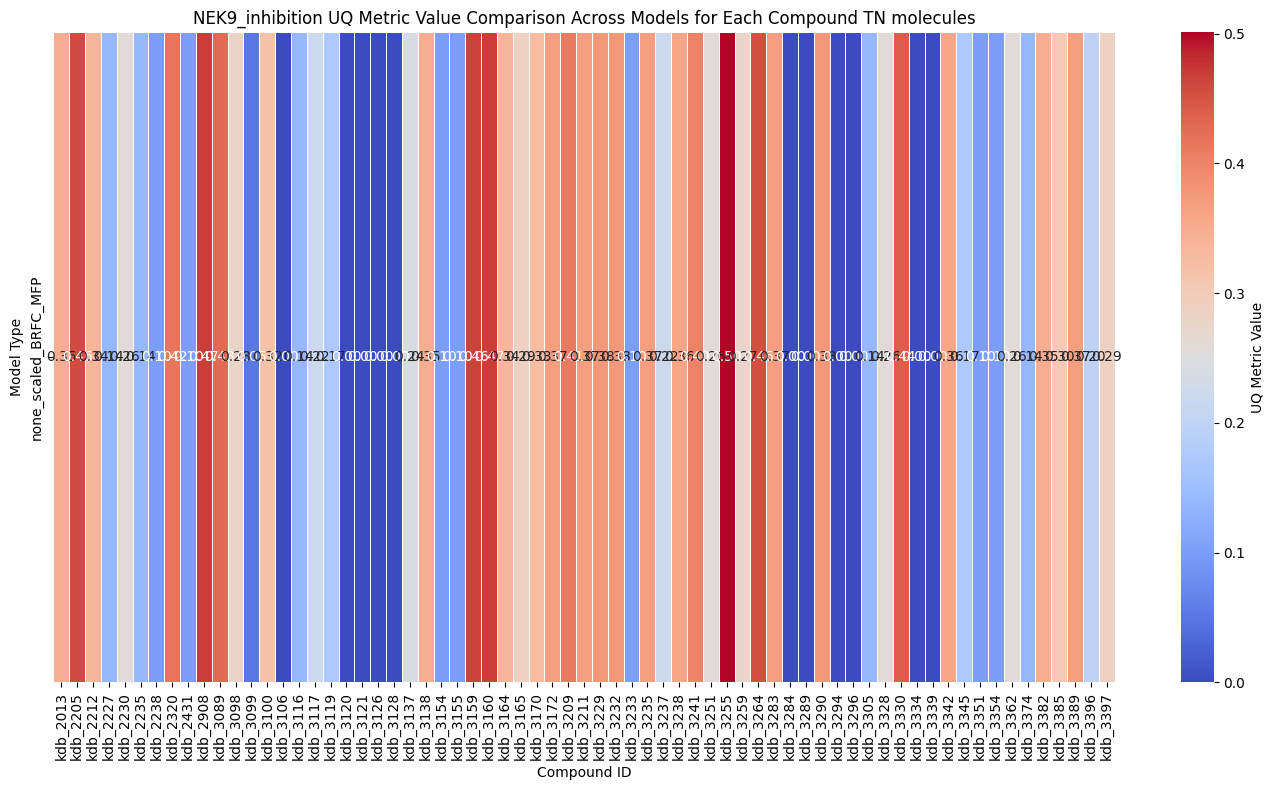

(1, 4)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

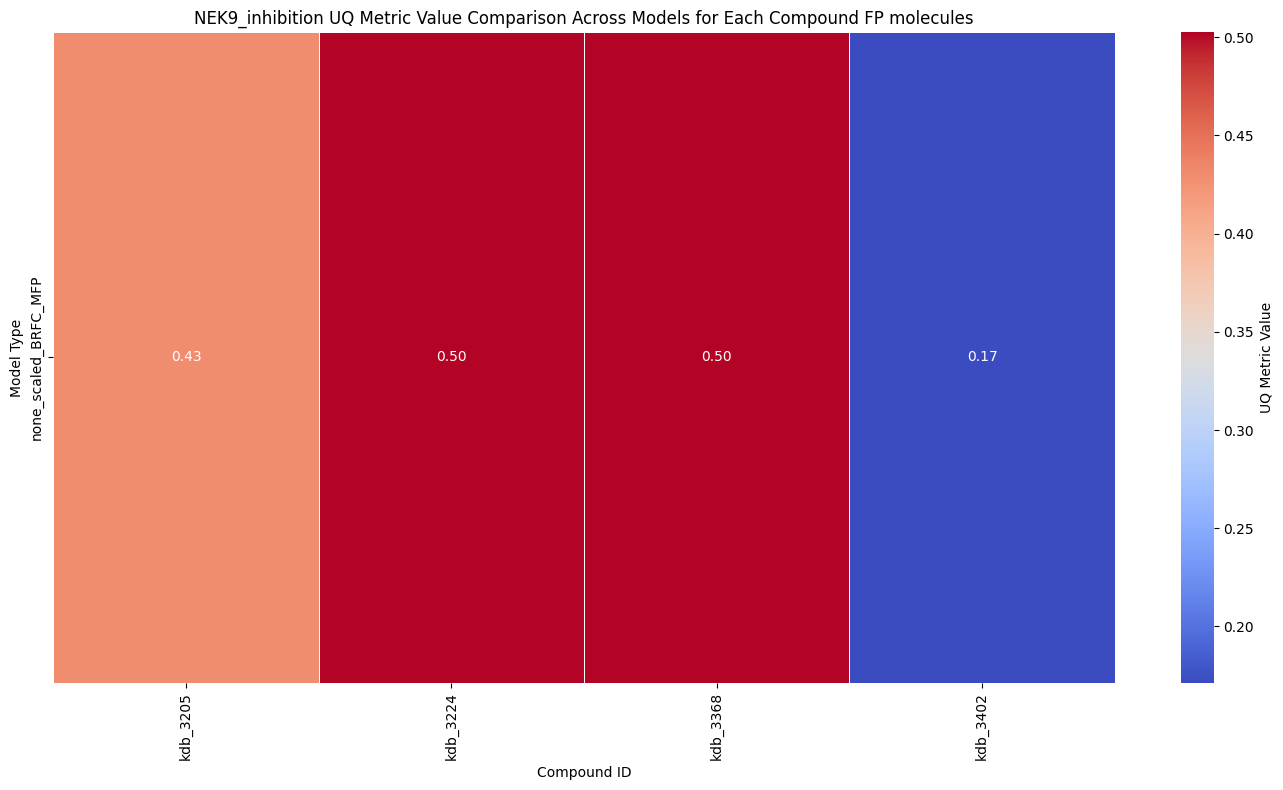

(1, 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

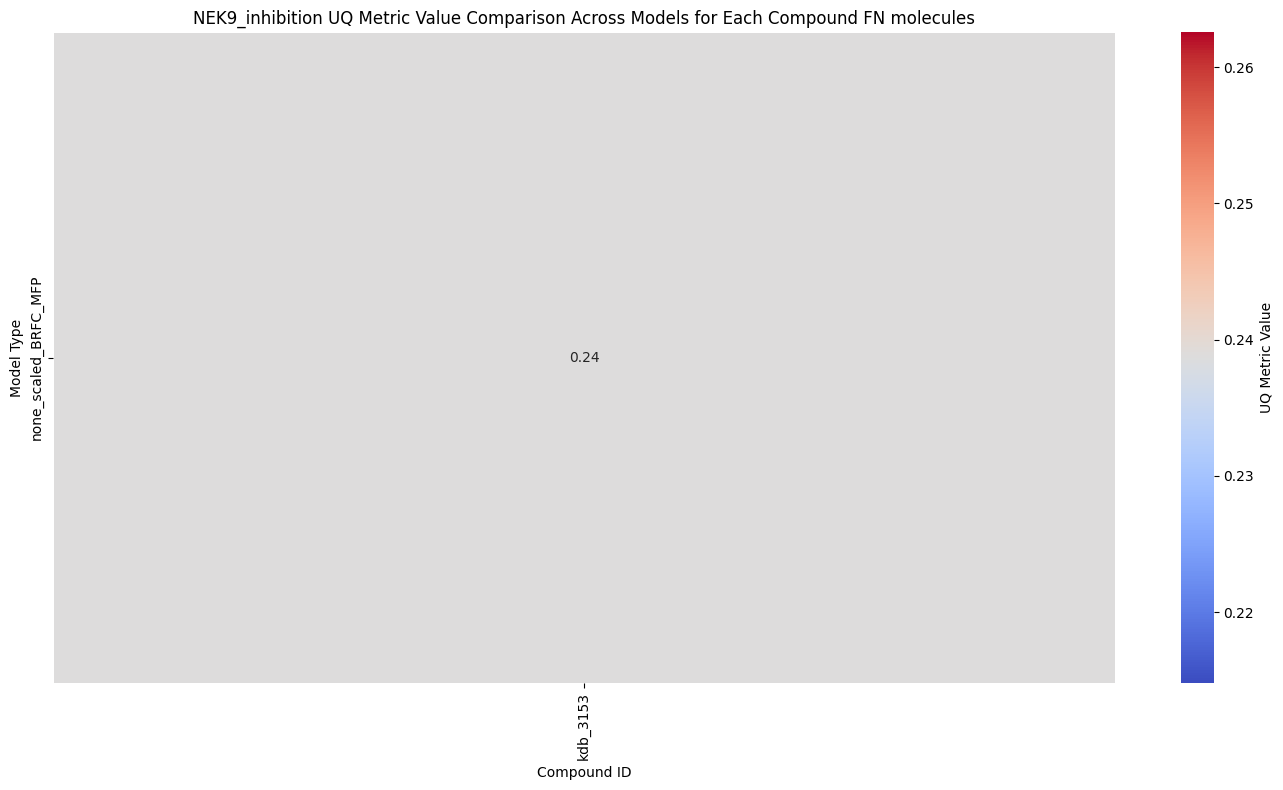

(1, 8)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

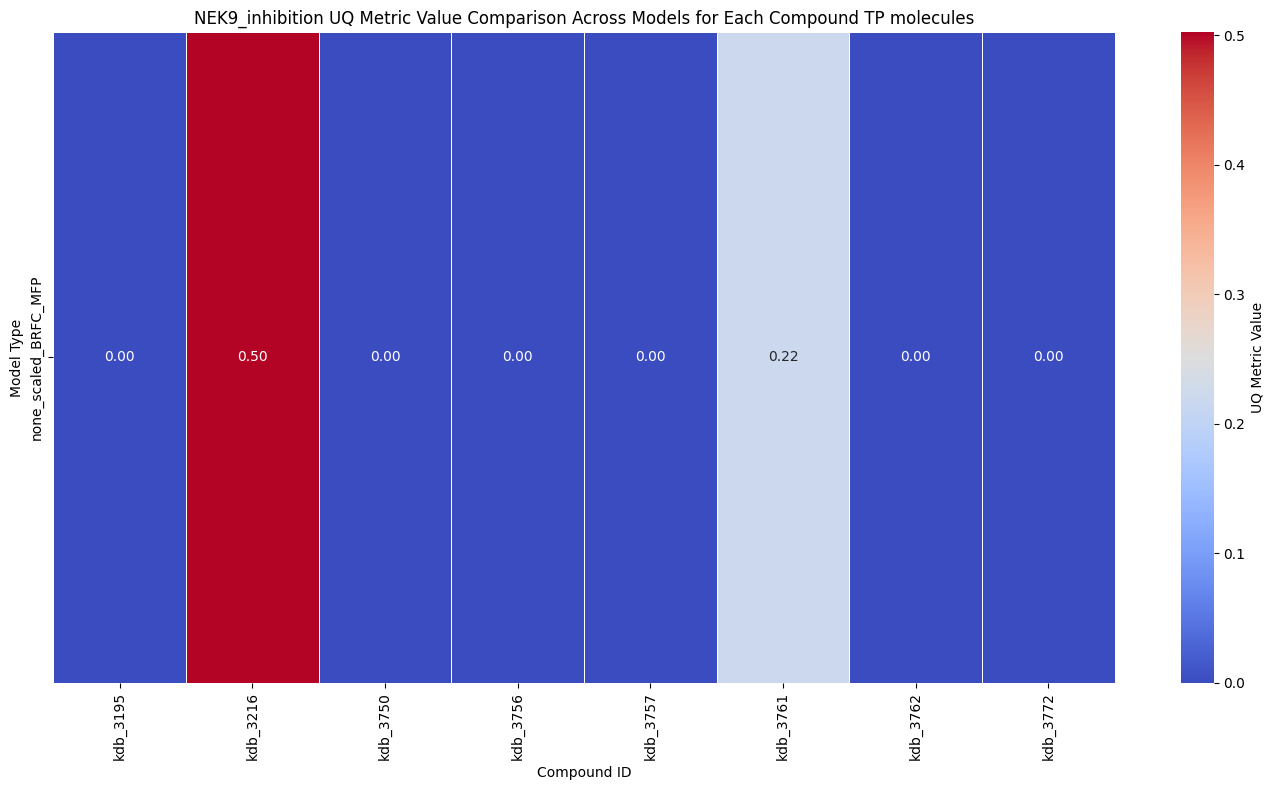

In [70]:
prod_models = ['UNDER_GP_matern', 'none_scaled_BRFC']
for nek in neks:
    all_model_test_cmpds=[] 
    nek_df = pd.read_csv(f'{cmpd_df_path}{nek}_all_models.csv')
    for samp in ['none_scaled', 'UNDER']: 
        for m in prod_models:
            df=pd.read_csv(f'{cmpd_df_path}{nek}_MFP_{m}_cmpd_class.csv')
            print(m)
            cmpd_set = set(df['compound_id'].values)
            all_model_test_cmpds.append(cmpd_set)
    print(nek)
    intersection_set = set.intersection(*all_model_test_cmpds)
    comparison_df = nek_df[nek_df['compound_id'].isin(intersection_set)]

    comparison_df = comparison_df[comparison_df['model_version'].isin(prod_models)]
    comparison_df=comparison_df[comparison_df['feat_type']=='MFP']
    # comparison_df['model_version']=comparison_df['model_version'].str.replace('none_scaled','Orig')
    comparison_df['model name']=comparison_df['model_version'].astype(str)+ '_'+comparison_df['feat_type']

    melted_df = comparison_df.melt(
    id_vars=['compound_id', 'feat_type', 'NEK', 'strategy', 'modeling_type', 'model_version', 'prediction_type'],  
    value_vars=['UQ_metric_value'], var_name='metric',  value_name='UQ_metric')
    common_cmpds = list(intersection_set)
    for pred_type in melted_df['prediction_type'].unique(): 
        prediction_type_df = comparison_df[comparison_df['prediction_type']==pred_type] 
        wide_df = prediction_type_df.pivot_table(index='model name',columns='compound_id', 
                                            values='UQ_metric_value')  
        
        print(wide_df.shape)
        # display(melted_df)
        plt.figure(figsize=(14, 8))
        wide_df =wide_df.dropna(axis=1) 
        if wide_df.empty or wide_df.isna().all().all():
            print(f'{nek}: no {pred_type}')
            continue
        else: 
            sns.heatmap(wide_df, cmap='coolwarm', annot=True, fmt='.2f', 
                cbar_kws={'label': 'UQ Metric Value'}, 
                linewidths=0.5,xticklabels=True,yticklabels=True)
            
            plt.title(f'{nek} UQ Metric Value Comparison Across Models for Each Compound {pred_type} molecules')
            plt.xlabel('Compound ID')
            plt.ylabel('Model Type')
            plt.xticks(rotation=90)  
            plt.tight_layout()
            plt.show()
        

In [ ]:
for nek in neks:
    nek_df = final_df[final_df['NEK'] == nek]
    nek_raw = nek_df[(nek_df['strategy'] == 'none_scaled') & (nek_df['model'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
    rf_other = nek_df[(nek_df['model'] == 'RF') & (nek_df['strategy'].isin(['UNDER', 'SMOTE']))] 
    gp=nek_df[nek_df['model']=='GP_matern'] 
    
    nek_df2 = pd.concat([nek_raw, rf_other, gp])
    nek_df2['model'] = nek_df2['model'].astype(str)+'_'+nek_df2['strategy']+ '_'+nek_df2['feat_type'] 
    all_model_types=nek_df2['model'].unique()
    fn_dict = {model: set(nek_df2[nek_df2['model']==model]['FN'].sum())for model in all_model_types}
    all_fn_cmpds = sorted(set.union(*fn_dict.values()))
    fn_matrix = pd.DataFrame(0, index=all_fn_cmpds, columns=fn_dict.keys())
    # display(fn_matrix)

    for model, cmpds in fn_dict.items():
        fn_matrix.loc[list(cmpds), (model)]=1
        # 1 = classified FN 

    plt.figure(figsize=(12,8))
    ax = sns.heatmap(fn_matrix, cmap='coolwarm', linewidths=0.5,cbar=False)
    fn_patch = mpatches.Patch(color=sns.color_palette('coolwarm', as_cmap=True)(1.0),label='FN (1)')
    not_fn_patch = mpatches.Patch(color=sns.color_palette("coolwarm", as_cmap=True)(0.0), label='Not FN (0)')
    
    plt.legend(handles=[fn_patch,not_fn_patch], loc='upper right', fontsize=12, title="Classification")

    plt.xlabel('Model',fontsize=15)
    plt.ylabel('Compound ID',fontsize=15)
    plt.title(f'{nek} compounds classified as FN for each model',fontsize=15)
    plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

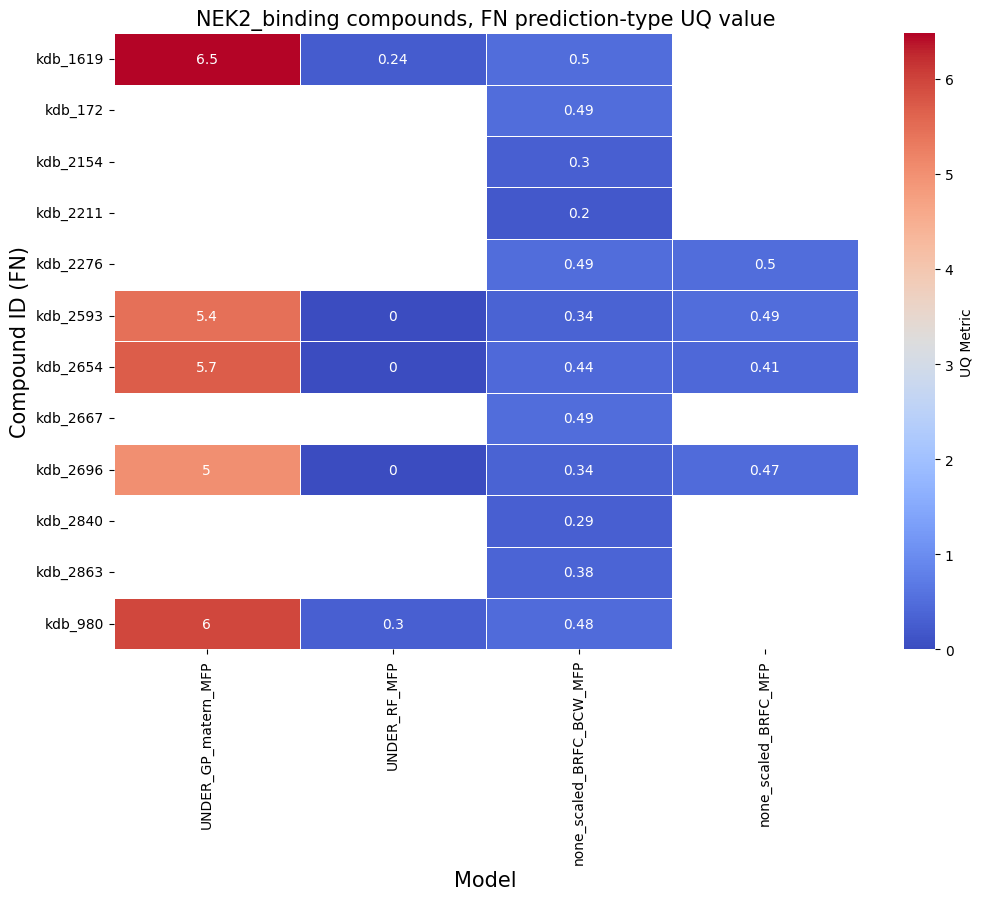

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

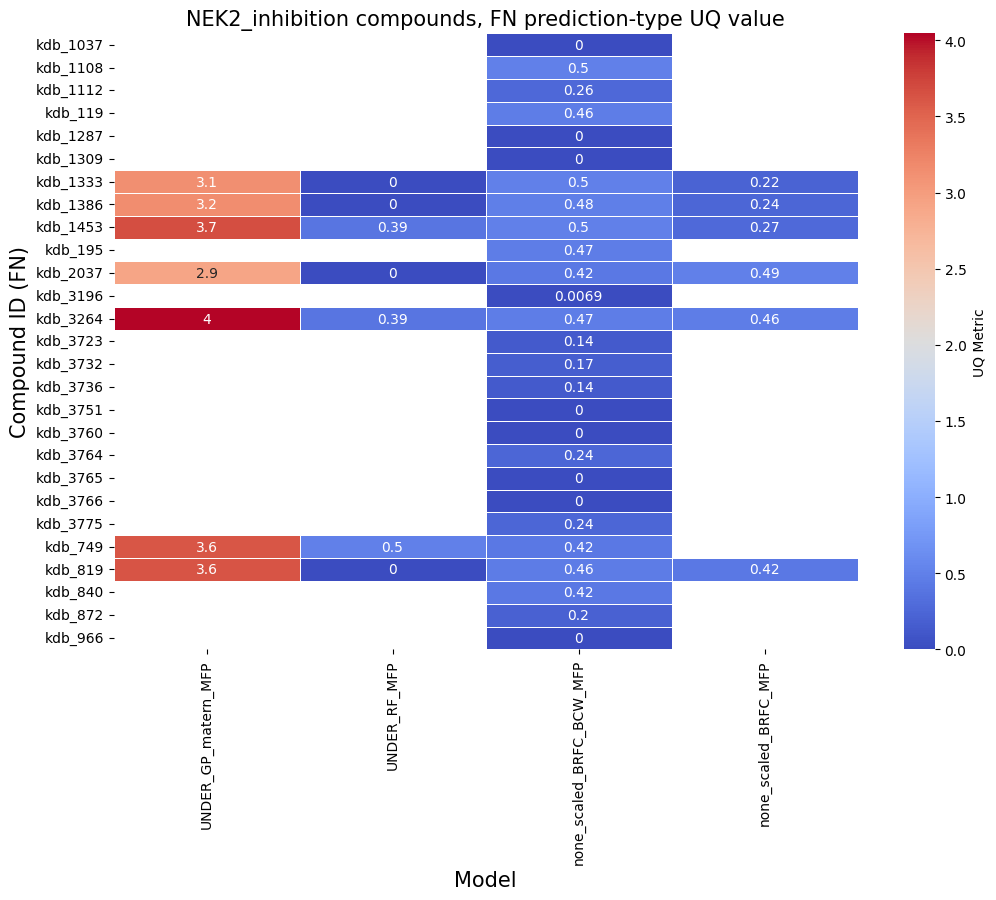

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

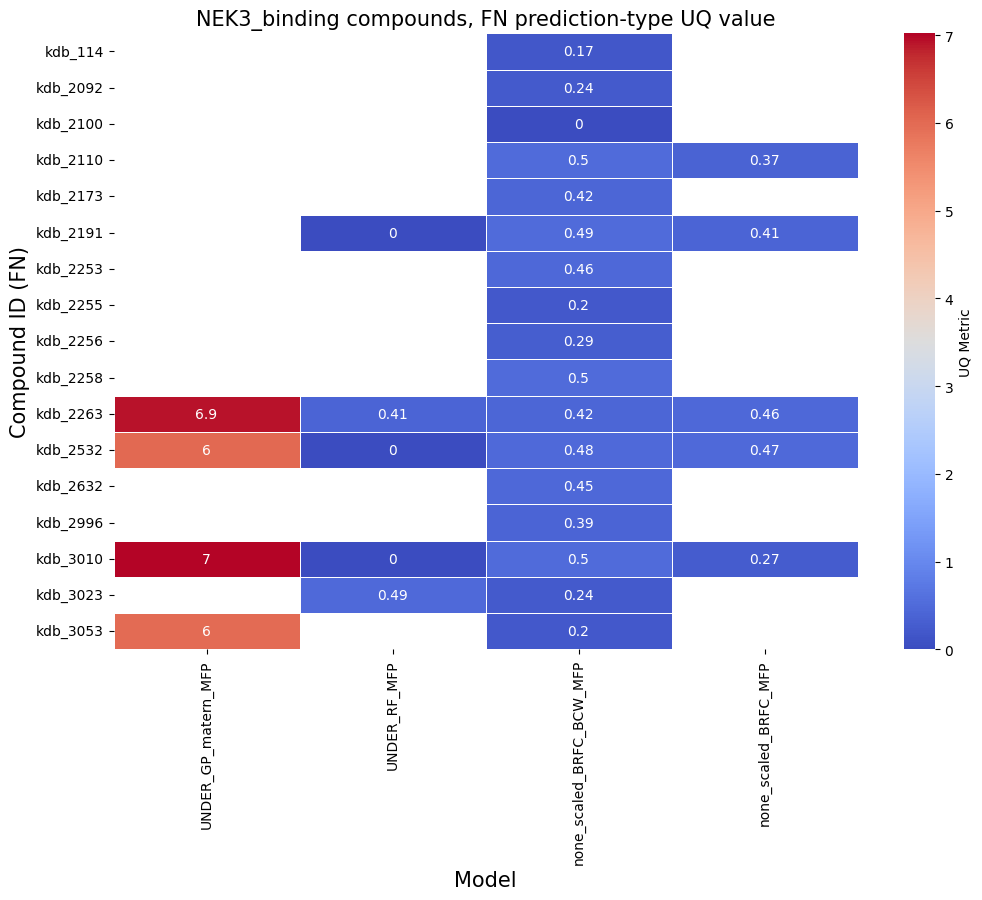

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

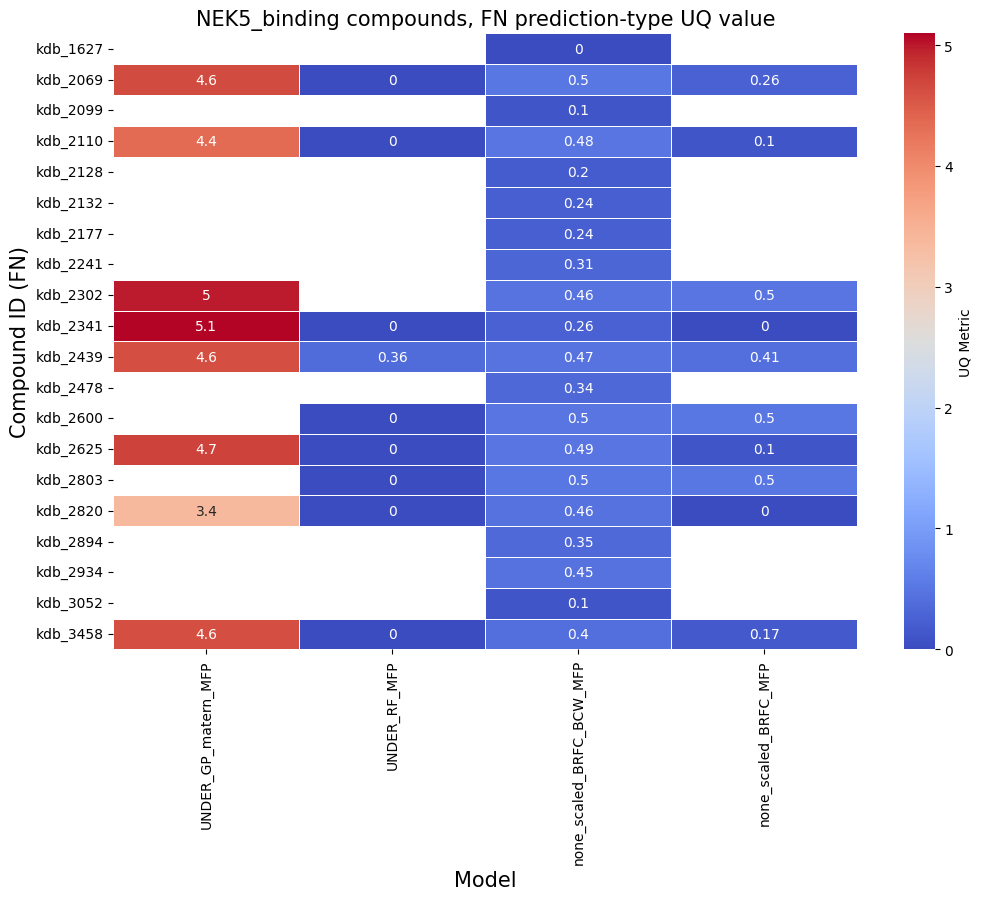

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

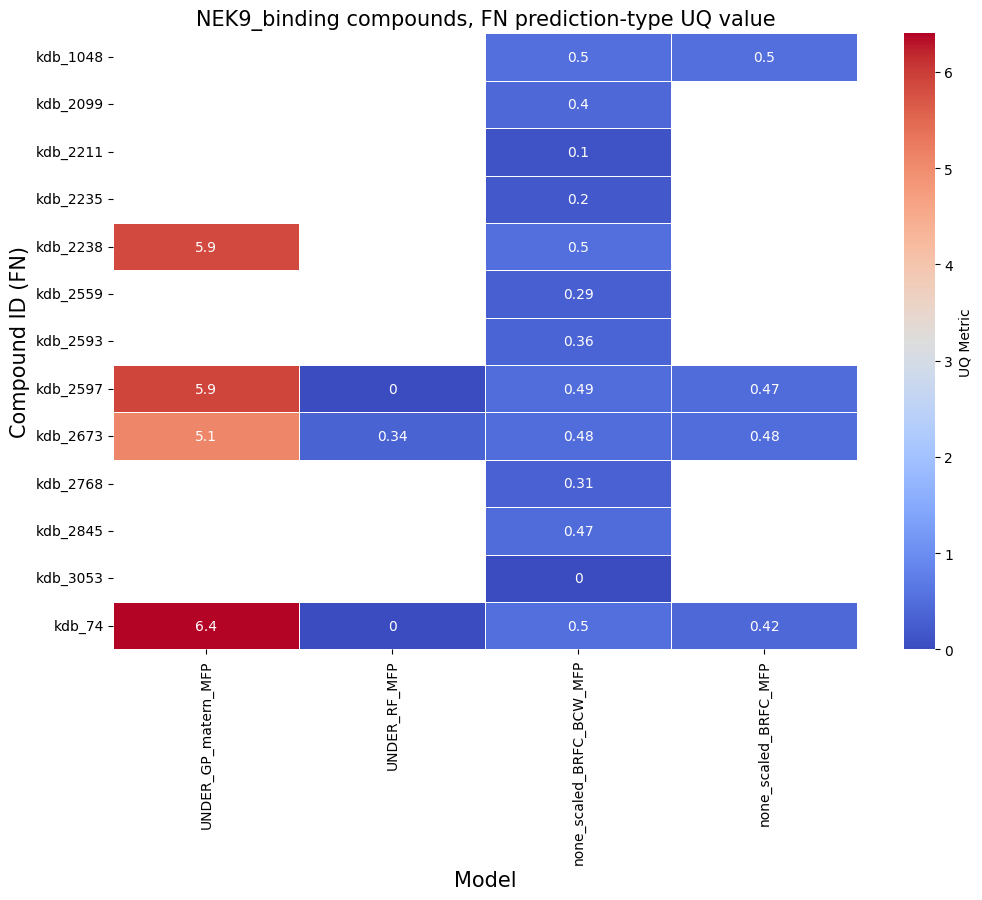

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

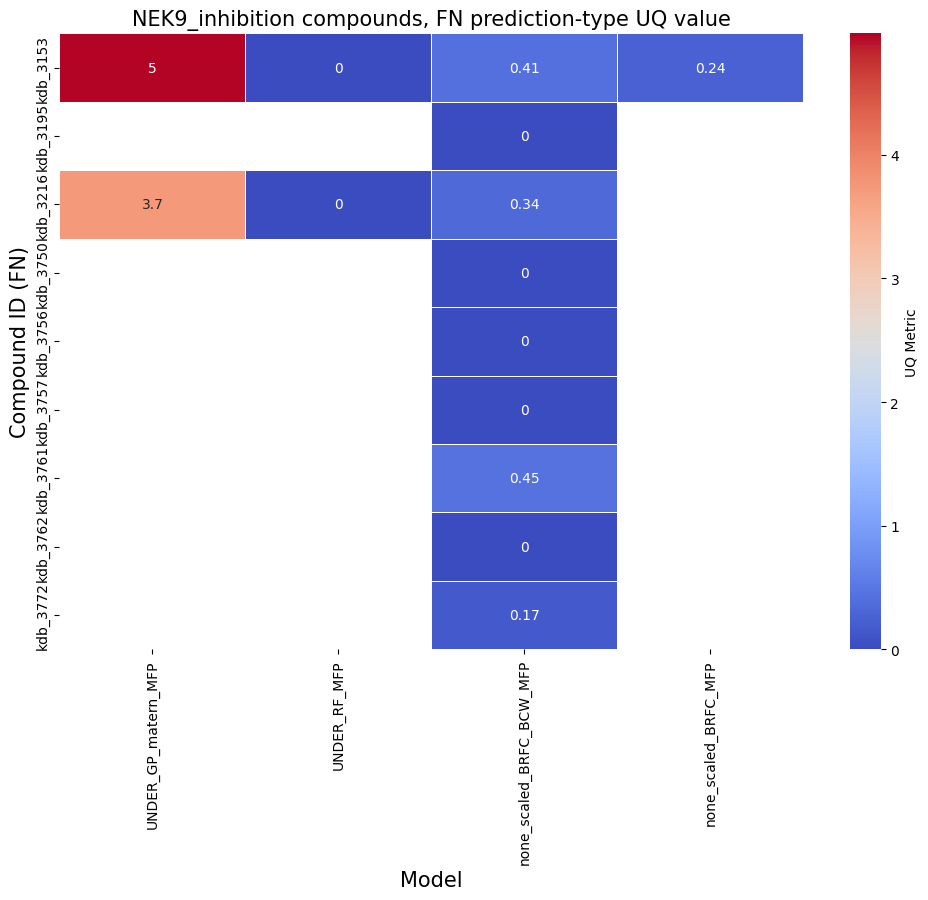

In [116]:
#### final_df = pd.read_csv(f'{cmpd_df_path}list_of_mols_pred_types.csv')
import matplotlib.patches as mpatches
selected_models = ['BRFC', 'BRFC_BCW', 'RF', 'GP_matern']
selected_model_map = {'none_scaled': ['BRFC', 'BRFC_BCW'], 'UNDER': ['RF', 'GP_matern']}
for nek in neks:
    nek_models = []
    for samp, models in selected_model_map.items(): 
        for mod in models: 
            df = pd.read_csv(f'{cmpd_df_path}{nek}_MFP_{samp}_{mod}_cmpd_class.csv')
            df['model_version']=df['model_version'].astype(str)+'_MFP'
            fn_df = df[df['prediction_type'] == 'FN']
            # nek_models.append(df)
            nek_models.append(fn_df)
            
            # display(df)
    
    full_nek_df = pd.concat(nek_models, ignore_index=True)
    uq_matrix = full_nek_df.pivot_table(index='compound_id', columns='model_version', values='UQ_metric_value', aggfunc='mean')

    uq_matrix = uq_matrix.dropna(how='all')

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(uq_matrix, cmap='coolwarm', linewidths=0.5, annot=True,cbar_kws={'label': 'UQ Metric'})
    
    plt.xlabel('Model', fontsize=15)
    plt.ylabel('Compound ID (FN)', fontsize=15)
    plt.title(f'{nek} compounds, FN prediction-type UQ value', fontsize=15)
    plt.xticks(rotation=90)
    
    # plt.savefig(f"/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/compound_TNFPFNTP/model_FN/{nek}_FN_under_models_UQ.png", bbox_inches='tight')
    plt.show()


In [77]:
uq_df['model_version'] = uq_df['strategy'].astype(str)+'_'+uq_df['modeling_type']+'_'+uq_df['feat_type']

In [80]:
uq_df['model_version'].value_counts()

model_version
SMOTE_RF_MFP                 4749
UNDER_RF_MOE                 4749
UNDER_RF_MFP                 4749
SMOTE_RF_MOE                 4749
none_scaled_RF_MOE           4749
none_scaled_RF_MFP           4749
none_scaled_GP_matern_MOE    1583
none_scaled_BRFC_BCW_MFP     1583
SMOTE_GP_matern_MFP          1583
UNDER_BRFC_BCW_MFP           1583
UNDER_GP_matern_MFP          1583
none_scaled_GP_matern_MFP    1583
SMOTE_BRFC_BCW_MOE           1583
SMOTE_GP_matern_MOE          1583
UNDER_BRFC_BCW_MOE           1583
UNDER_GP_matern_MOE          1583
none_scaled_BRFC_BCW_MOE     1583
SMOTE_BRFC_BCW_MFP           1583
Name: count, dtype: int64

In [145]:
model_shapes = {'UNDER_GP_matern': 'o', 'none_scaled_BRFC': 's','none_scaled_BRFC_BCW':'s'}
pred_types = {'TN': 'gray','FN': 'red', 'TP': 'green','FP': 'orange'}

NEK2_binding UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK2_binding none_scaled_BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

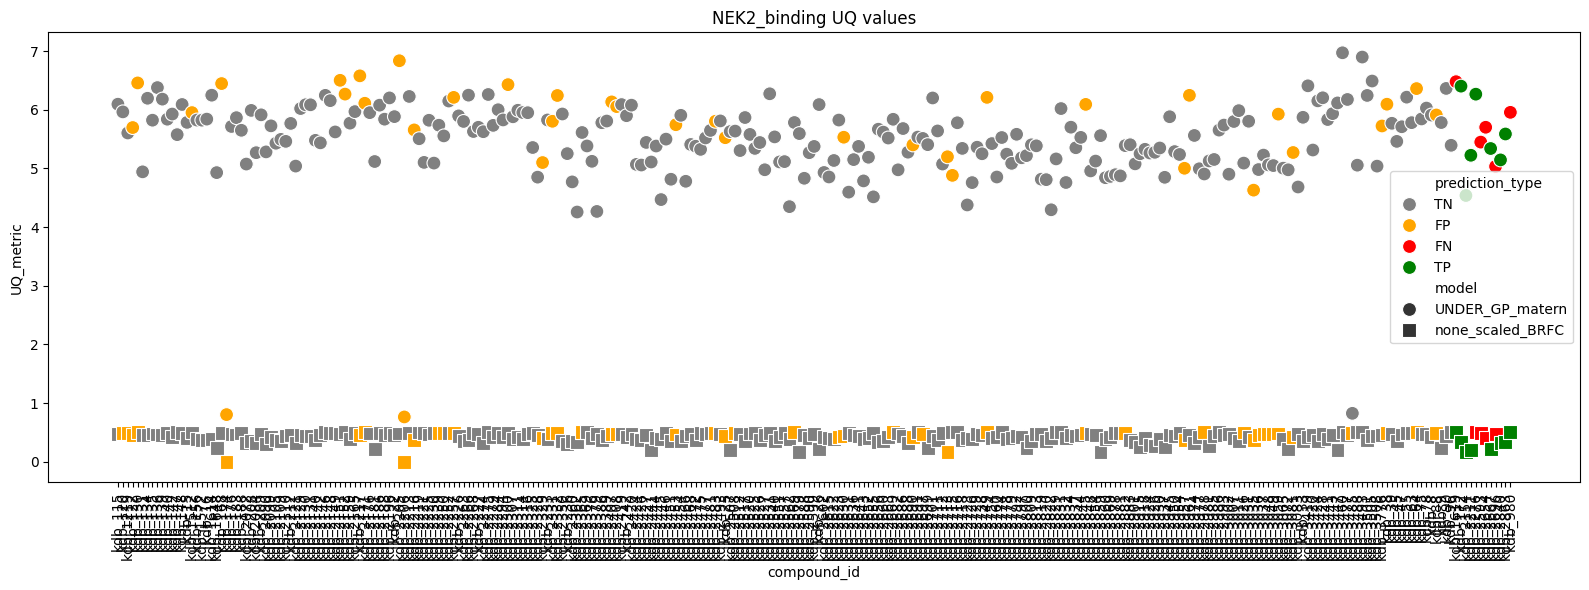

NEK2_inhibition UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK2_inhibition none_scaled_BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

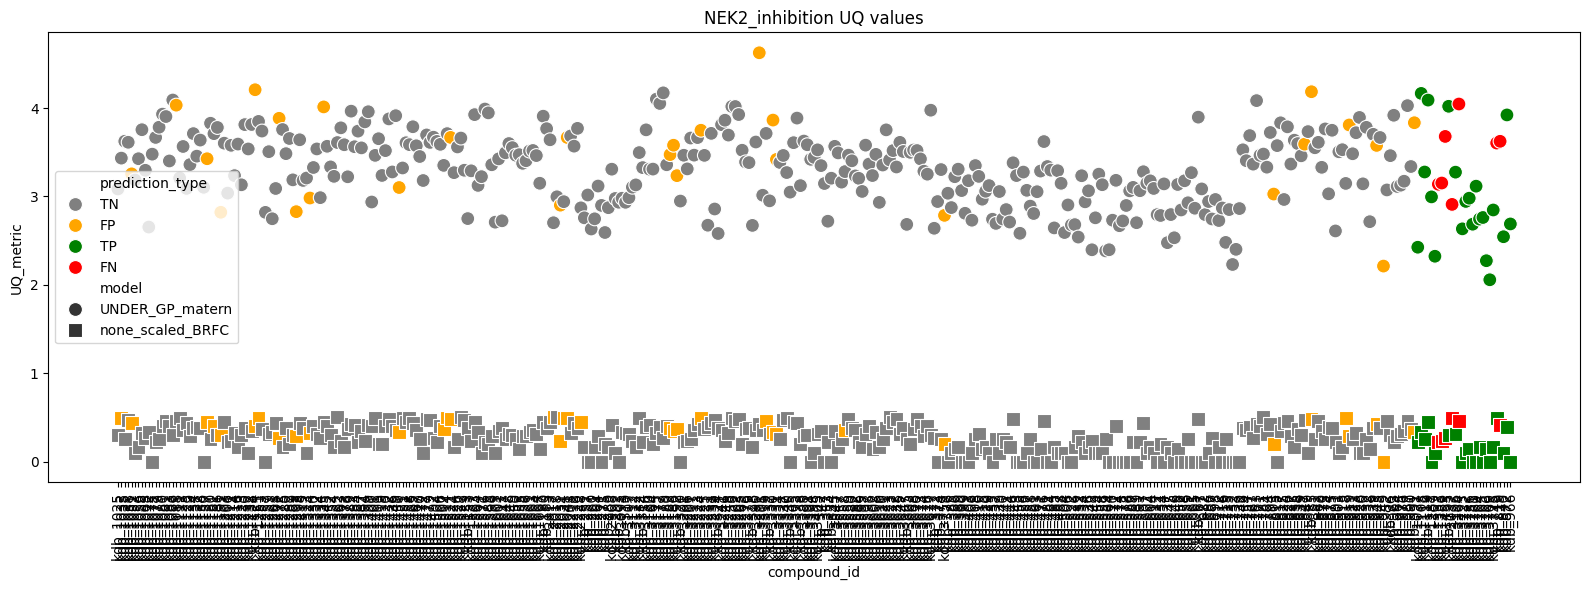

NEK3_binding UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK3_binding none_scaled_BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

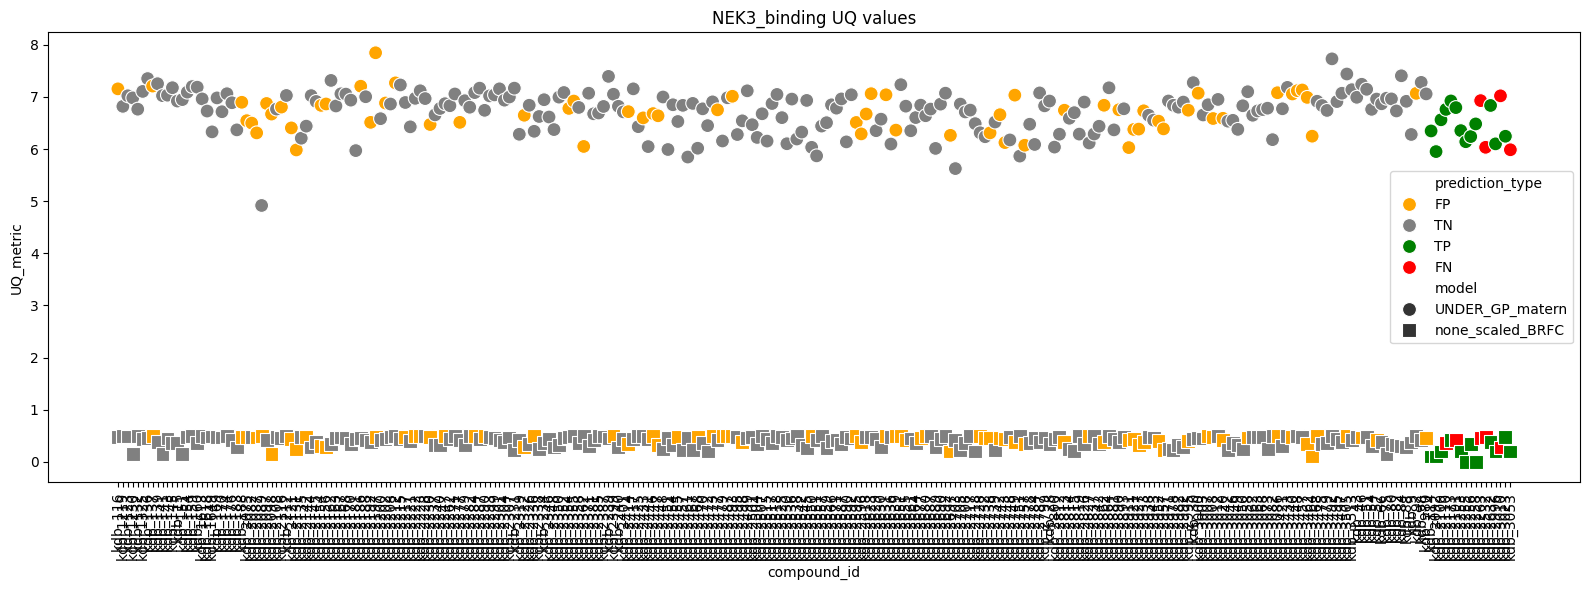

NEK5_binding UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK5_binding none_scaled_BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

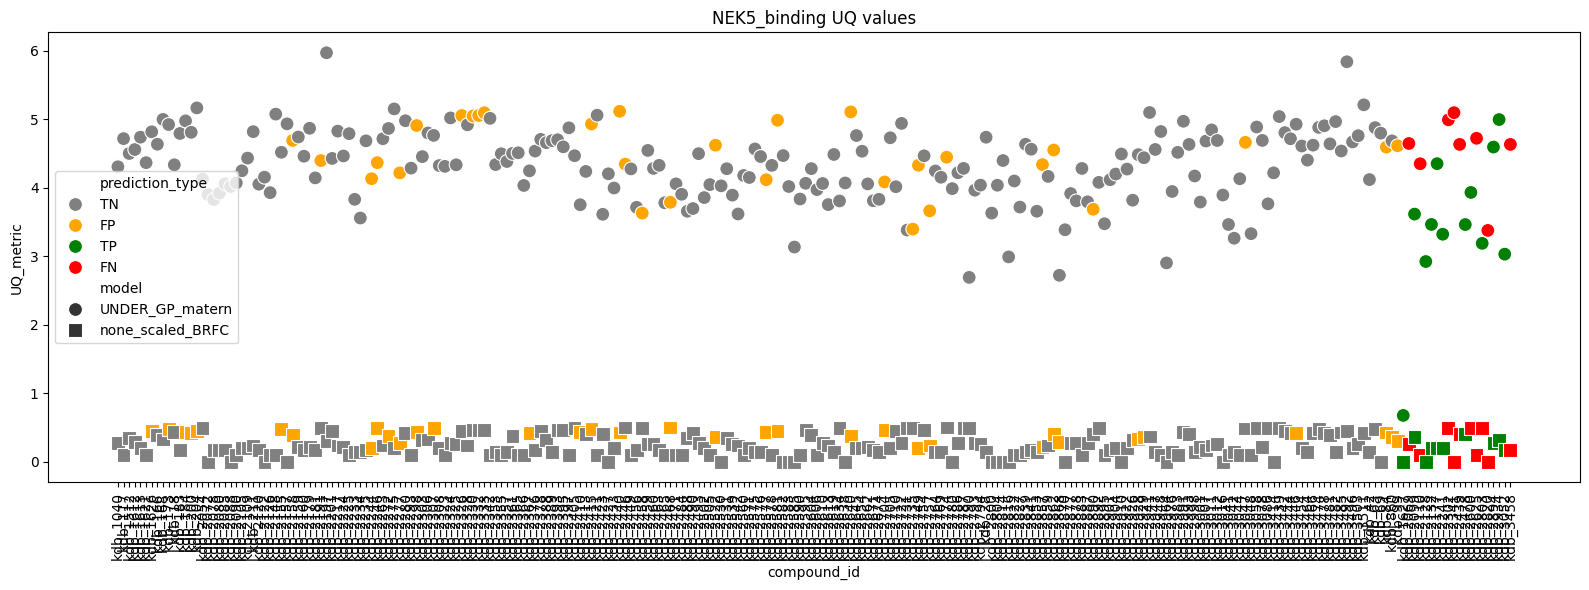

NEK9_binding UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK9_binding none_scaled_BRFC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

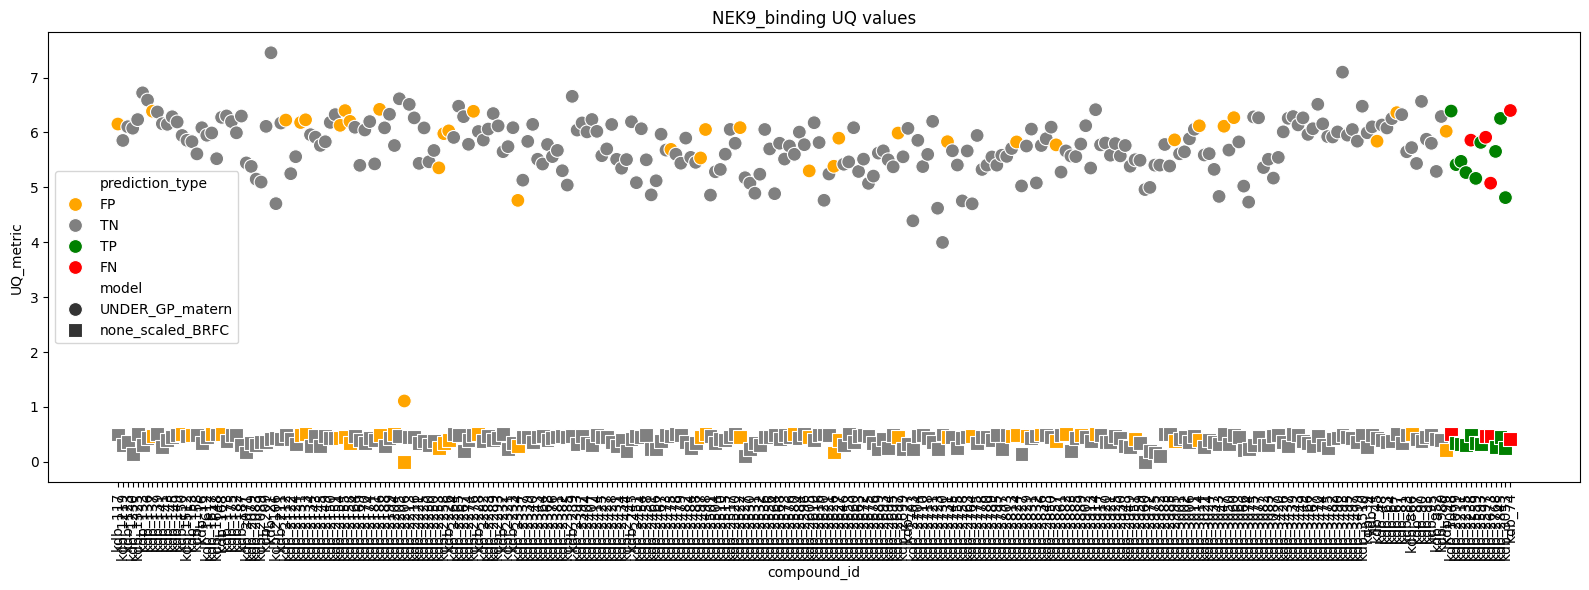

NEK9_inhibition UNDER_GP_matern


<IPython.core.display.Javascript object>

NEK9_inhibition none_scaled_BRFC_BCW


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

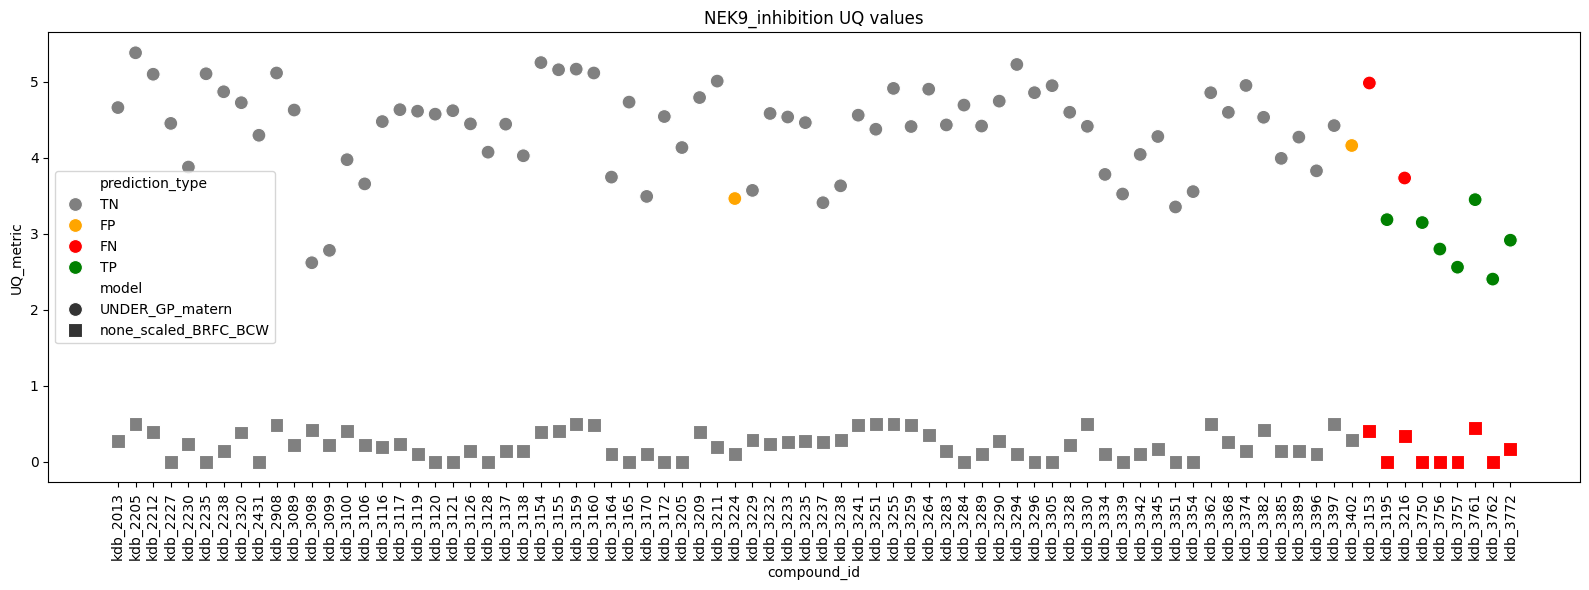

In [148]:
fig_path='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/UQ/compare_across/figs/UQ_point_comparison/'
for nek in neks:
    df_list = []
    model_list=[]
    for model in ['UNDER_GP_matern','none_scaled_BRFC'] : 
        
        if (nek=='NEK9_inhibition' and model=='none_scaled_BRFC'): 
            model ='none_scaled_BRFC_BCW'
        print(nek, model)
        model_list.append(model)
        df = pd.read_csv(f'{cmpd_df_path}{nek}_MFP_{model}_cmpd_class.csv')
   
        df_list.append(df) 
    
    merged = df_list[0].merge(df_list[1], on=['compound_id'], suffixes=('_GP', '_RF'))
    # display(nek_df)
    # display(merged)
    plot_df = pd.DataFrame({'compound_id':pd.concat([merged['compound_id'],merged['compound_id']]),
    'model': [model_list[0]] * len(merged)+ [model_list[1]]*len(merged),
    'UQ_metric': pd.concat([merged['UQ_metric_value_GP'], merged['UQ_metric_value_RF']]),
    'prediction_type': pd.concat([merged['prediction_type_GP'], merged['prediction_type_RF']])})
    # display(plot_df)
    plt.figure(figsize=(16, 6))
    sns.scatterplot(data=plot_df,x='compound_id',y='UQ_metric',hue='prediction_type',palette=pred_types,
        style='model',markers=model_shapes, s=100)
    plt.xticks(rotation=90)
    plt.title(f'{nek} UQ values')
    plt.tight_layout()
    plt.savefig(f"{fig_path}{nek}.png", bbox_inches='tight')

    plt.show()
    
        